In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="E:/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
#print the dataframe
dataframe

Max Lat per section  Min Lat per section  Max Lon per section  \
0                   -87.5                -90.0                180.0   
1                   -82.5                -87.5               -135.0   
2                   -82.5                -87.5                -90.0   
3                   -82.5                -87.5                -45.0   
4                   -82.5                -87.5                  0.0   
...                   ...                  ...                  ...   
1785                 87.5                 82.5                 45.0   
1786                 87.5                 82.5                 90.0   
1787                 87.5                 82.5                135.0   
1788                 87.5                 82.5                180.0   
1789                 90.0                 87.5                180.0   

      Min Lon per section  No. of spectra per section  \
0                  -180.0                        7002   
1                  -180.0                        1599   
2                  -135.0                        1940   
3                   -90.0                        1818   
4                   -45.0                        1855   
...                   ...                         ...   
1785                  0.0                        1748   
1786                 45.0                        2035   
1787                 90.0                        1903   
1788                135.0                        1902   
1789               -180.0                        7294   

      Total active time per section  \
0                     215153.707937   
1                      49113.391313   
2                      59600.854365   
3                      55864.552890   
4                      57007.157885   
...                             ...   
1785                   53653.126808   
1786                   62483.348769   
1787                   58474.988092   
1788                   58399.244640   
1789                  223993.416783   

                                         Summed Spectra  \
0     [270112.3731329723, 44221.71628033137, 45327.9...   
1     [101728.76450092324, 11353.802617173642, 10565...   
2     [69004.10988058499, 13041.311258502305, 12455....   
3     [51455.21453525051, 11348.088811988011, 11487....   
4     [51138.233213284286, 10203.879826977849, 12005...   
...                                                 ...   
1785  [172204.68795185376, 12837.986652251333, 11392...   
1786  [69631.4865040512, 13027.290796013549, 12597.1...   
1787  [58870.11519813659, 11691.651373354718, 11794....   
1788  [69077.49428235987, 10543.676356979646, 11999....   
1789  [342422.3644296753, 45978.50919445278, 45791.6...   

                                     Normalized Spectra  \
0     [75.32634479500912, 12.332127585726989, 12.640...   
1     [124.27824075904886, 13.87051756806718, 12.906...   
2     [69.4662289143658, 13.12864863838364, 12.53878...   
3     [55.264254565457236, 12.188146033430378, 12.33...   
4     [53.82296024948041, 10.739577490433051, 12.635...   
...                                                 ...   
1785  [192.57556626933405, 14.356650673799725, 12.73...   
1786  [66.8640409410214, 12.509531949810704, 12.0964...   
1787  [60.40543191435932, 11.996566485773727, 12.102...   
1788  [70.97094632772614, 10.832684314943478, 12.328...   
1789  [91.72297186611817, 12.316034066037092, 12.265...   

                                 Log Normalized Spectra  Aluminum  ...  \
0     [1.8769468938381042, 1.0910380092016139, 1.101...    15.151  ...   
1     [2.0943950968999223, 1.1420926667518603, 1.110...    13.394  ...   
2     [1.8417737231418783, 1.118220025472807, 1.0982...    13.634  ...   
3     [1.742444316396172, 1.085937649122431, 1.09122...    14.642  ...   
4     [1.7309675801735431, 1.030987195964759, 1.1015...    14.030  ...   
...                                                 ...       ...  ...   
1785  [2.2846011835800297, 1.1570531332525222, 1.105...    14.9

In [6]:
#get the abundance values for Uranium (U), as a numpy array
uraniumAbundances=dataframe['Uranium'].to_numpy()

In [7]:
#import the Min-Max scalar from sklearn
from sklearn.preprocessing import MinMaxScaler

In [8]:
#create a min-max scalar
minmaxScalar=MinMaxScaler()
#fit the Uranium abundances to the scalar
minmaxScalar.fit(uraniumAbundances.reshape(-1, 1))
#apply the scalar to the Uranium abundances
scaledUAbundances=minmaxScalar.transform(uraniumAbundances.reshape(-1, 1))
#reshape the scaled Uranium abundance values
scaledUAbundances=scaledUAbundances[:,0]

In [9]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)

In [10]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [11]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [12]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress

In [13]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [14]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

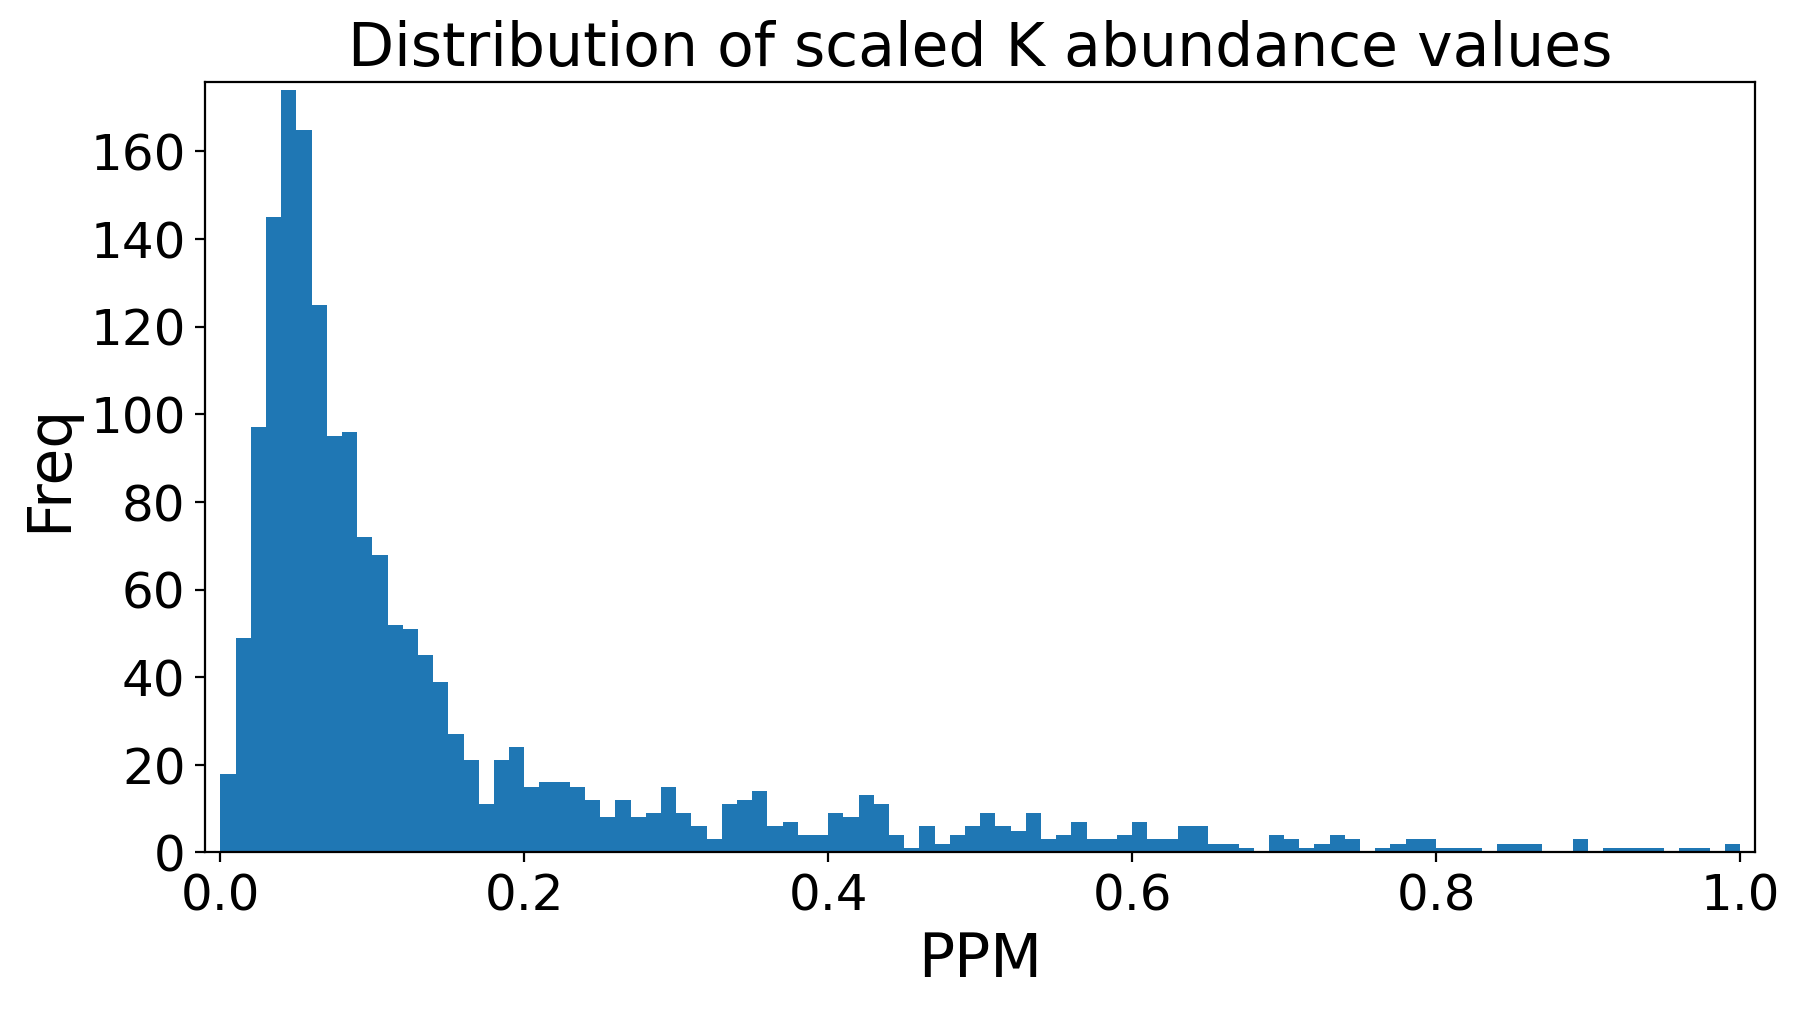

In [15]:
#create a figure 
plt.figure(figsize=(10,5),
           dpi=200)
#plot the histogram
temp=plt.hist(scaledUAbundances,
              bins=noOfBinsForHistogram)
#set the title of the figure
plt.title("Distribution of scaled U abundance values",fontsize=baseFontSize*1.2)
#set the axis labels
plt.xlabel("PPM",fontsize=baseFontSize*1.2)
plt.ylabel("Freq",fontsize=baseFontSize*1.2)
#set the ticks and their label sizes
plt.xticks(np.arange(np.amin(scaledUAbundances),
                     np.amax(scaledUAbundances)+np.ptp(scaledUAbundances)/noOfXticks,
                     np.ptp(scaledUAbundances)/noOfXticks),
           fontsize=baseFontSize)
plt.yticks(fontsize=baseFontSize)
plt.margins(0.01)

In [16]:
#update plot parameters
noOfXticks=10

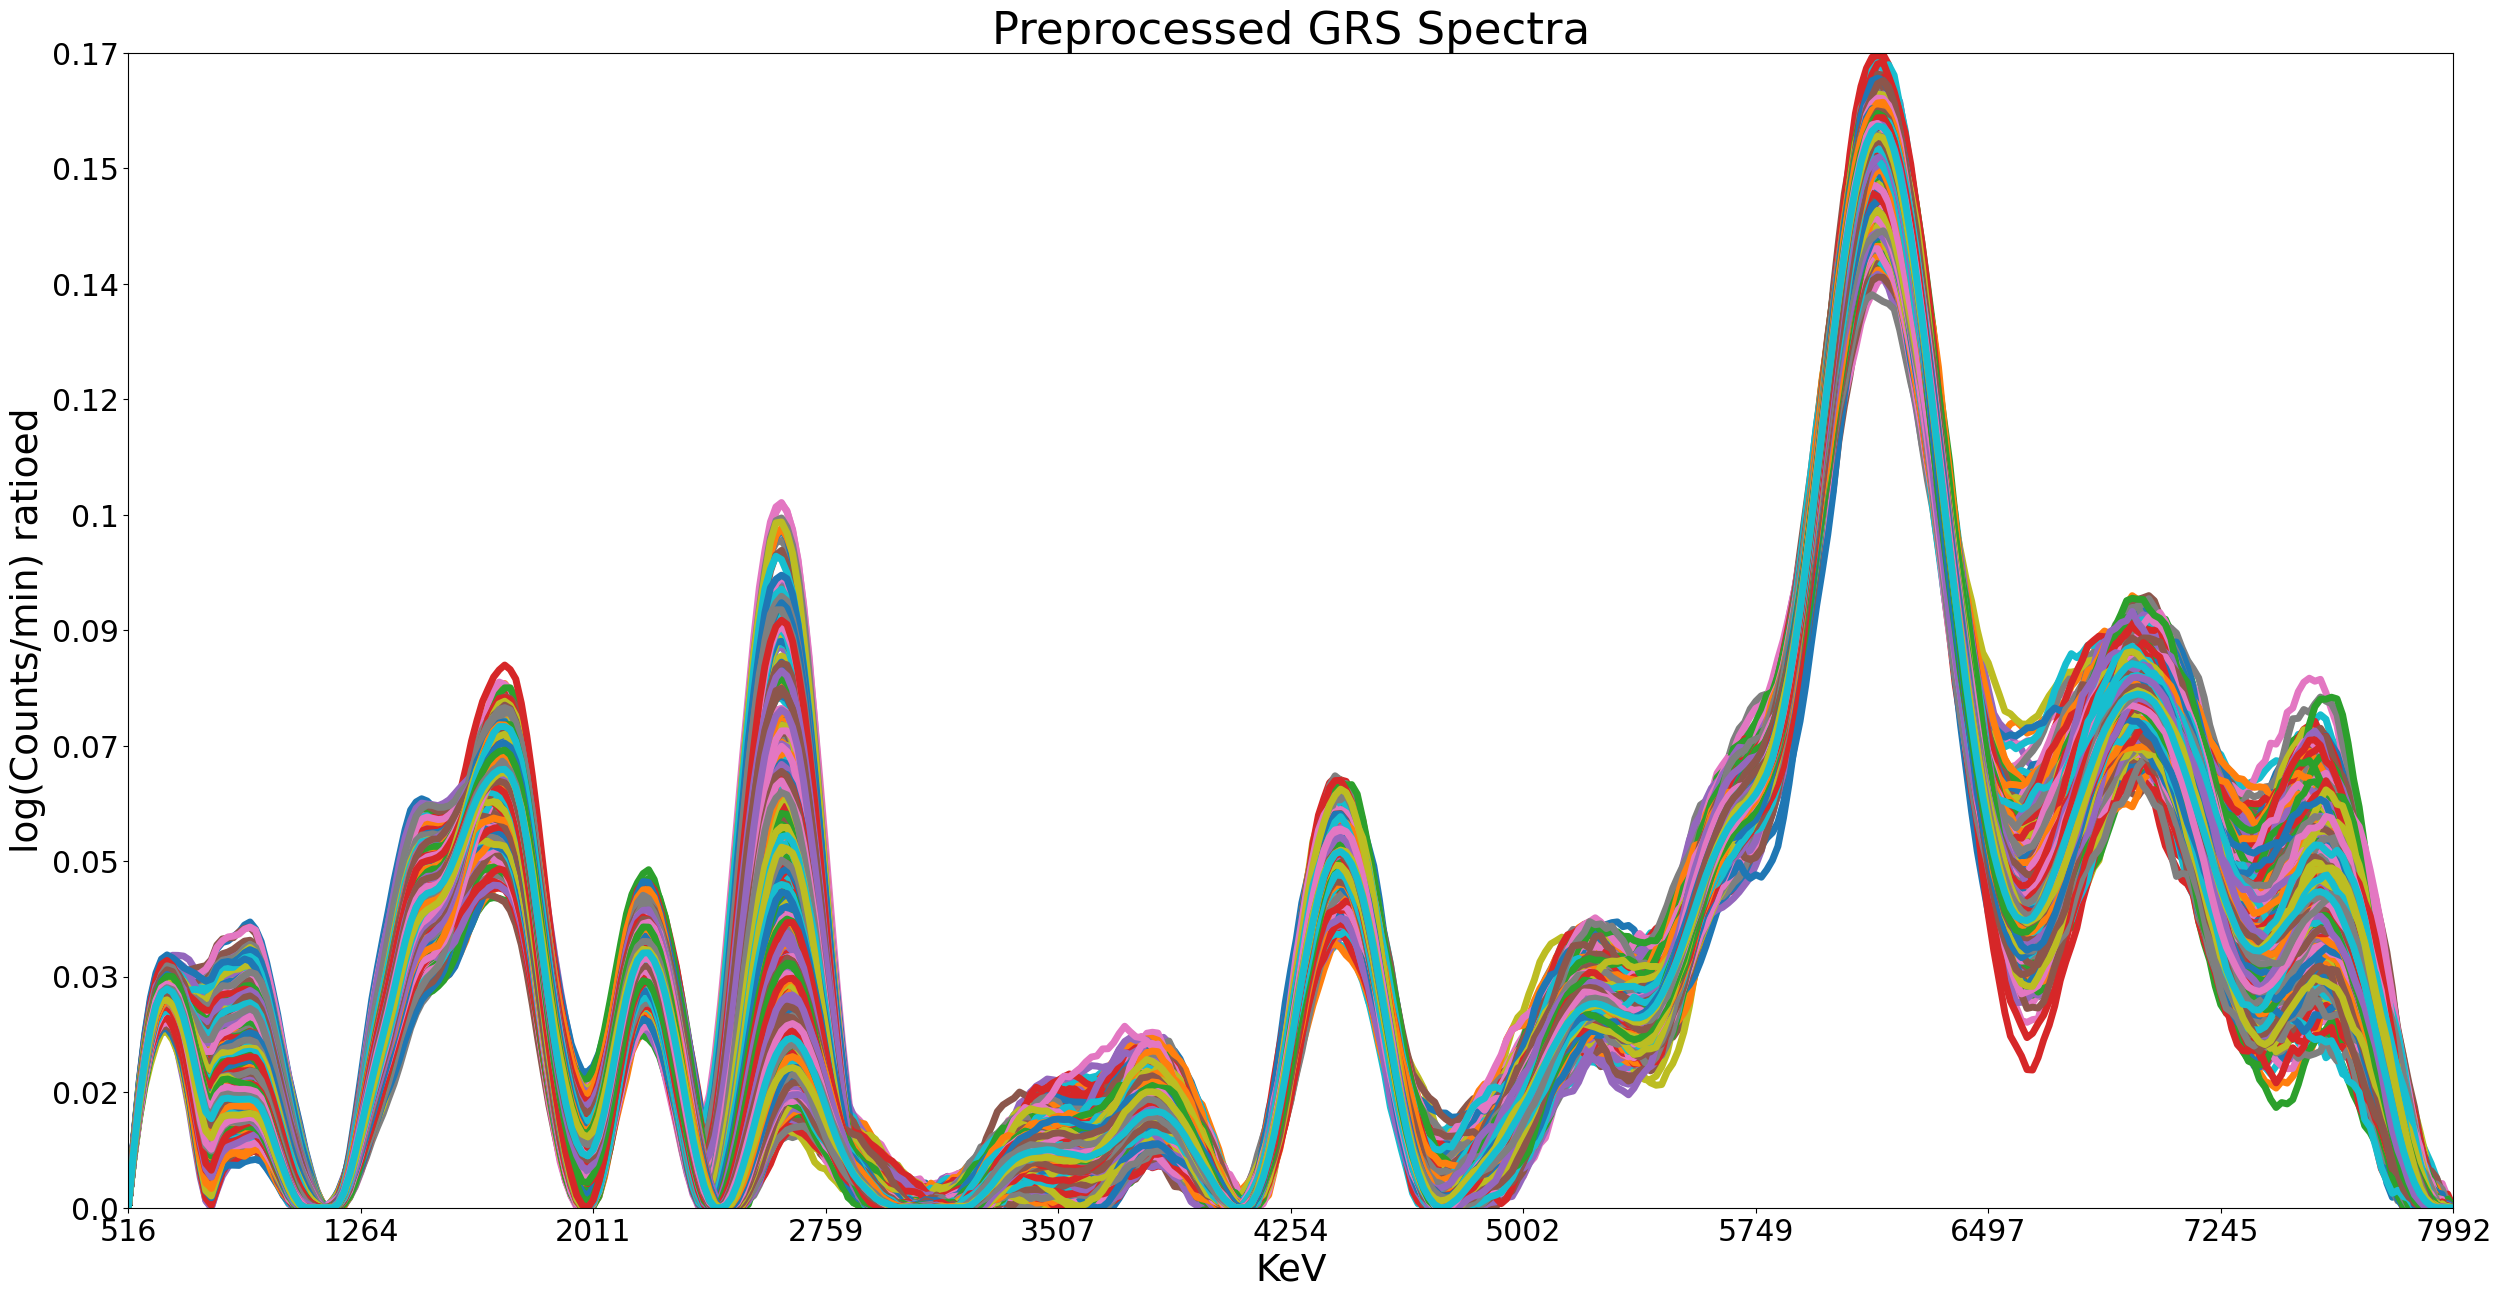

In [17]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [18]:
#import tensorflow
import tensorflow as tf

In [19]:
#set a global seed value
globalSeed=23

In [20]:
#compute the number of channels in the pre-processed spectra
noOfChannels=preprocessedSpectra.shape[1]

In [21]:
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,
                                 1))

In [22]:
#create a NN (Neural Network) graph containing just the input layer
nnGraph=inputLayer

In [23]:
#create a convolutional block
firstConvolutionalLayer=tf.keras.layers.Conv1D(filters=16,
                                               kernel_size=5,
                                               strides=3,
                                               padding='valid',
                                               name="1st_Conv_layer")
#add the 1st Conv layer to the graph
nnGraph=firstConvolutionalLayer(nnGraph)

#apply Relu activation
firstReluActivation=tf.keras.layers.Activation('relu',
                                               name="1st_Activation")
#add the 1st activation layer to the graph
nnGraph=firstReluActivation(nnGraph)

#apply batch normalization
firstBatchNormalization=tf.keras.layers.BatchNormalization(name="1st_Batch_Norm")
#add the 1st batch-norm layer to the graph
nnGraph=firstBatchNormalization(nnGraph)

#apply dropout
firstDropoutLayer=tf.keras.layers.Dropout(0.5,
                                          noise_shape=None,
                                          seed=globalSeed,
                                          name="1st_Dropout")
#add the 1st dropout layer to the graph
nnGraph=firstDropoutLayer(nnGraph)

In [24]:
#print the shape of the tensor outputed by the 1st convolutional block
print(f"Shape of tensor after first convolutional block: {nnGraph.shape}")

Shape of tensor after first convolutional block: (None, 139, 16)


In [25]:
#create a convolutional block
secondConvolutionalLayer=tf.keras.layers.Conv1D(filters=8,
                                               kernel_size=5,
                                               strides=3,
                                               padding='valid',
                                               name="2nd_Conv_layer")
#add the 2nd Conv layer to the graph
nnGraph=secondConvolutionalLayer(nnGraph)

#apply Relu activation
secondReluActivation=tf.keras.layers.Activation('relu',
                                               name="2nd_Activation")
#add the 2nd activation layer to the graph
nnGraph=secondReluActivation(nnGraph)

#apply batch normalization
secondBatchNormalization=tf.keras.layers.BatchNormalization(name="2nd_Batch_Norm")
#add the 2nd batch-norm layer to the graph
nnGraph=secondBatchNormalization(nnGraph)

#apply dropout
secondDropoutLayer=tf.keras.layers.Dropout(0.5,
                                          noise_shape=None,
                                          seed=globalSeed,
                                          name="2nd_Dropout")
#add the 2nd dropout layer to the graph
nnGraph=secondDropoutLayer(nnGraph)

In [26]:
#print the shape of the tensor outputed by the 2nd convolutional block
print(f"Shape of tensor after second convolutional block: {nnGraph.shape}")

Shape of tensor after second convolutional block: (None, 45, 8)


In [27]:
#create a convolutional block
thirdConvolutionalLayer=tf.keras.layers.Conv1D(filters=8,
                                               kernel_size=5,
                                               strides=3,
                                               padding='valid',
                                               name="3rd_Conv_layer")
#add the 3rd Conv layer to the graph
nnGraph=thirdConvolutionalLayer(nnGraph)

#apply Relu activation
thirdReluActivation=tf.keras.layers.Activation('relu',
                                               name="3rd_Activation")
#add the 3rd activation layer to the graph
nnGraph=thirdReluActivation(nnGraph)

#apply batch normalization
thirdBatchNormalization=tf.keras.layers.BatchNormalization(name="3rd_Batch_Norm")
#add the 3rd batch-norm layer to the graph
nnGraph=thirdBatchNormalization(nnGraph)

#apply dropout
thirdDropoutLayer=tf.keras.layers.Dropout(0.5,
                                          noise_shape=None,
                                          seed=globalSeed,
                                          name="3rd_Dropout")
#add the 3rd dropout layer to the graph
nnGraph=thirdDropoutLayer(nnGraph)

In [28]:
#print the shape of the tensor outputed by the 3rd convolutional block
print(f"Shape of tensor after third convolutional block: {nnGraph.shape}")

Shape of tensor after third convolutional block: (None, 14, 8)


In [29]:
#create a flatten layer to flatten the features extracted by the convolutional blocks
flattenedFeatures=tf.keras.layers.Flatten()
#add the flatten layer to the graph
nnGraph=flattenedFeatures(nnGraph)

In [30]:
#print the shape of the flattened features
print(f"Shape of flattened features: {nnGraph.shape}")

Shape of flattened features: (None, 112)


In [31]:
#add a fully connected layer to the network
firstFullyConnectedLayer=tf.keras.layers.Dense(24,
                                               activation='relu',
                                               name="1st_Fully_Connected_Layer")
nnGraph=firstFullyConnectedLayer(nnGraph)

In [32]:
#print the number of nodes outputted by the first fully connected layer
print(f"Shape of Nodes outputed by the first Fully connected layer: {nnGraph.shape}")

Shape of Nodes outputed by the first Fully connected layer: (None, 24)


In [33]:
#add a fully connected layer to the network (output layer)
secondFullyConnectedLayer=tf.keras.layers.Dense(1,
                                                activation='relu',
                                                name="2st_Fully_Connected_Layer")
nnGraph=secondFullyConnectedLayer(nnGraph)

In [34]:
#print the number of output nodes in the network
print(f"Number of output nodes: {nnGraph.shape}")

Number of output nodes: (None, 1)


In [35]:
#build the model
uAbundanceEstimator=tf.keras.Model(inputs=inputLayer,
                                  outputs=nnGraph,
                                  name="K_Abundance_Estimator")

In [36]:
#create the loss function, Mean Squared Error
lossFunction=tf.keras.losses.MeanSquaredError()

In [37]:
#define a funtion to calculate the Pearsons correlation between two sets of values
def pearson_correlation(x,y):
    x_mean=tf.reduce_mean(x)
    y_mean=tf.reduce_mean(y)
    x_diff=x-x_mean
    y_diff=y-y_mean

    
    covariance=tf.reduce_mean(tf.multiply(x_diff,y_diff))

    
    x_std=tf.sqrt(tf.reduce_mean(tf.square(x_diff)))
    y_std=tf.sqrt(tf.reduce_mean(tf.square(y_diff)))

    
    correlation=covariance/(x_std*y_std)

    return correlation

In [38]:
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)

In [39]:
#set the number of epochs the model is to be trained for
noOfEpochs=10**5

In [40]:
#set the batch size
batchSize=64

In [41]:
#compile the model
uAbundanceEstimator.compile(optimizer=optimizer,
                            loss=lossFunction,
                            metrics=[pearson_correlation],
                            steps_per_execution=26)

In [42]:
#set the address where the untrained model will be saved
untrainedModelAddress="E:/Ml4Sci_GRS_abundance_estimation/Models/untrained_U_Abundance_Model.h5"

In [43]:
#save the untrained model
tf.keras.models.save_model(uAbundanceEstimator,
                           untrainedModelAddress,
                           overwrite=True)

In [44]:
#import KFold from sklearn, to be used for KFold validation
from sklearn.model_selection import KFold

In [45]:
#set no. of folds over which the model is to be validated
noOfFolds=10

In [46]:
#create a K-Fold splitter
splitter=KFold(n_splits=noOfFolds,
               shuffle=True,
               random_state=globalSeed)

In [47]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [48]:
#create a list to hold model training history
modelTrainingHistories=[]
#create a list to store the trained models
trainedModels=[]

In [49]:
#iterate through the folds
for i,(trainingIndices,testingIndices) in enumerate(splitter.split(scaledUAbundances)):
    
    #print the current fold number
    print(f"Starting processing fold {i+1}")
    
    #load the untrained model
    kAbundanceEstimator=tf.keras.models.load_model(untrainedModelAddress,
                                                  compile=False)
    #compile the model
    kAbundanceEstimator.compile(optimizer=optimizer,
                                loss=lossFunction,
                                metrics=[pearson_correlation],
                                steps_per_execution=26)
    
    #fit the model to the current fold's data
    currentModelTrainingHistory=kAbundanceEstimator.fit(x=preprocessedSpectra[trainingIndices,:],
                                                        y=scaledUAbundances[trainingIndices],
                                                        batch_size=batchSize,
                                                        epochs=noOfEpochs,
                                                        verbose=0,
                                                        validation_data=(preprocessedSpectra[testingIndices,:],
                                                                         scaledUAbundances[testingIndices]),
                                                        validation_freq=1)
    
    #save the training history of the current model
    modelTrainingHistories.append(currentModelTrainingHistory)
    
    
    #set the address where the trained model from the current 
    currentFoldTrainedModelAddress="E:/Ml4Sci_GRS_abundance_estimation/Models/Trained_K_Abundance_Model_Fold"+str(i+1)+".h5"
    
    #save the trained model
    trainedModels.append(kAbundanceEstimator)
    
    #remove the trained model from memory
    kAbundanceEstimator=None
    del kAbundanceEstimator

Starting processing fold 1
Starting processing fold 2
Starting processing fold 3
Starting processing fold 4
Starting processing fold 5
Starting processing fold 6
Starting processing fold 7
Starting processing fold 8
Starting processing fold 9
Starting processing fold 10


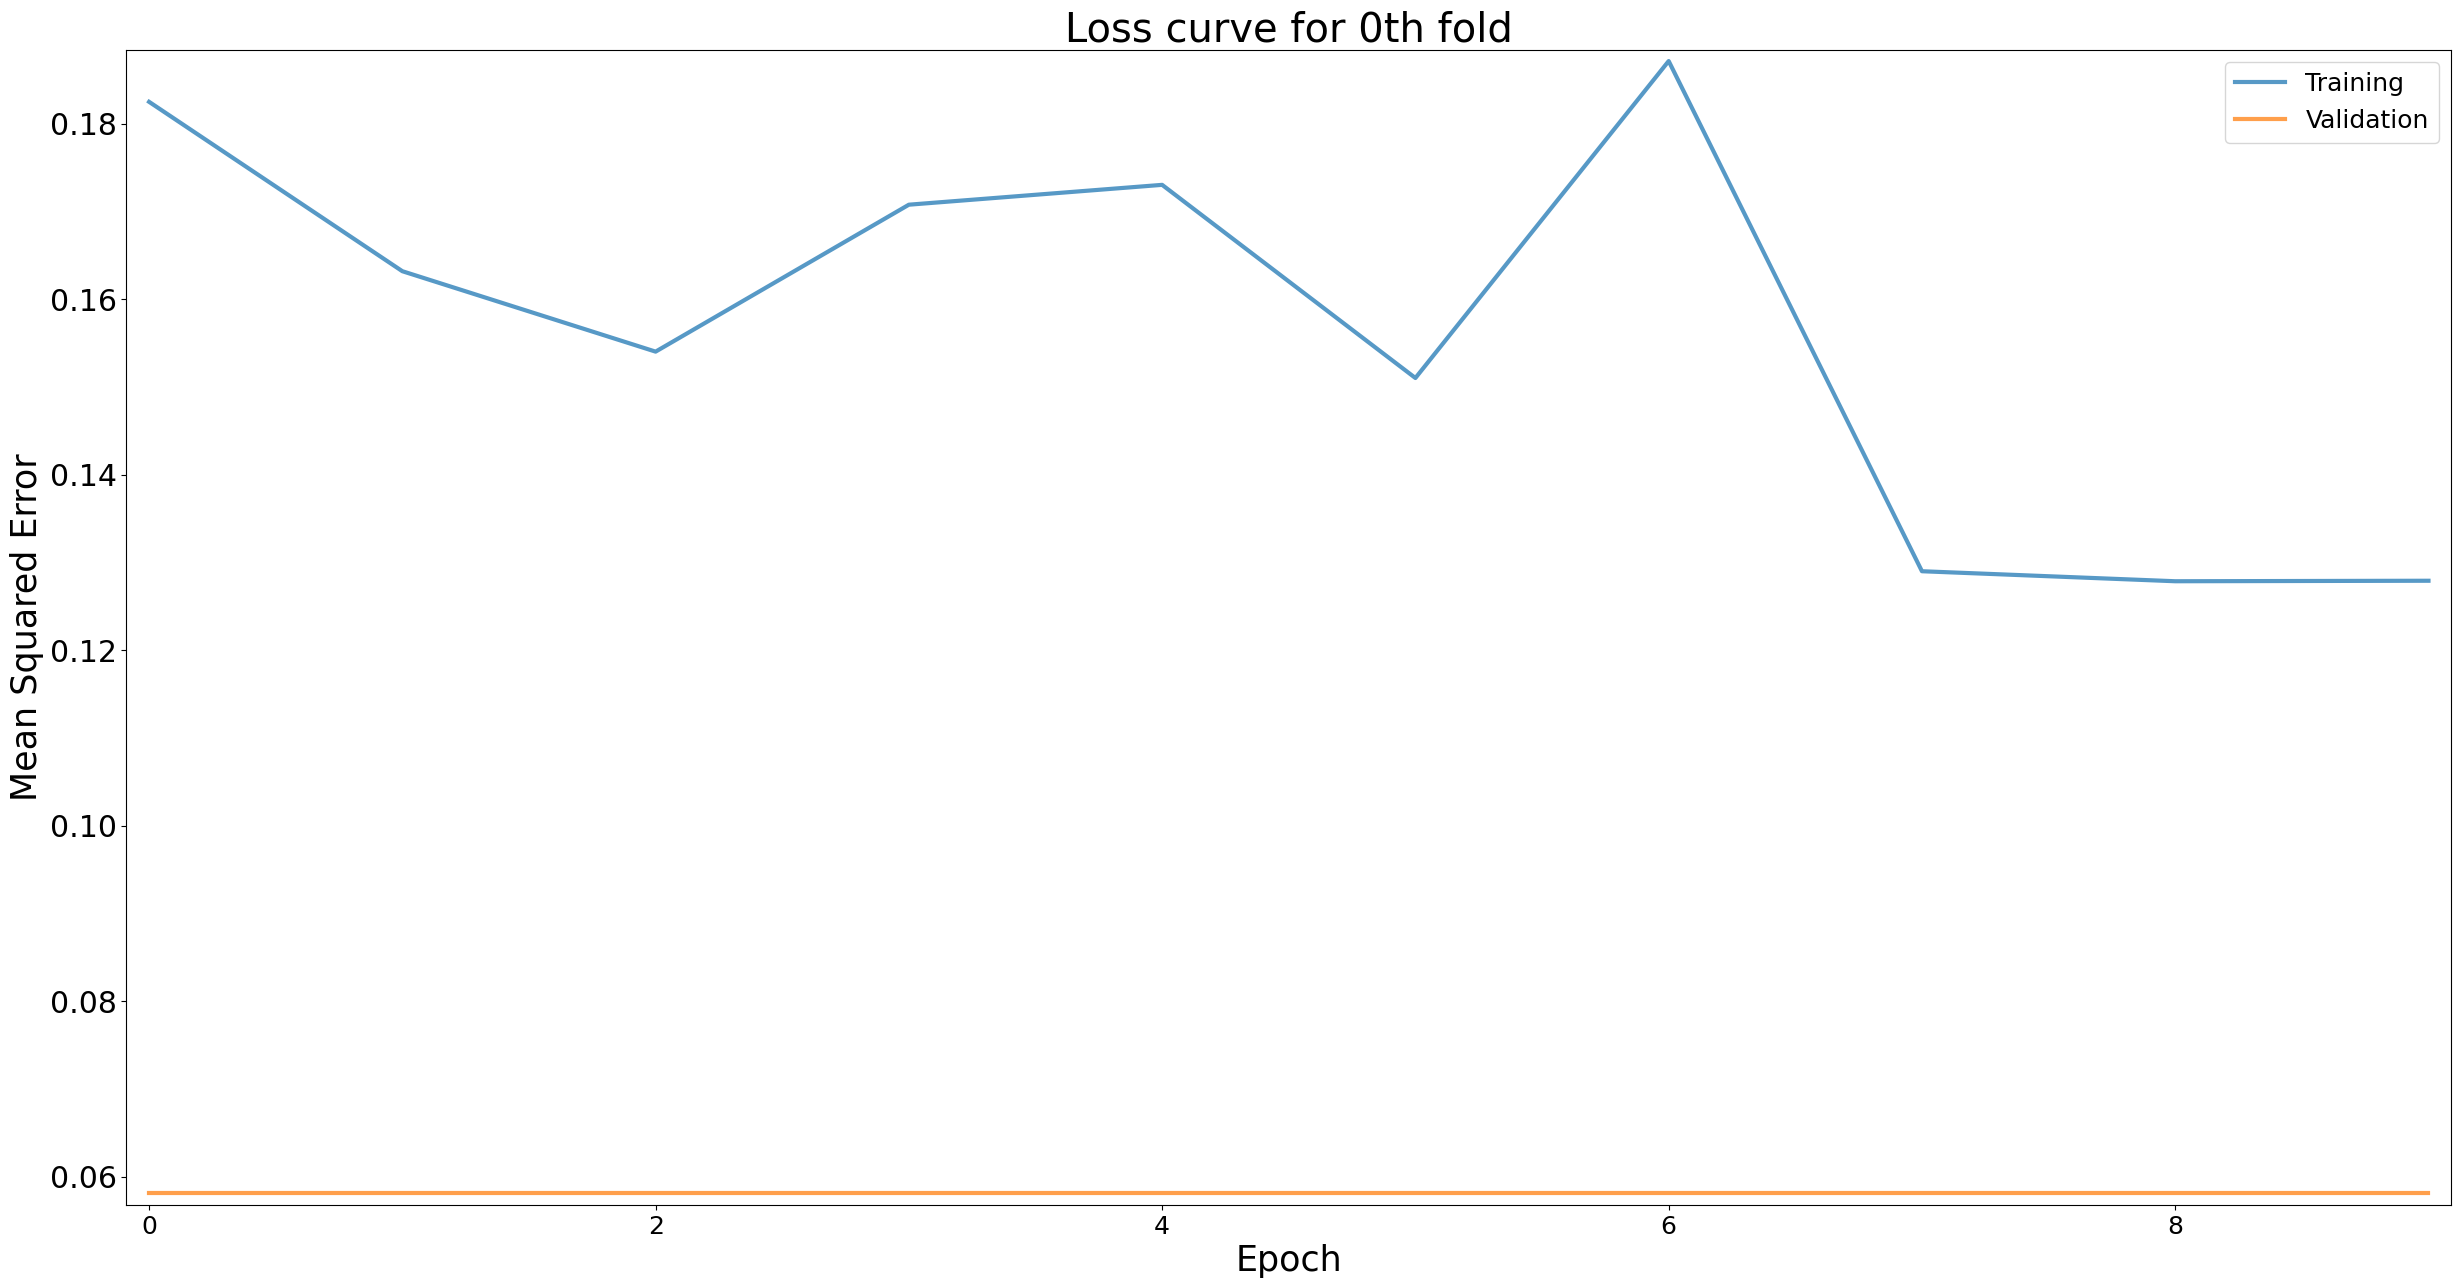

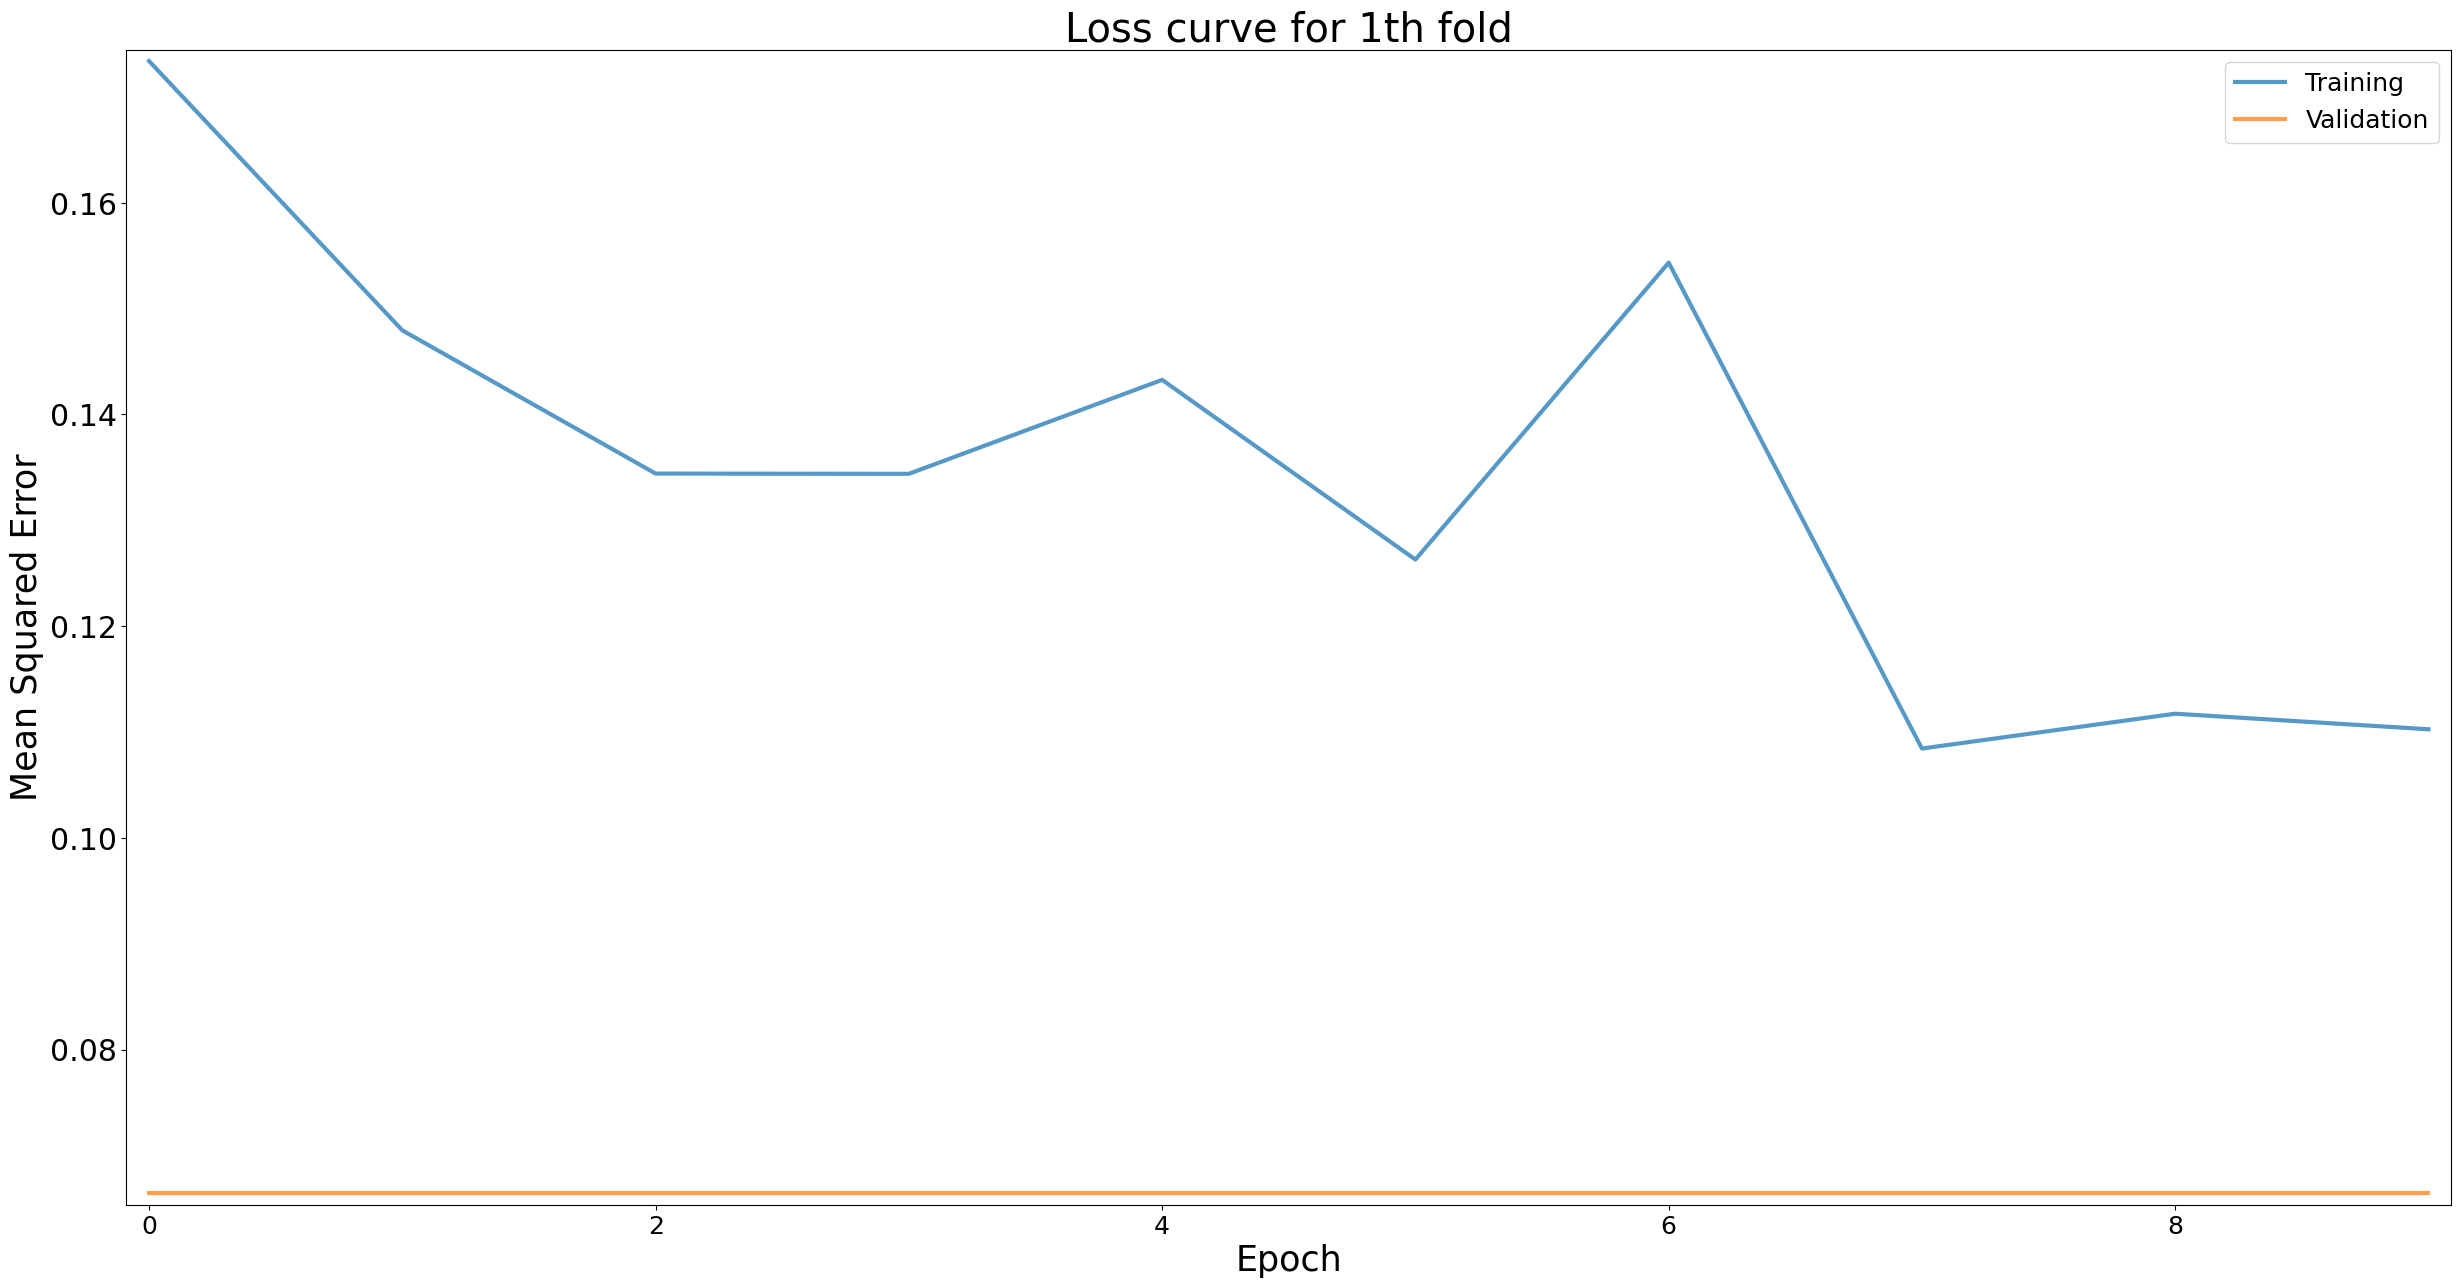

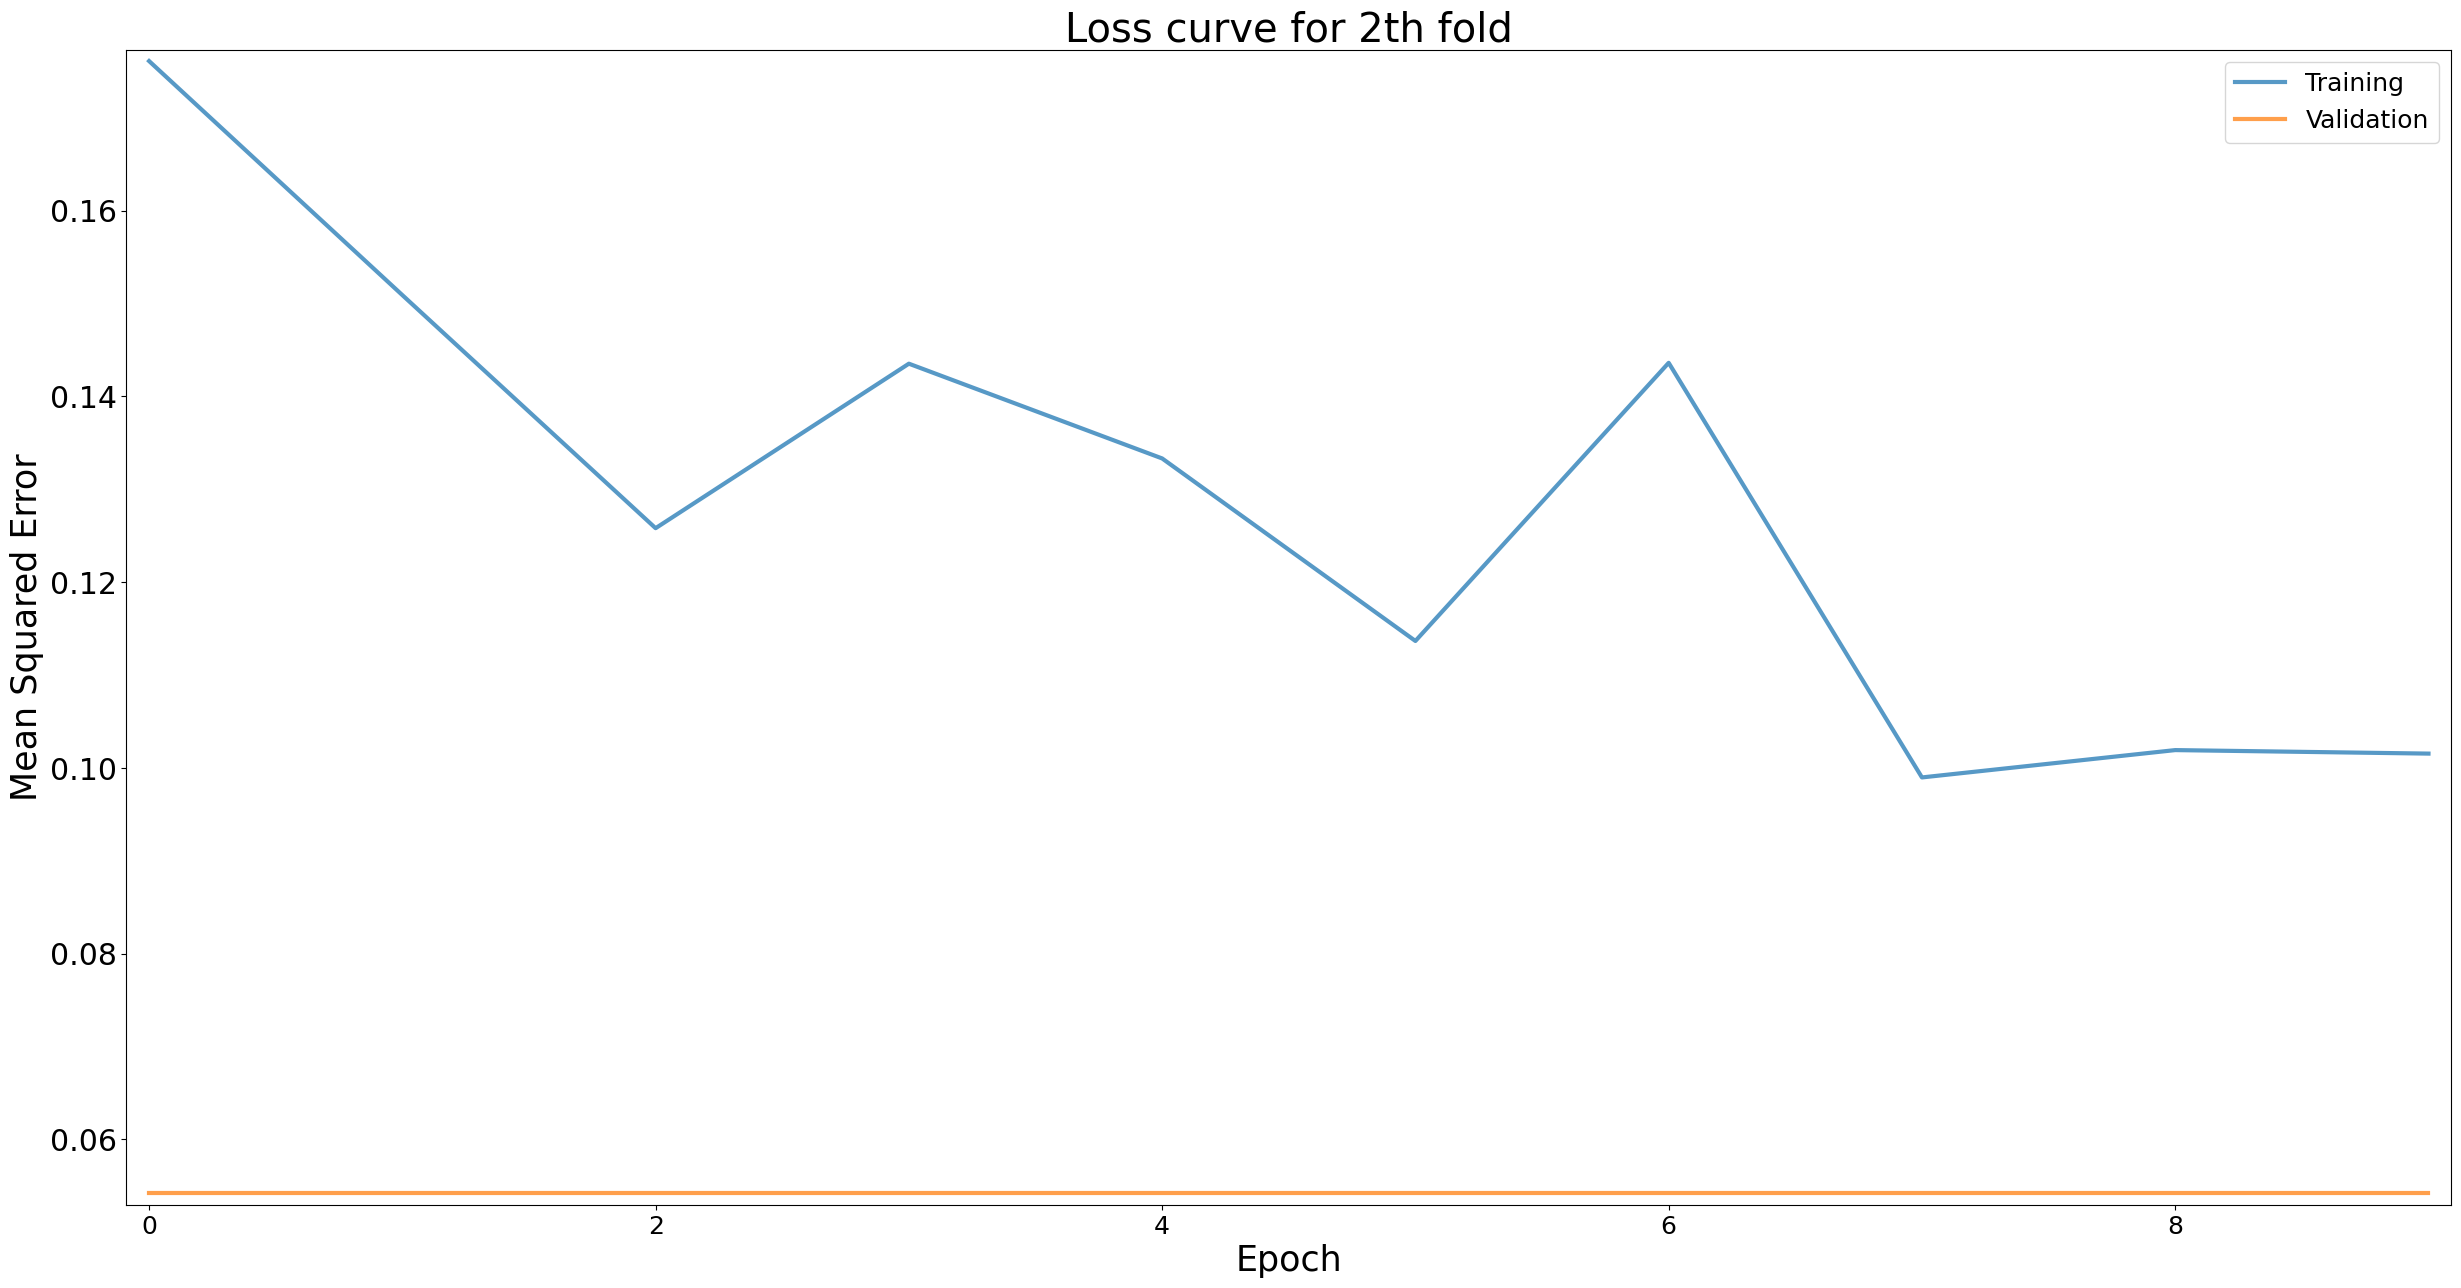

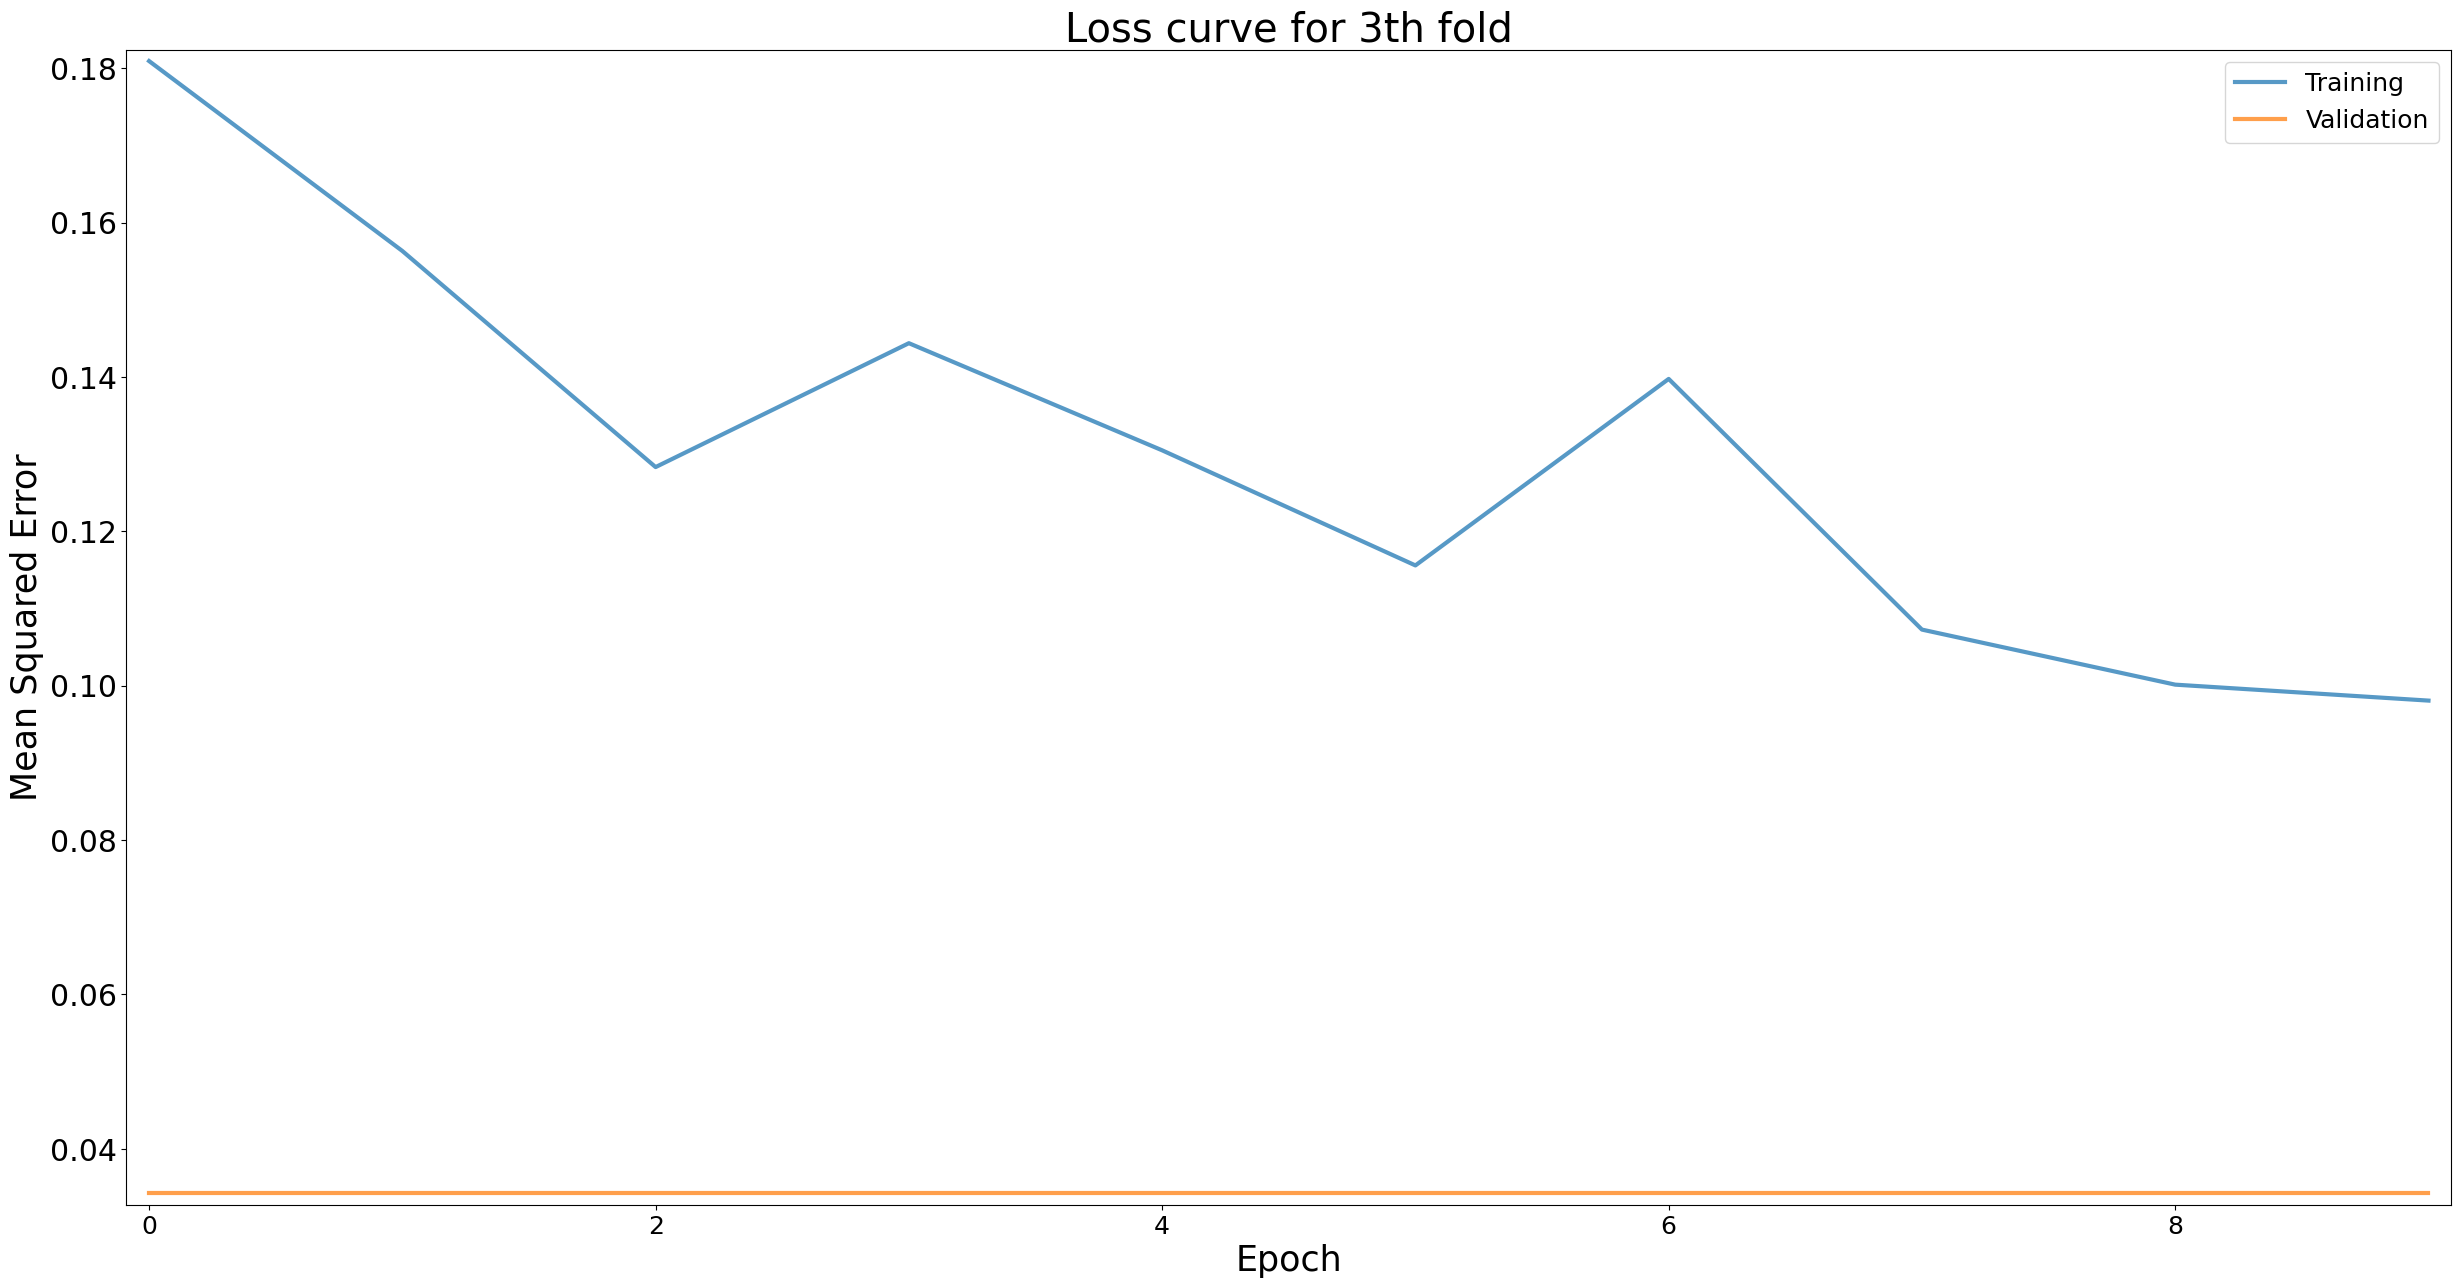

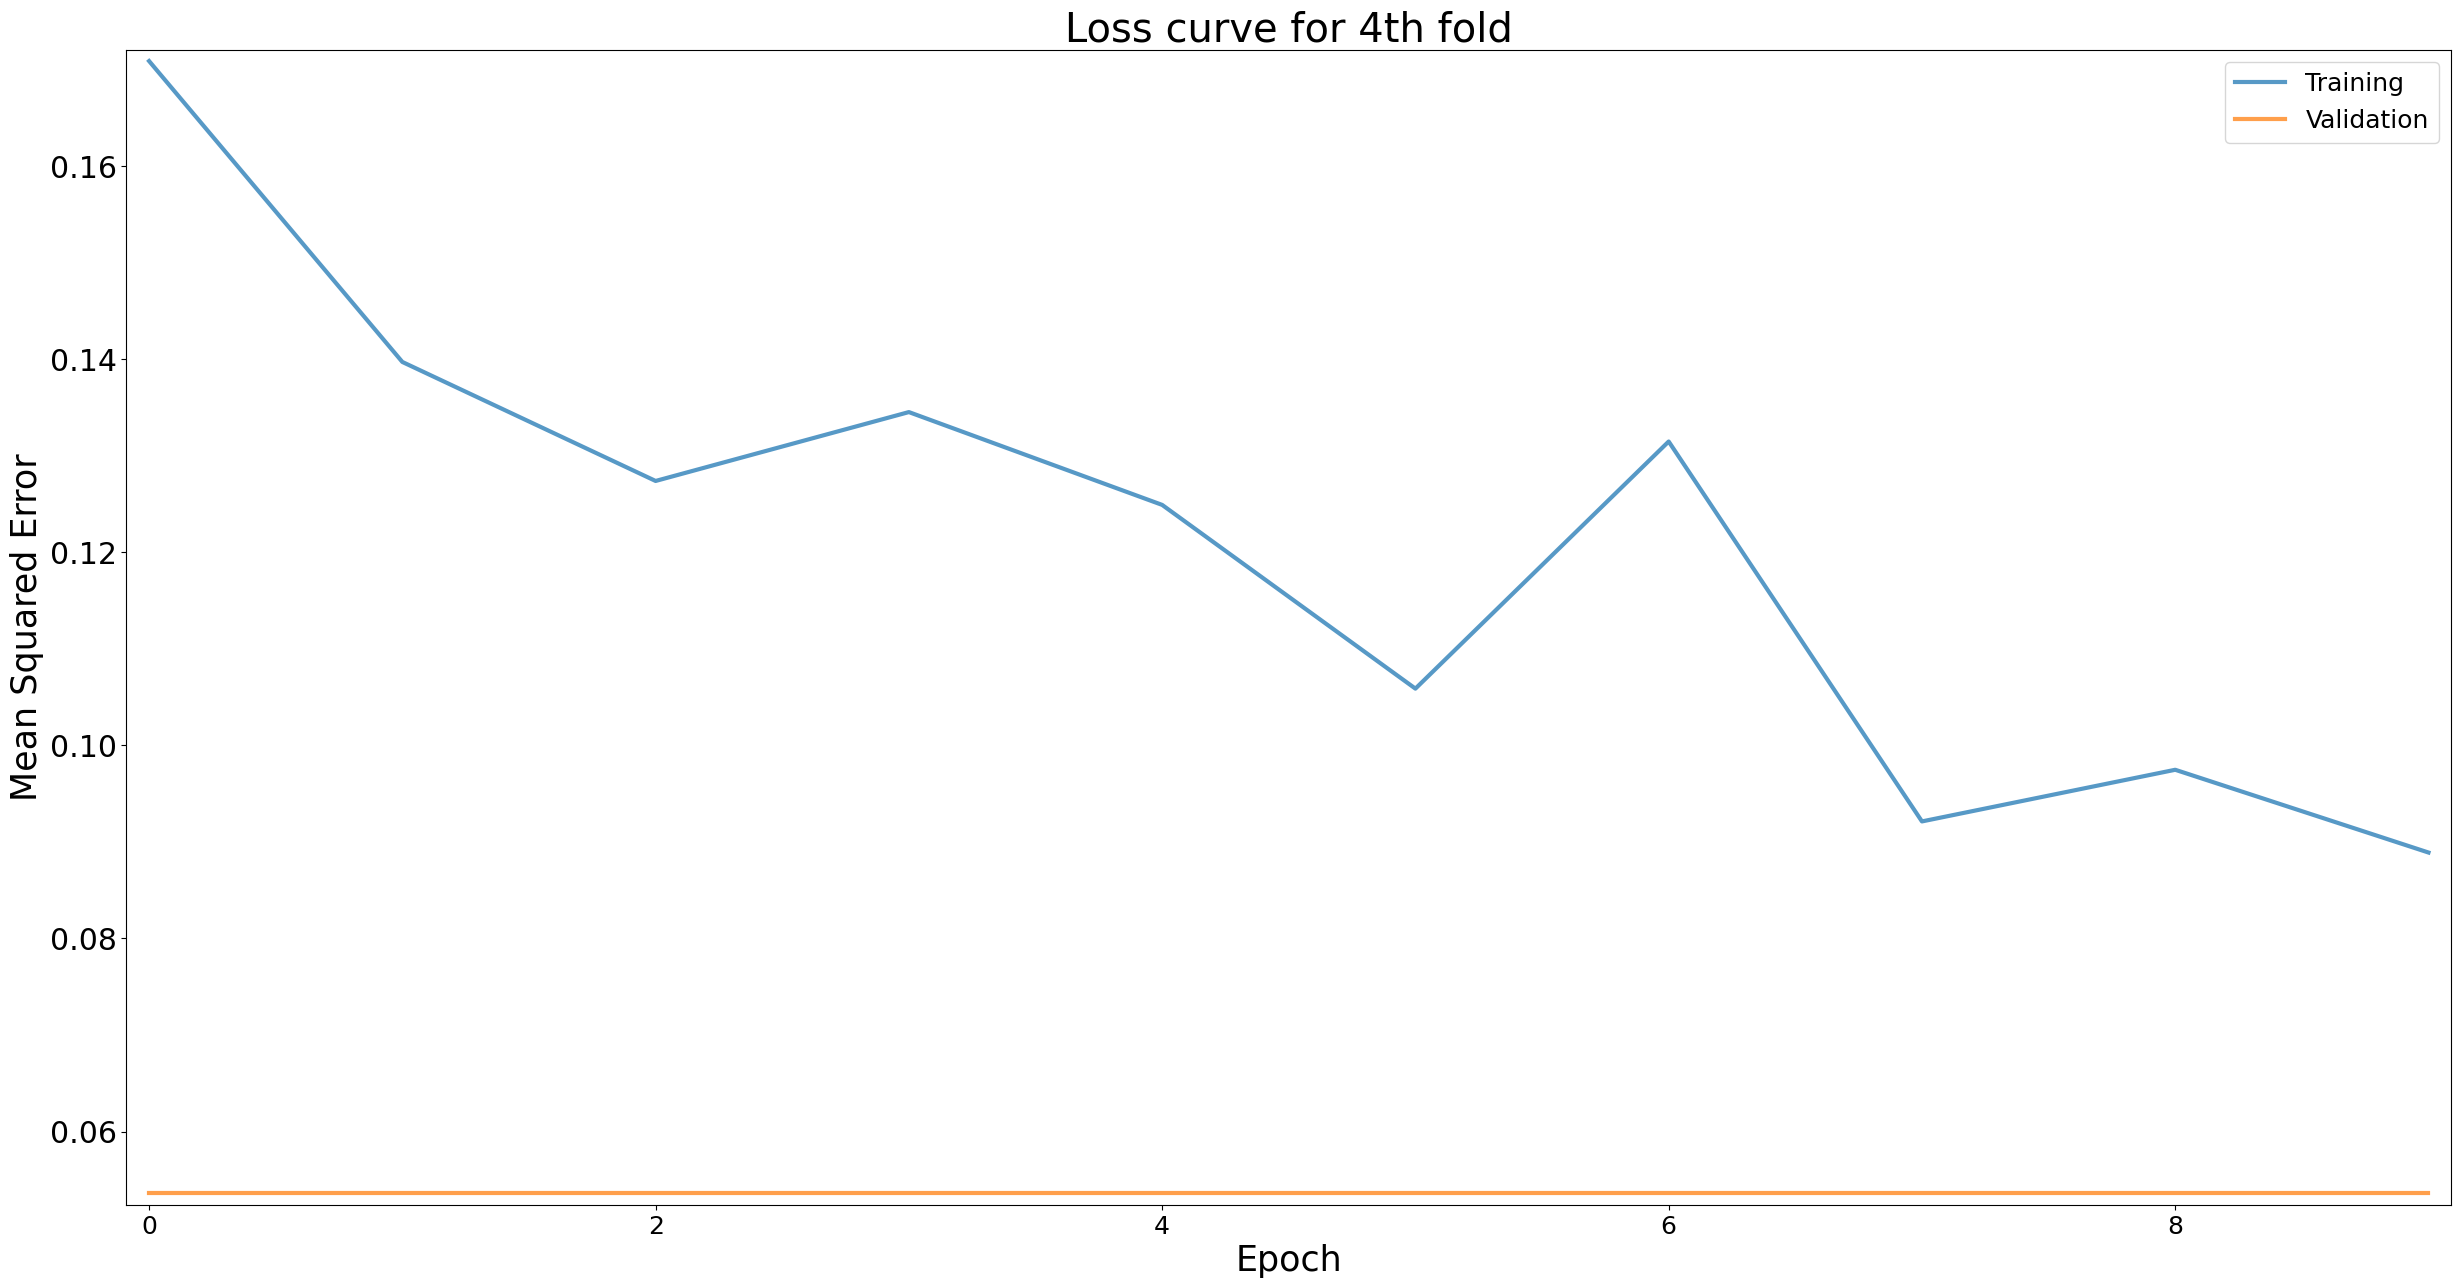

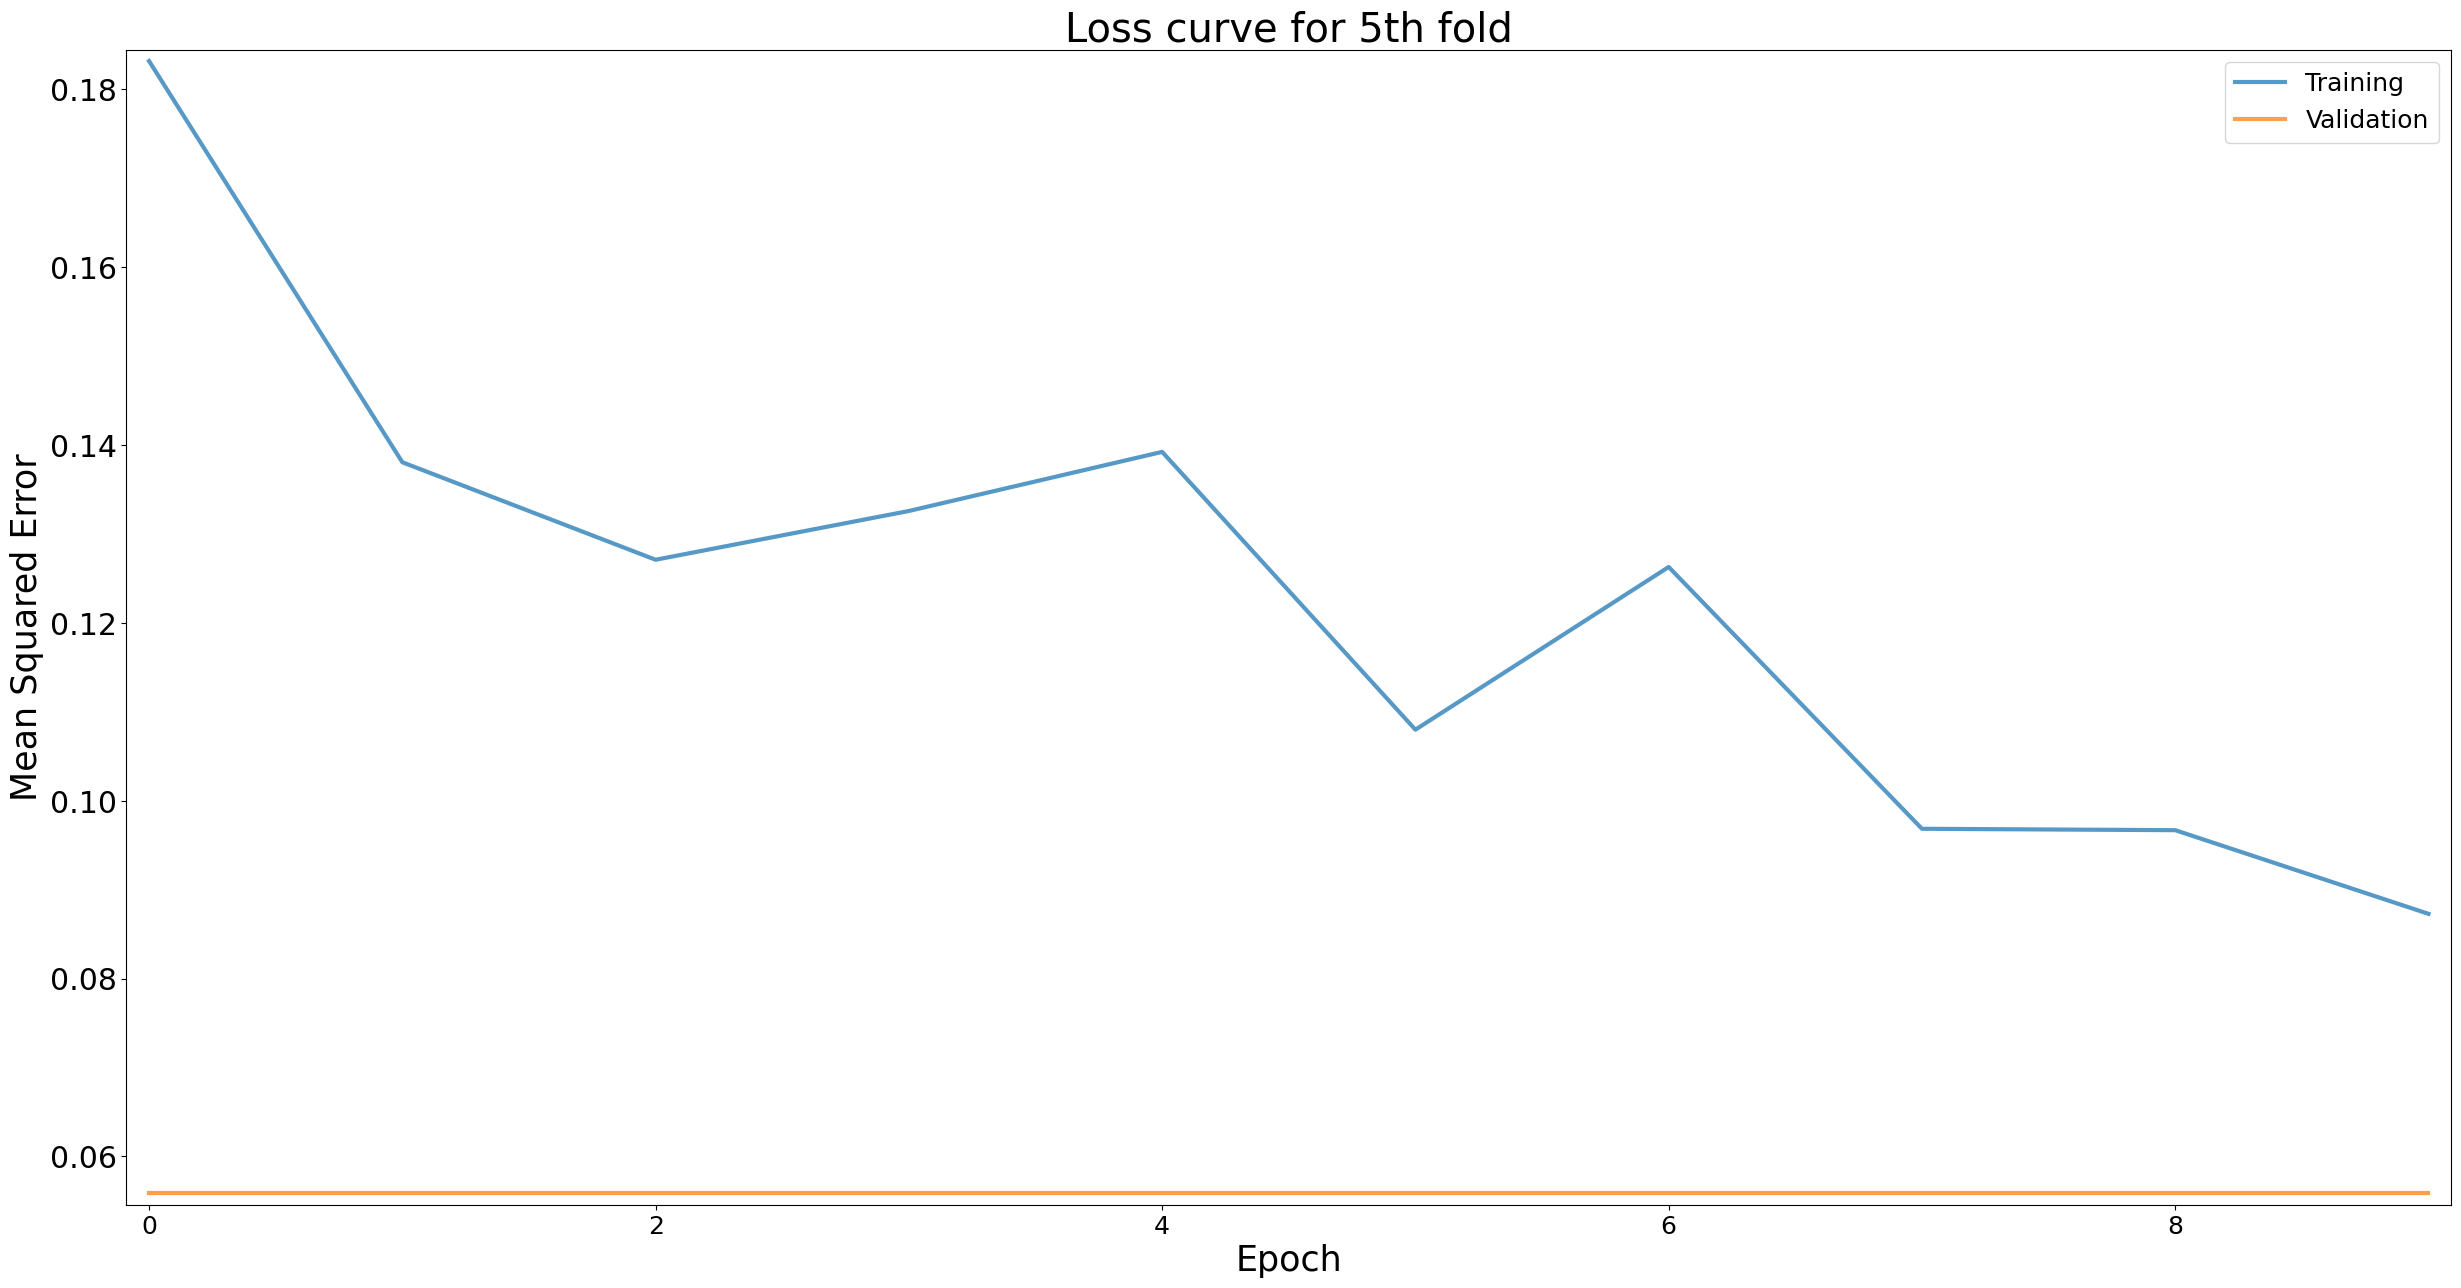

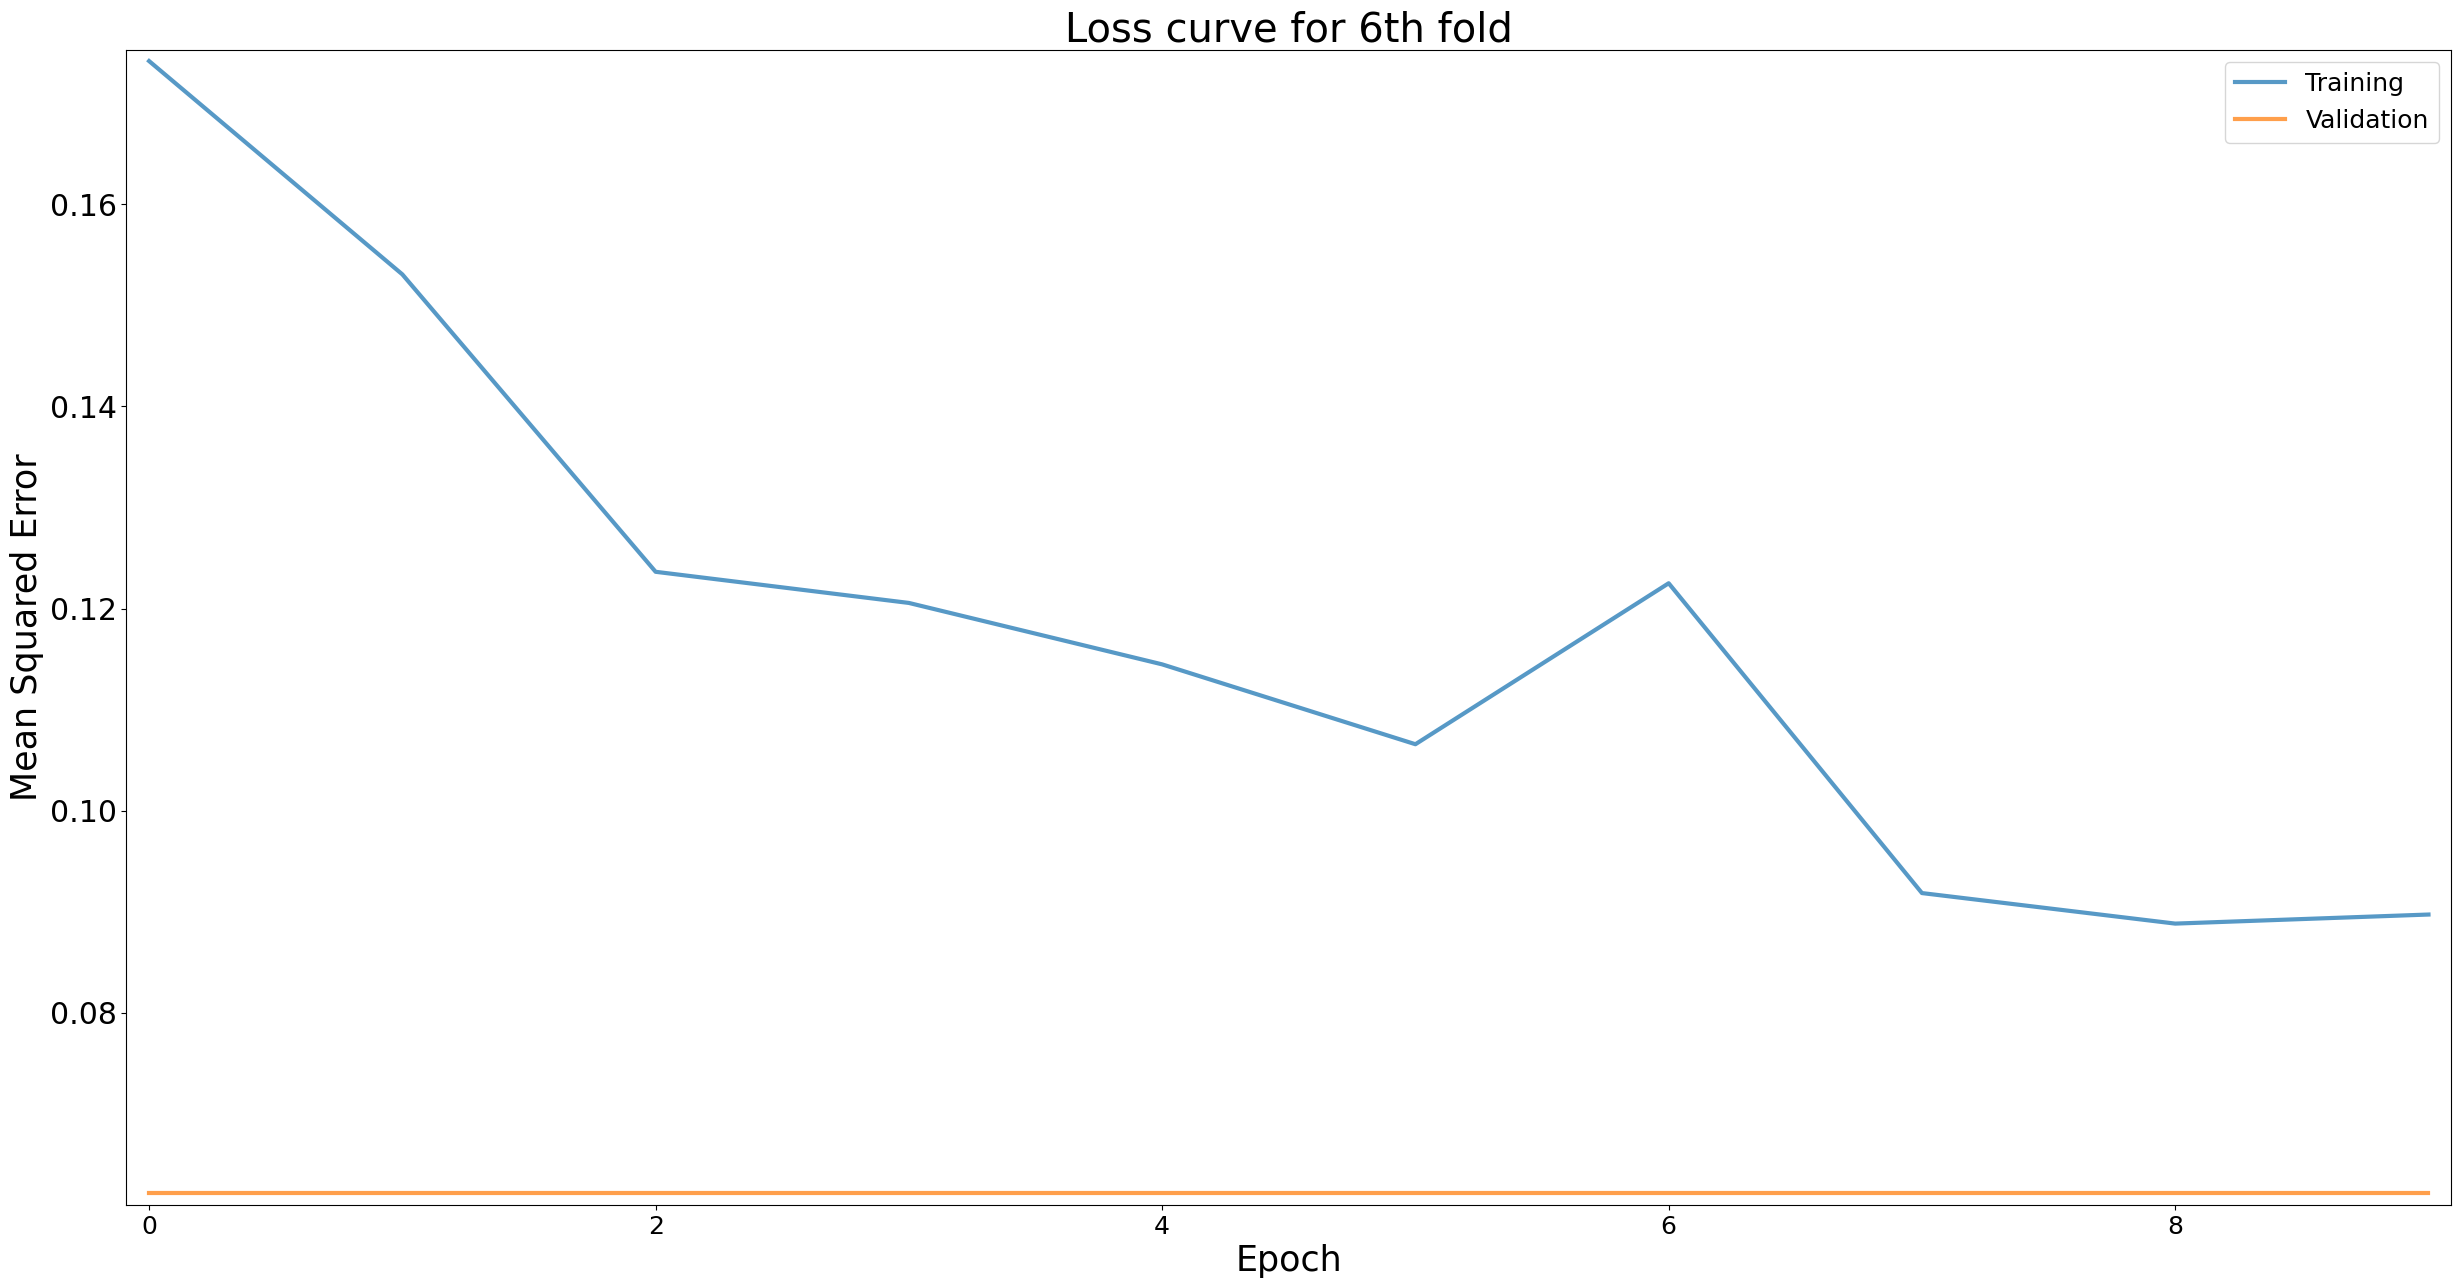

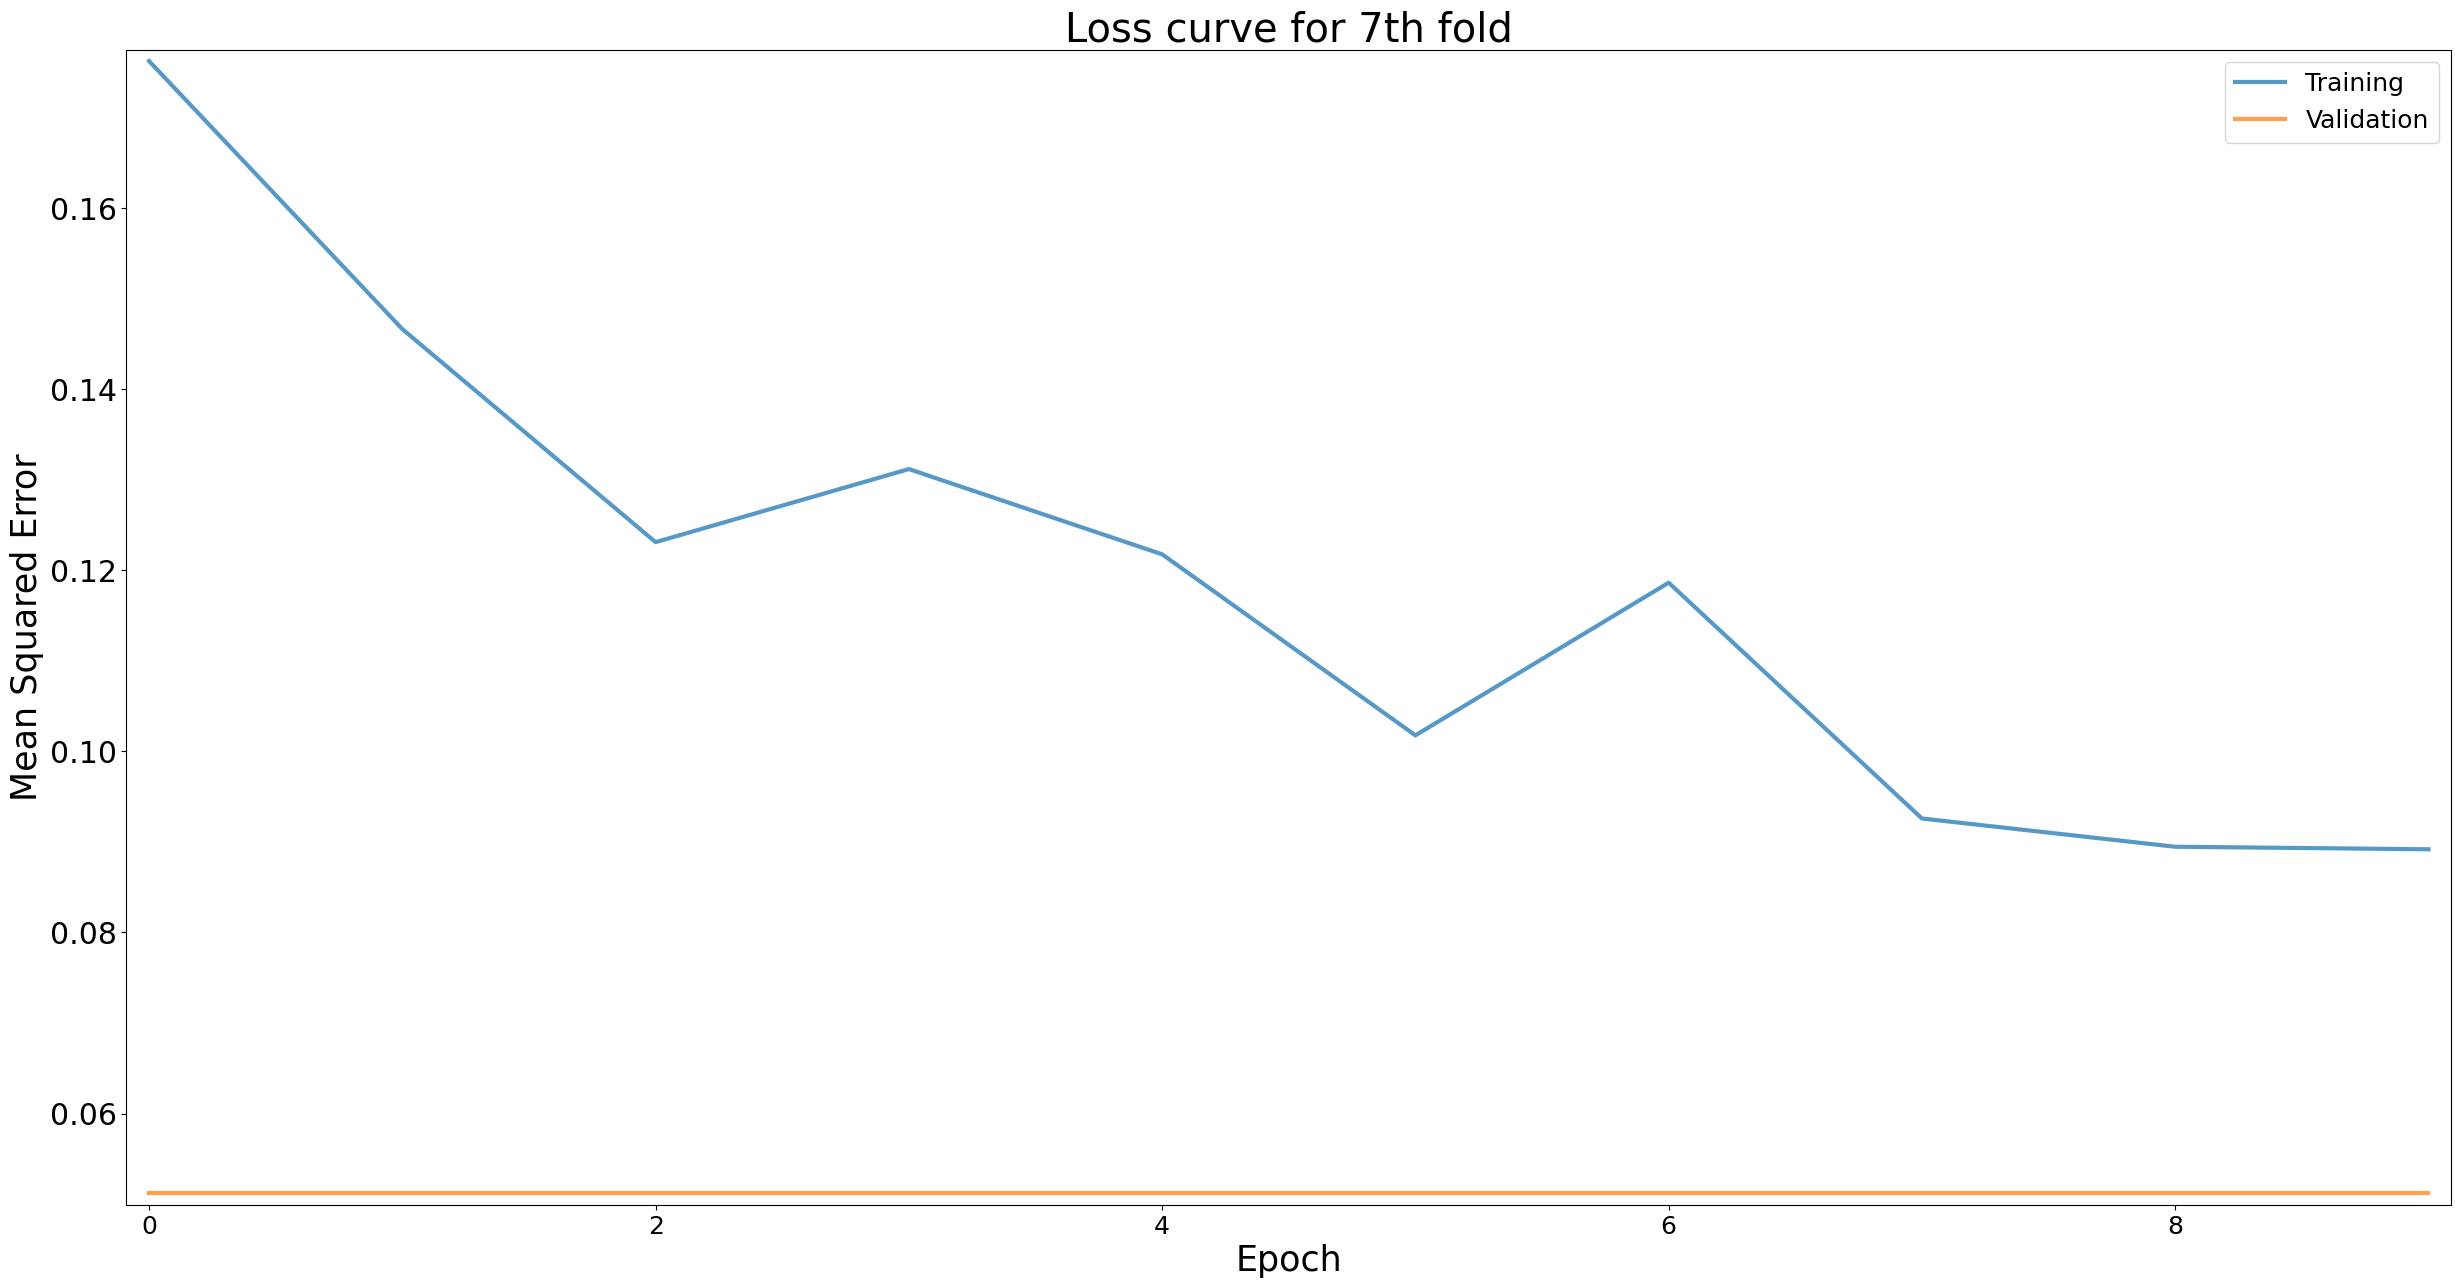

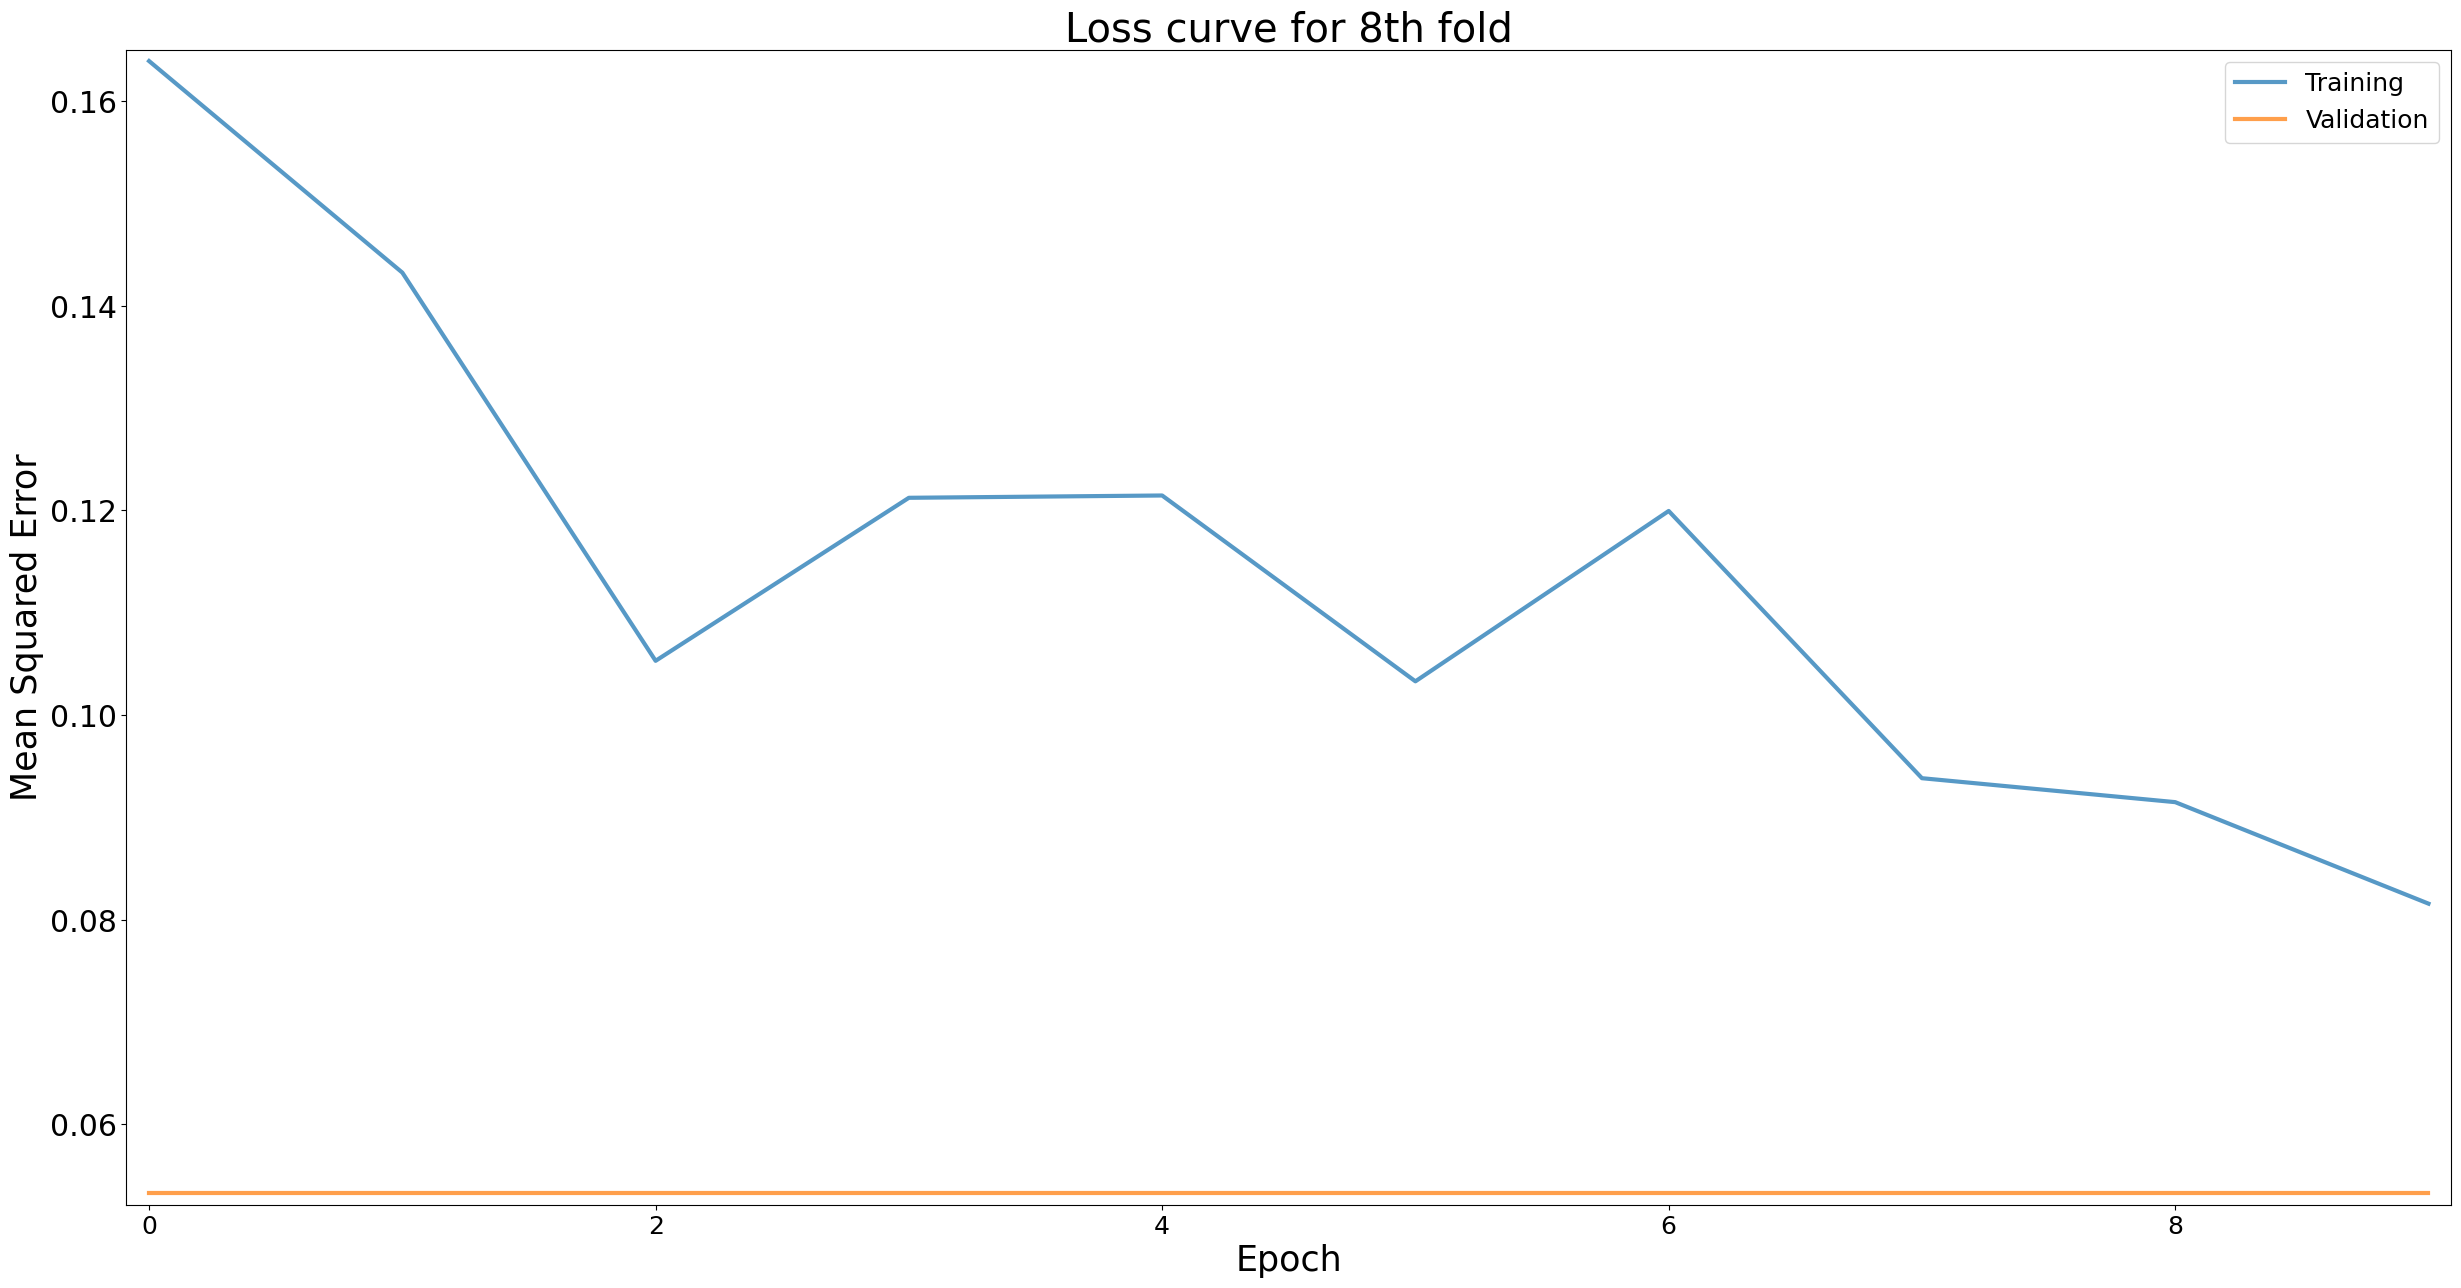

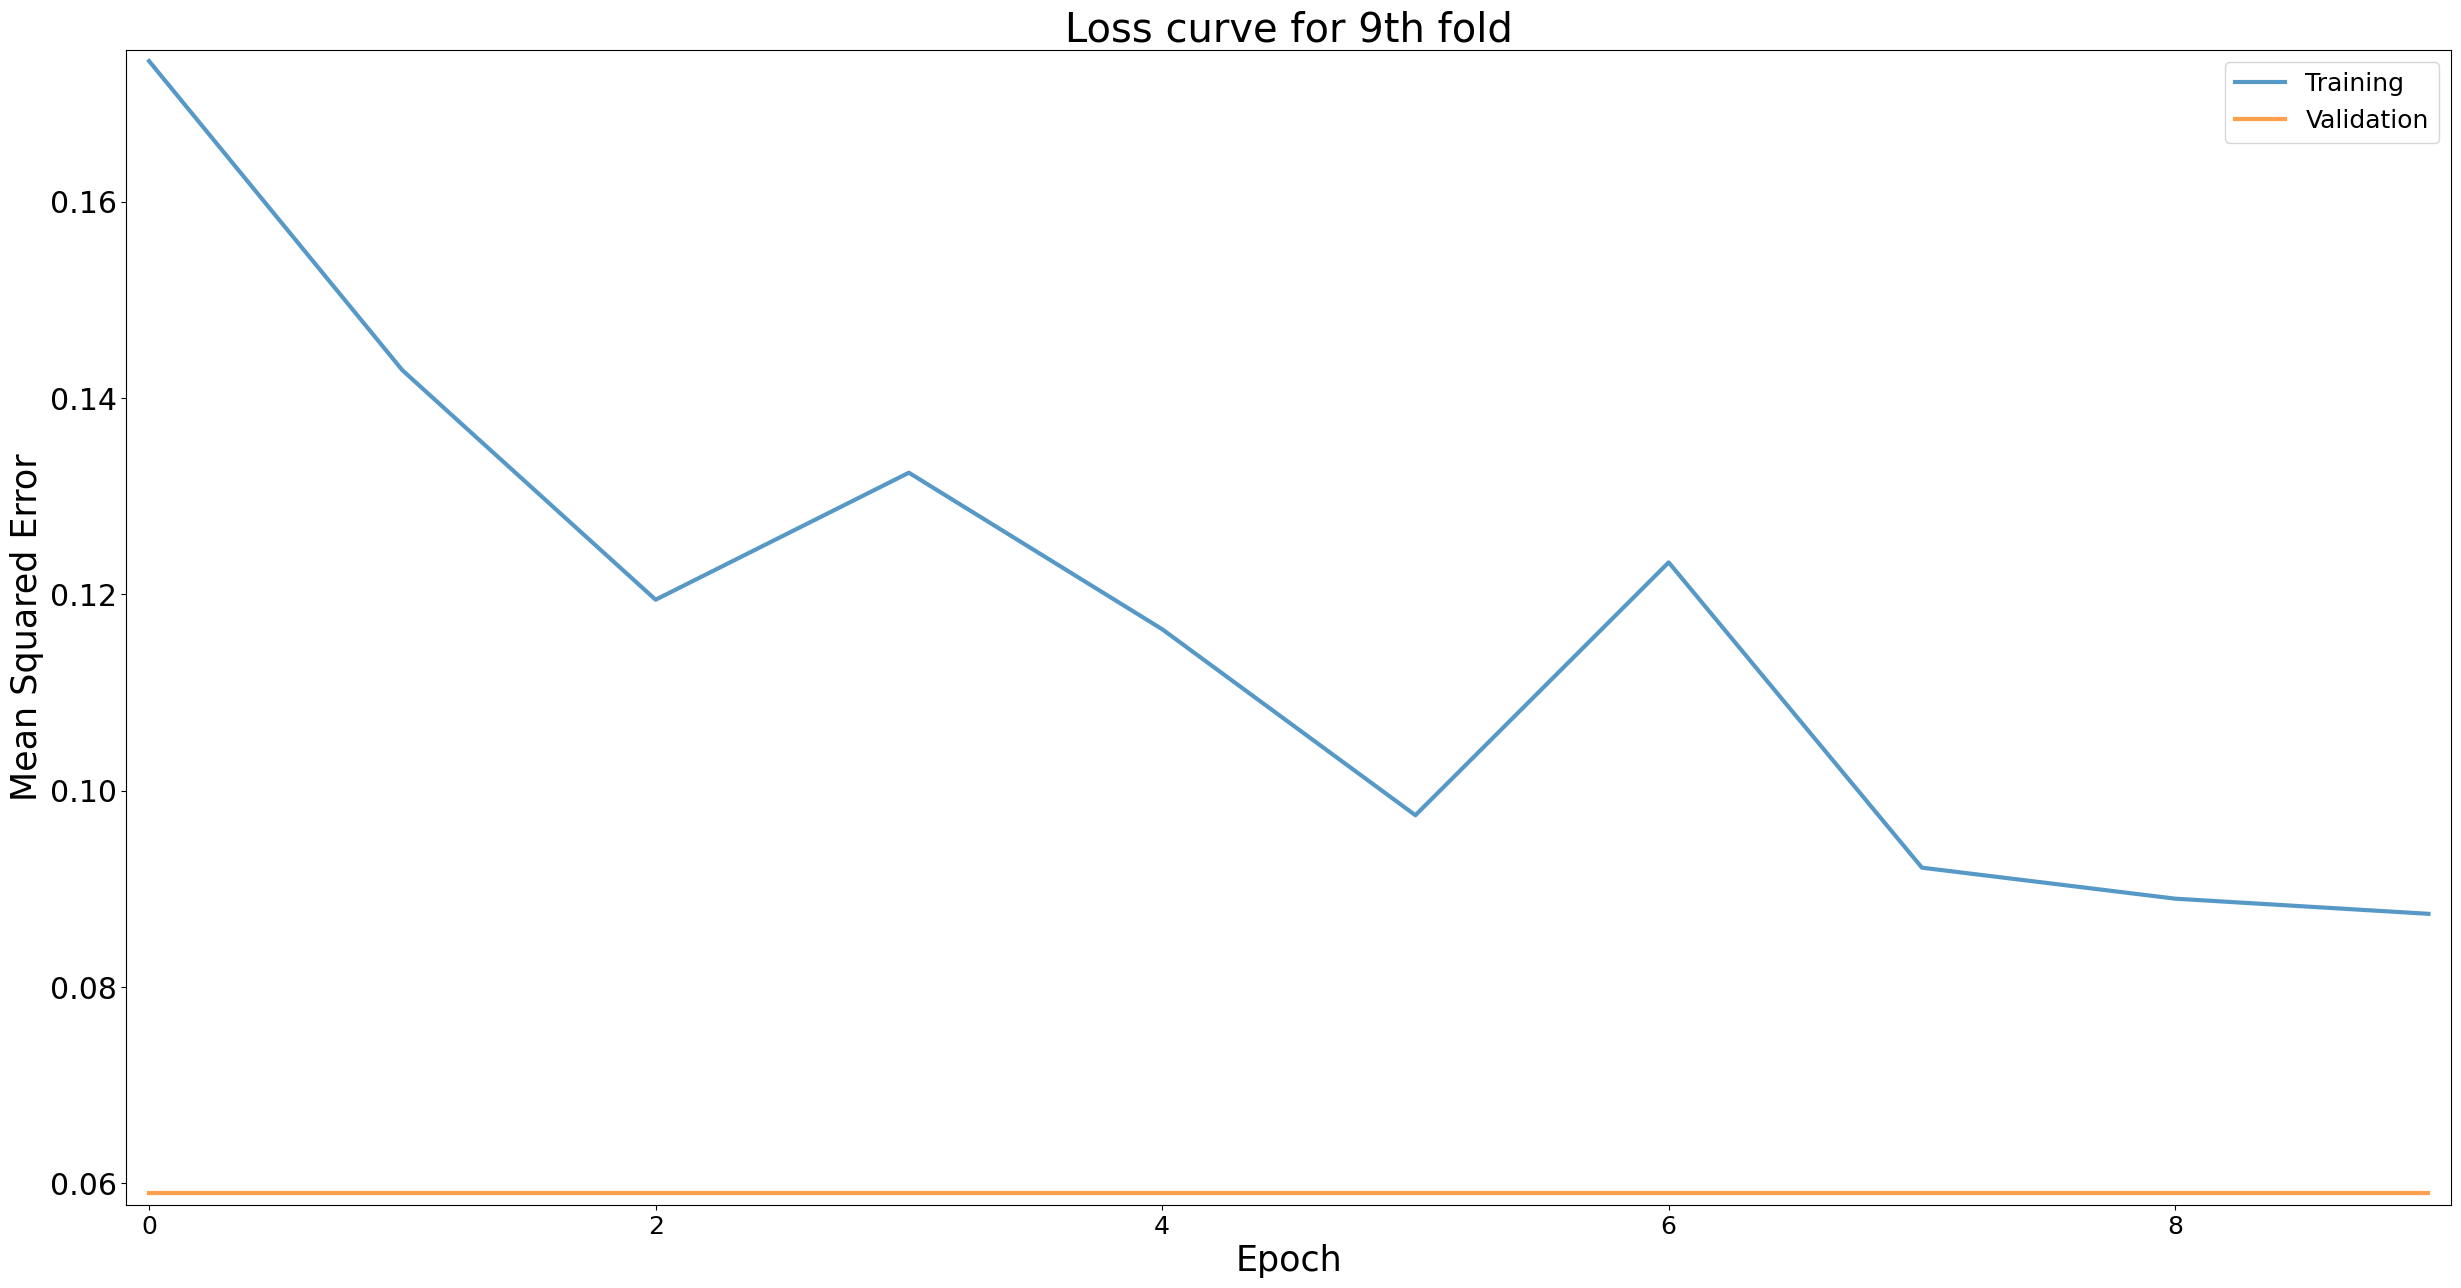

In [51]:
#iterate through all the folds and plot the loss curves
for i in range(noOfFolds):

    #create a figure
    plt.figure(figsize=(30,15),
               dpi=100)
    #plot the training loss for the current fold
    plt.plot(modelTrainingHistories[i].history['loss'],
             label="Training",
             lw=3,
             alpha=0.75)
    ##plot the validation loss for the current fold
    plt.plot(modelTrainingHistories[i].history['val_loss'],
             label="Validation",
             lw=3,
             alpha=0.75)
    #annotate the figure
    plt.title('Loss curve for '+str(i)+'th fold',
              fontsize=baseFontSize*1.6)
    plt.ylabel('Mean Squared Error',
              fontsize=baseFontSize*1.4)
    plt.xlabel('Epoch',
              fontsize=baseFontSize*1.4)
    plt.xticks(fontsize=baseFontSize*1)
    plt.yticks(fontsize=baseFontSize*1.2)
    plt.margins(0.01)
    plt.legend(loc='best',fontsize=baseFontSize)

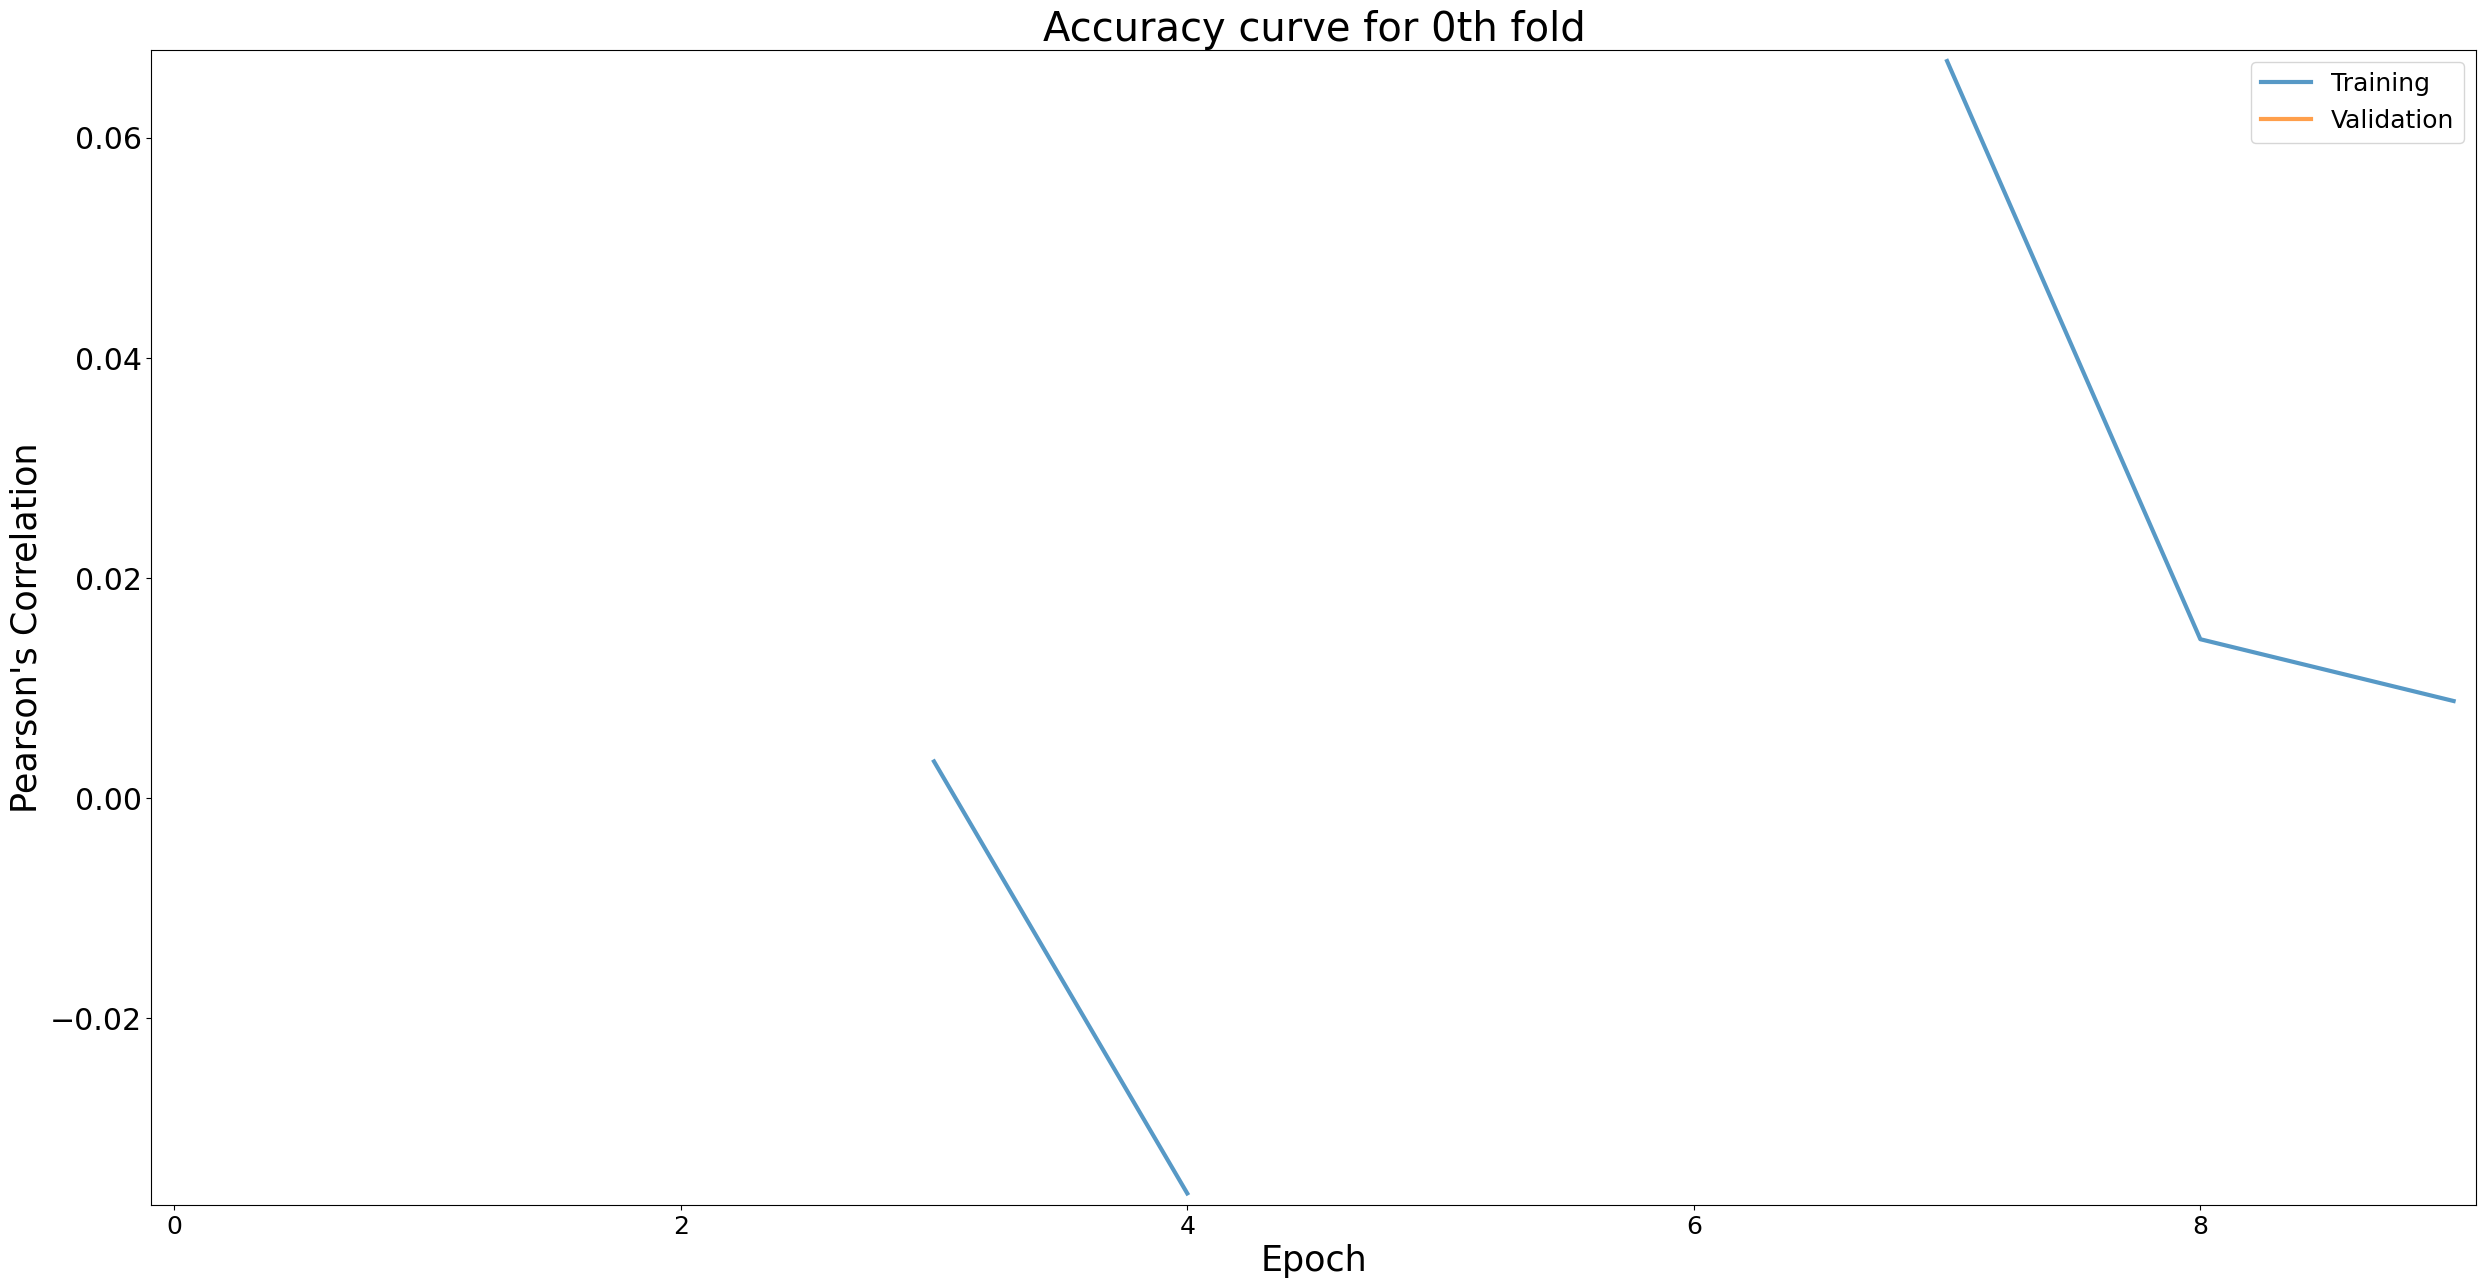

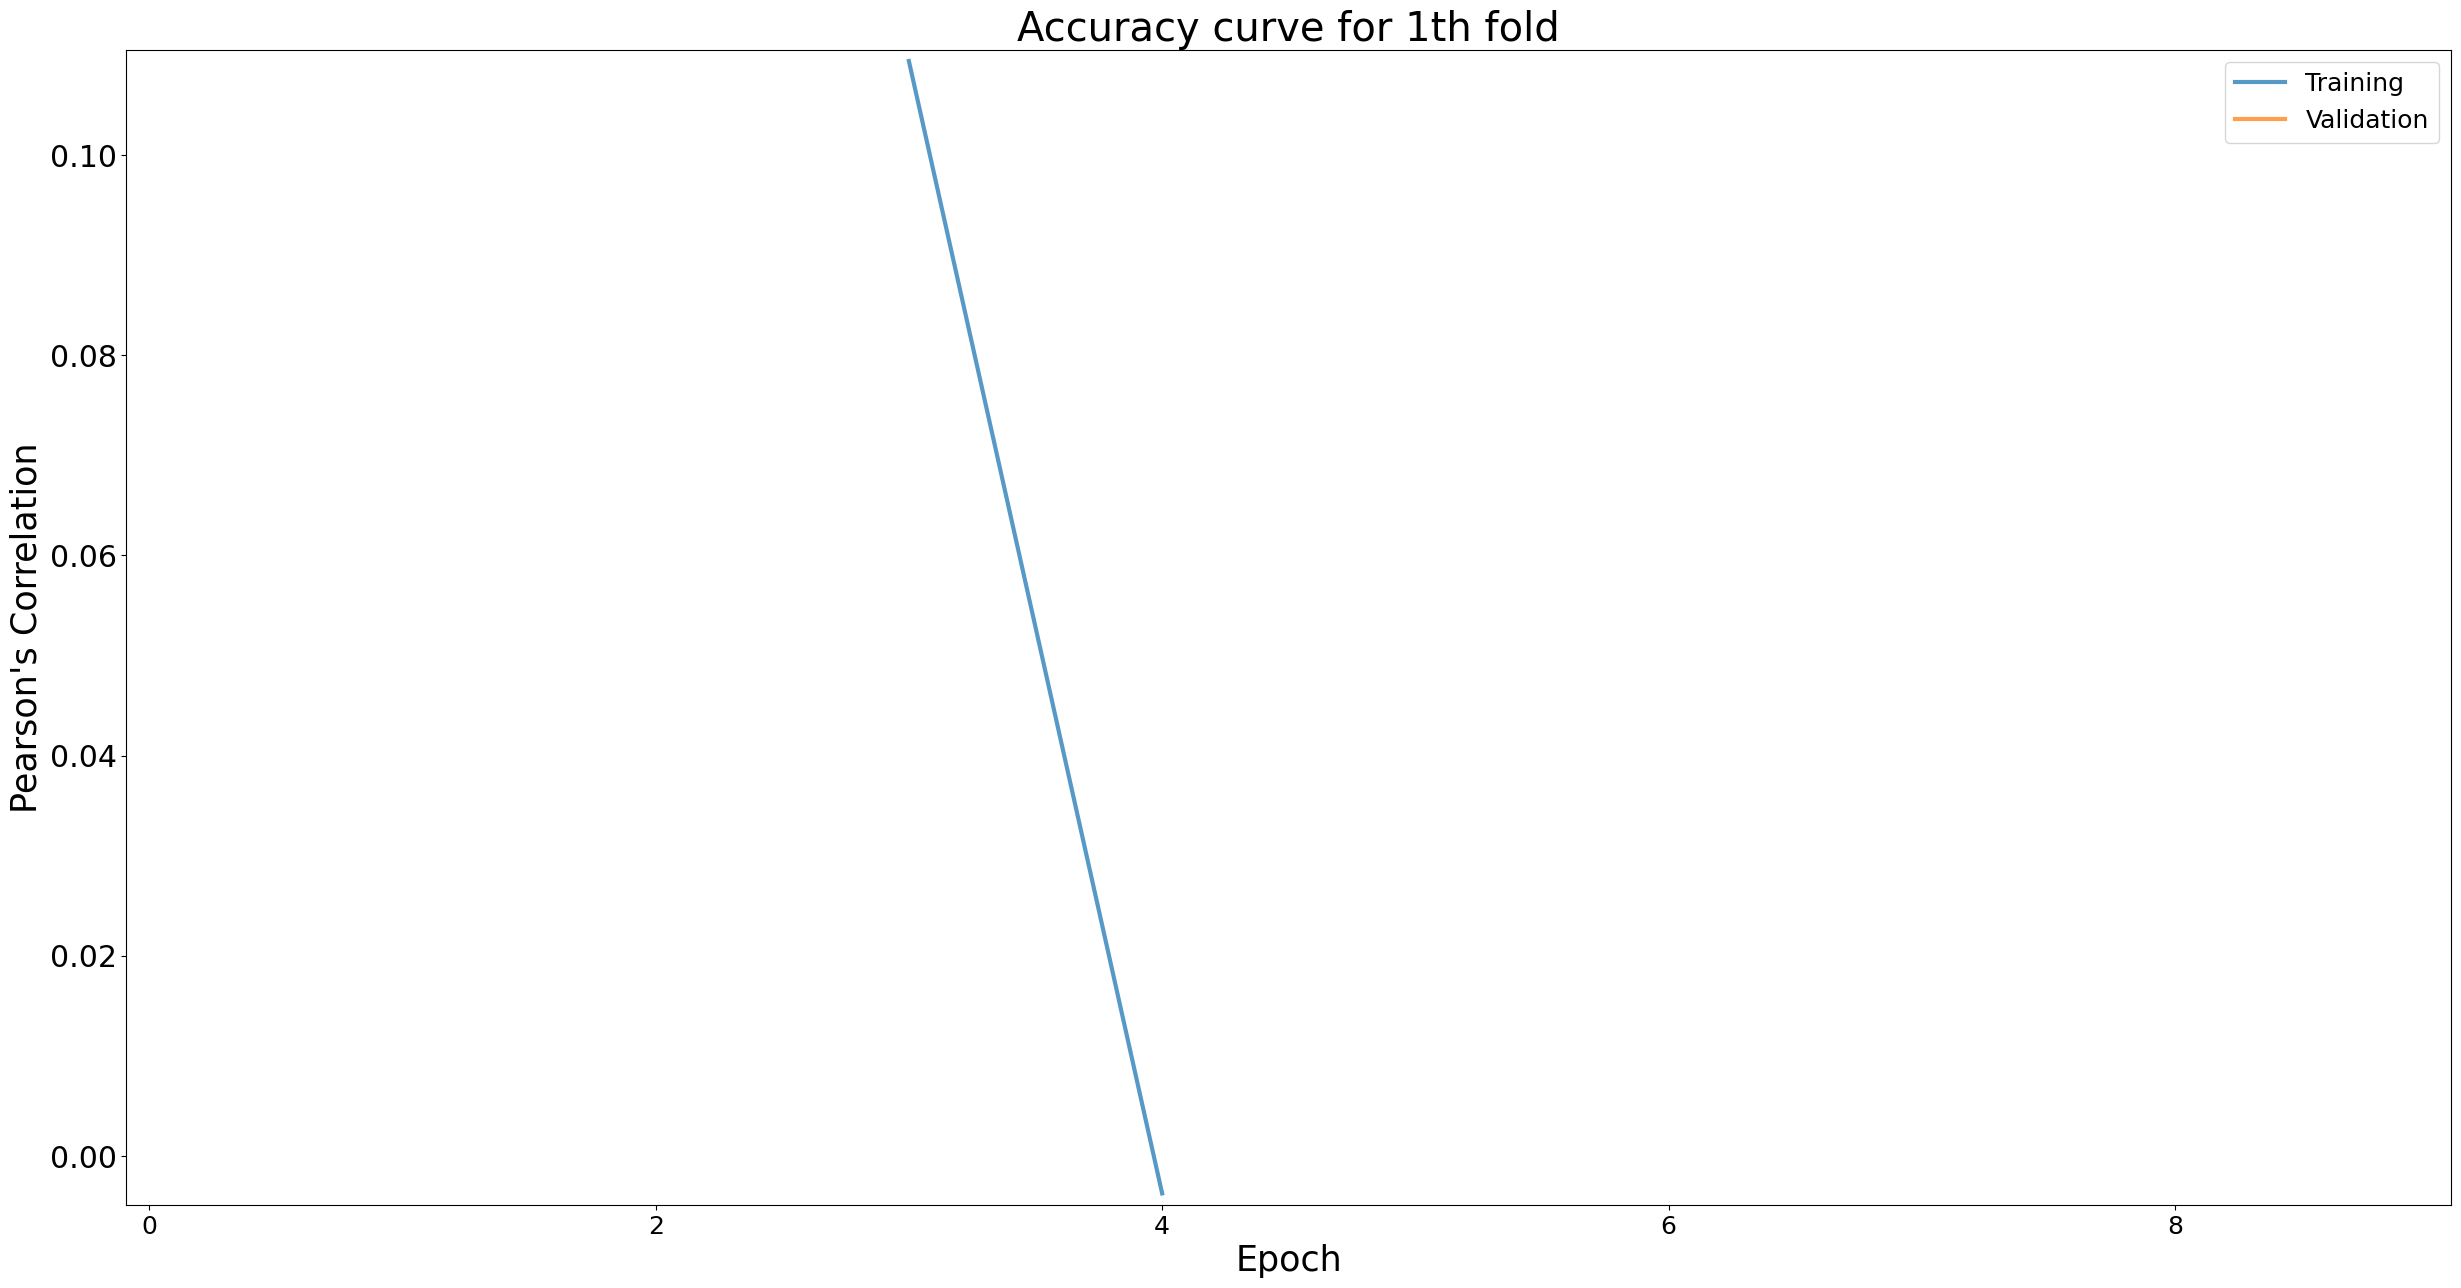

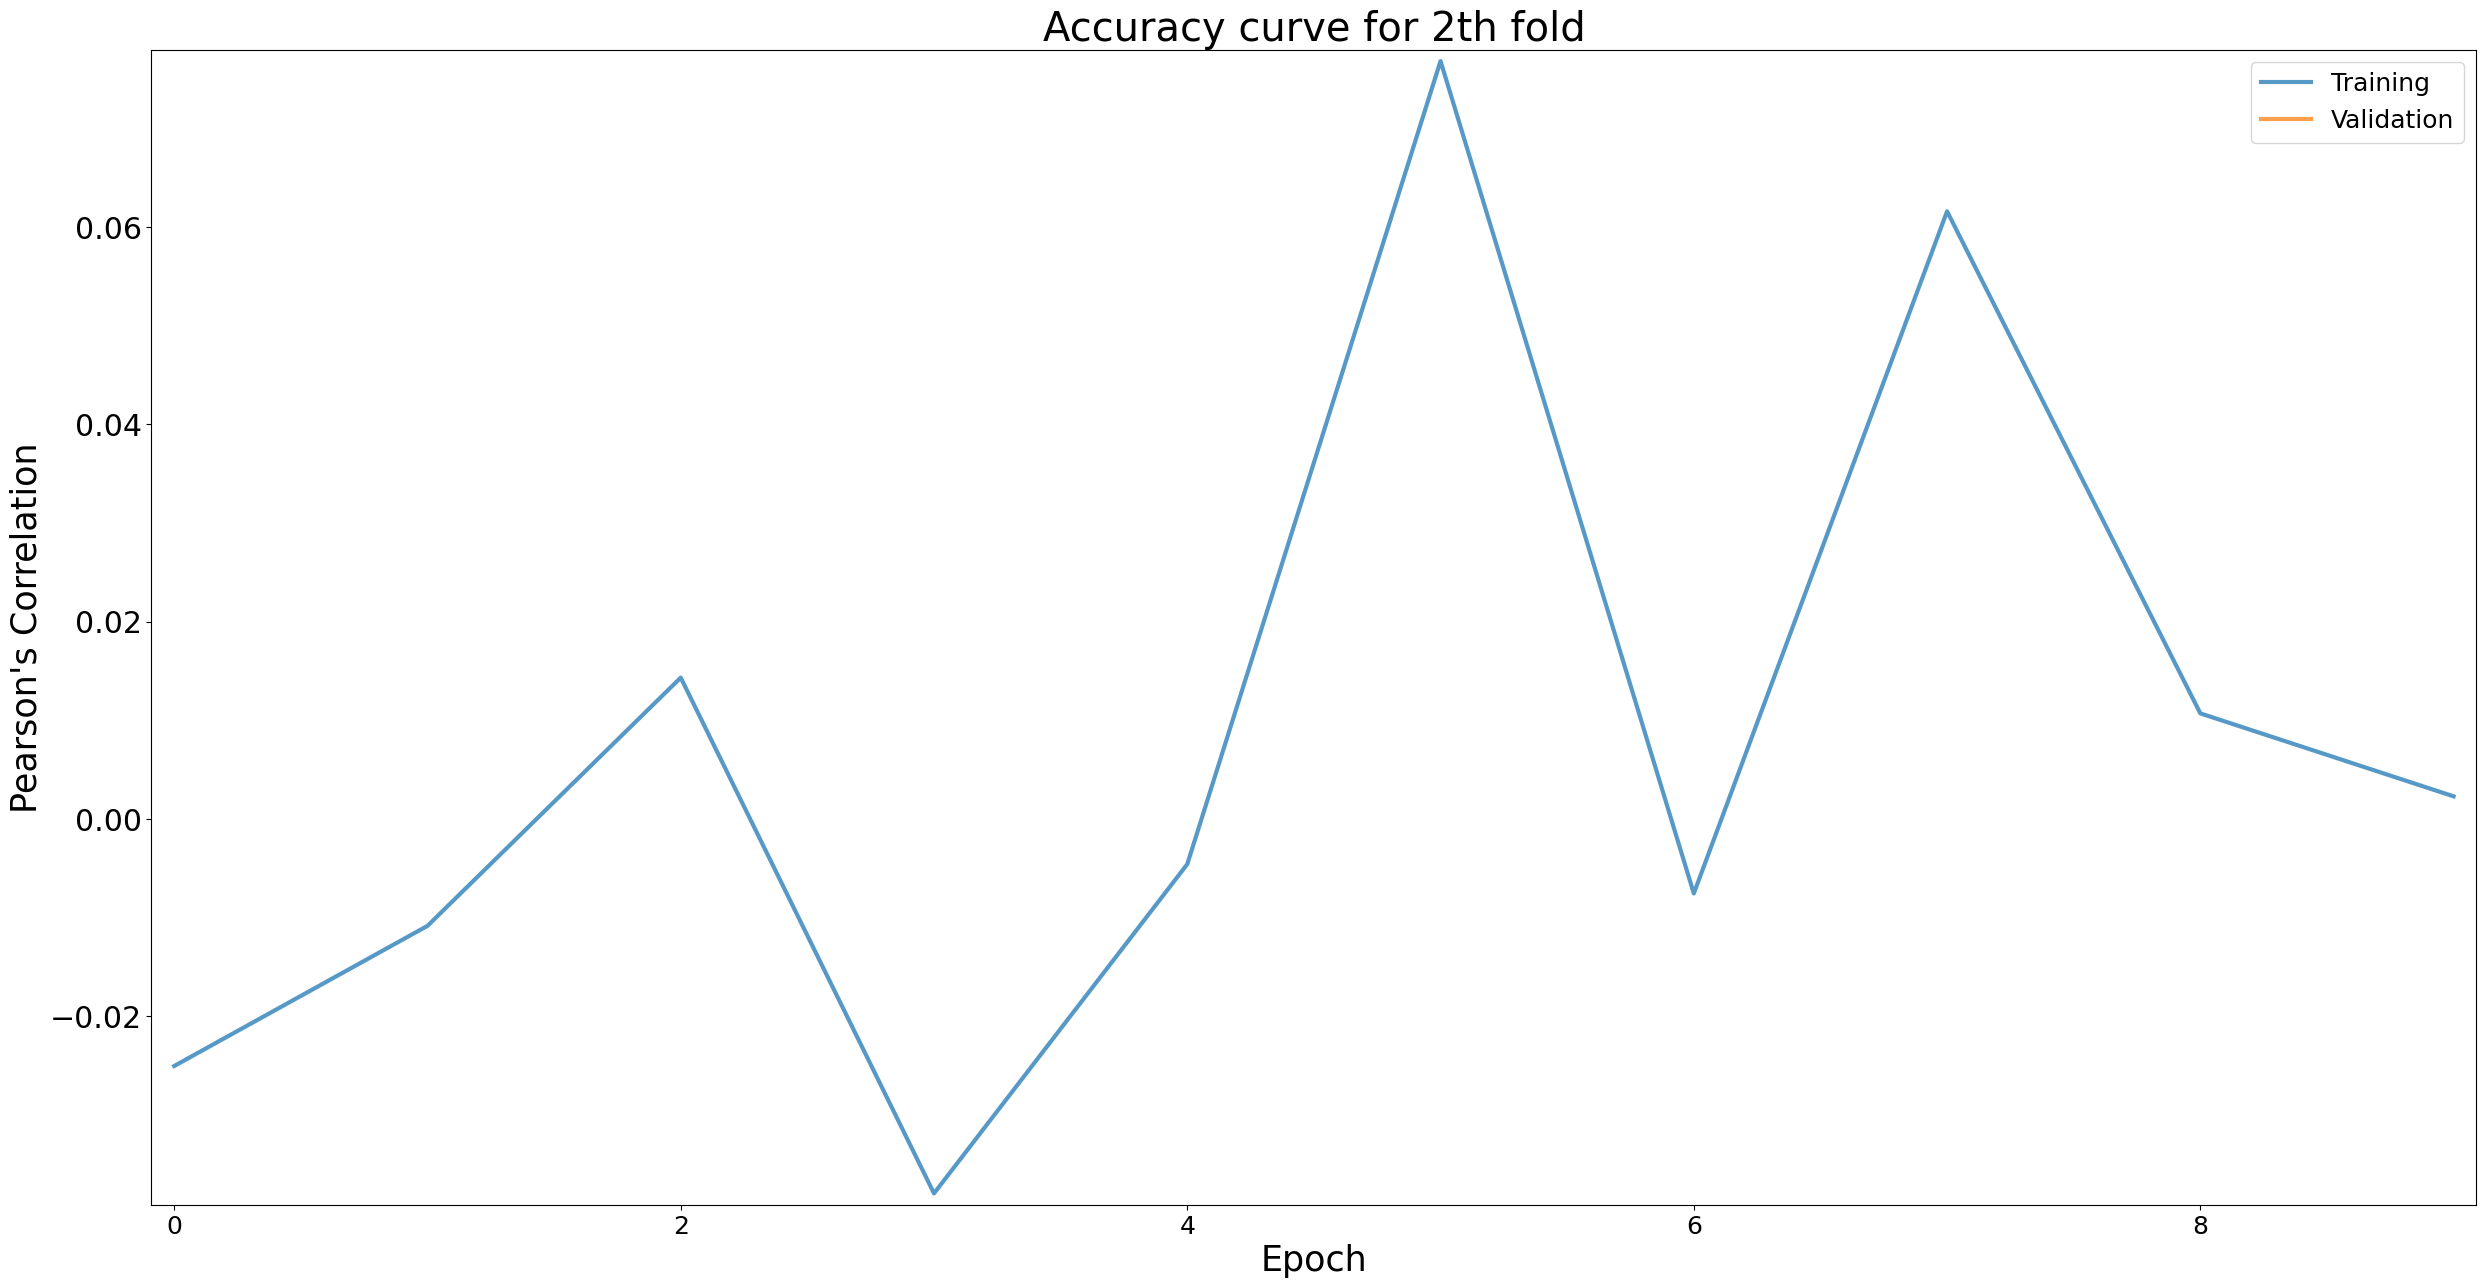

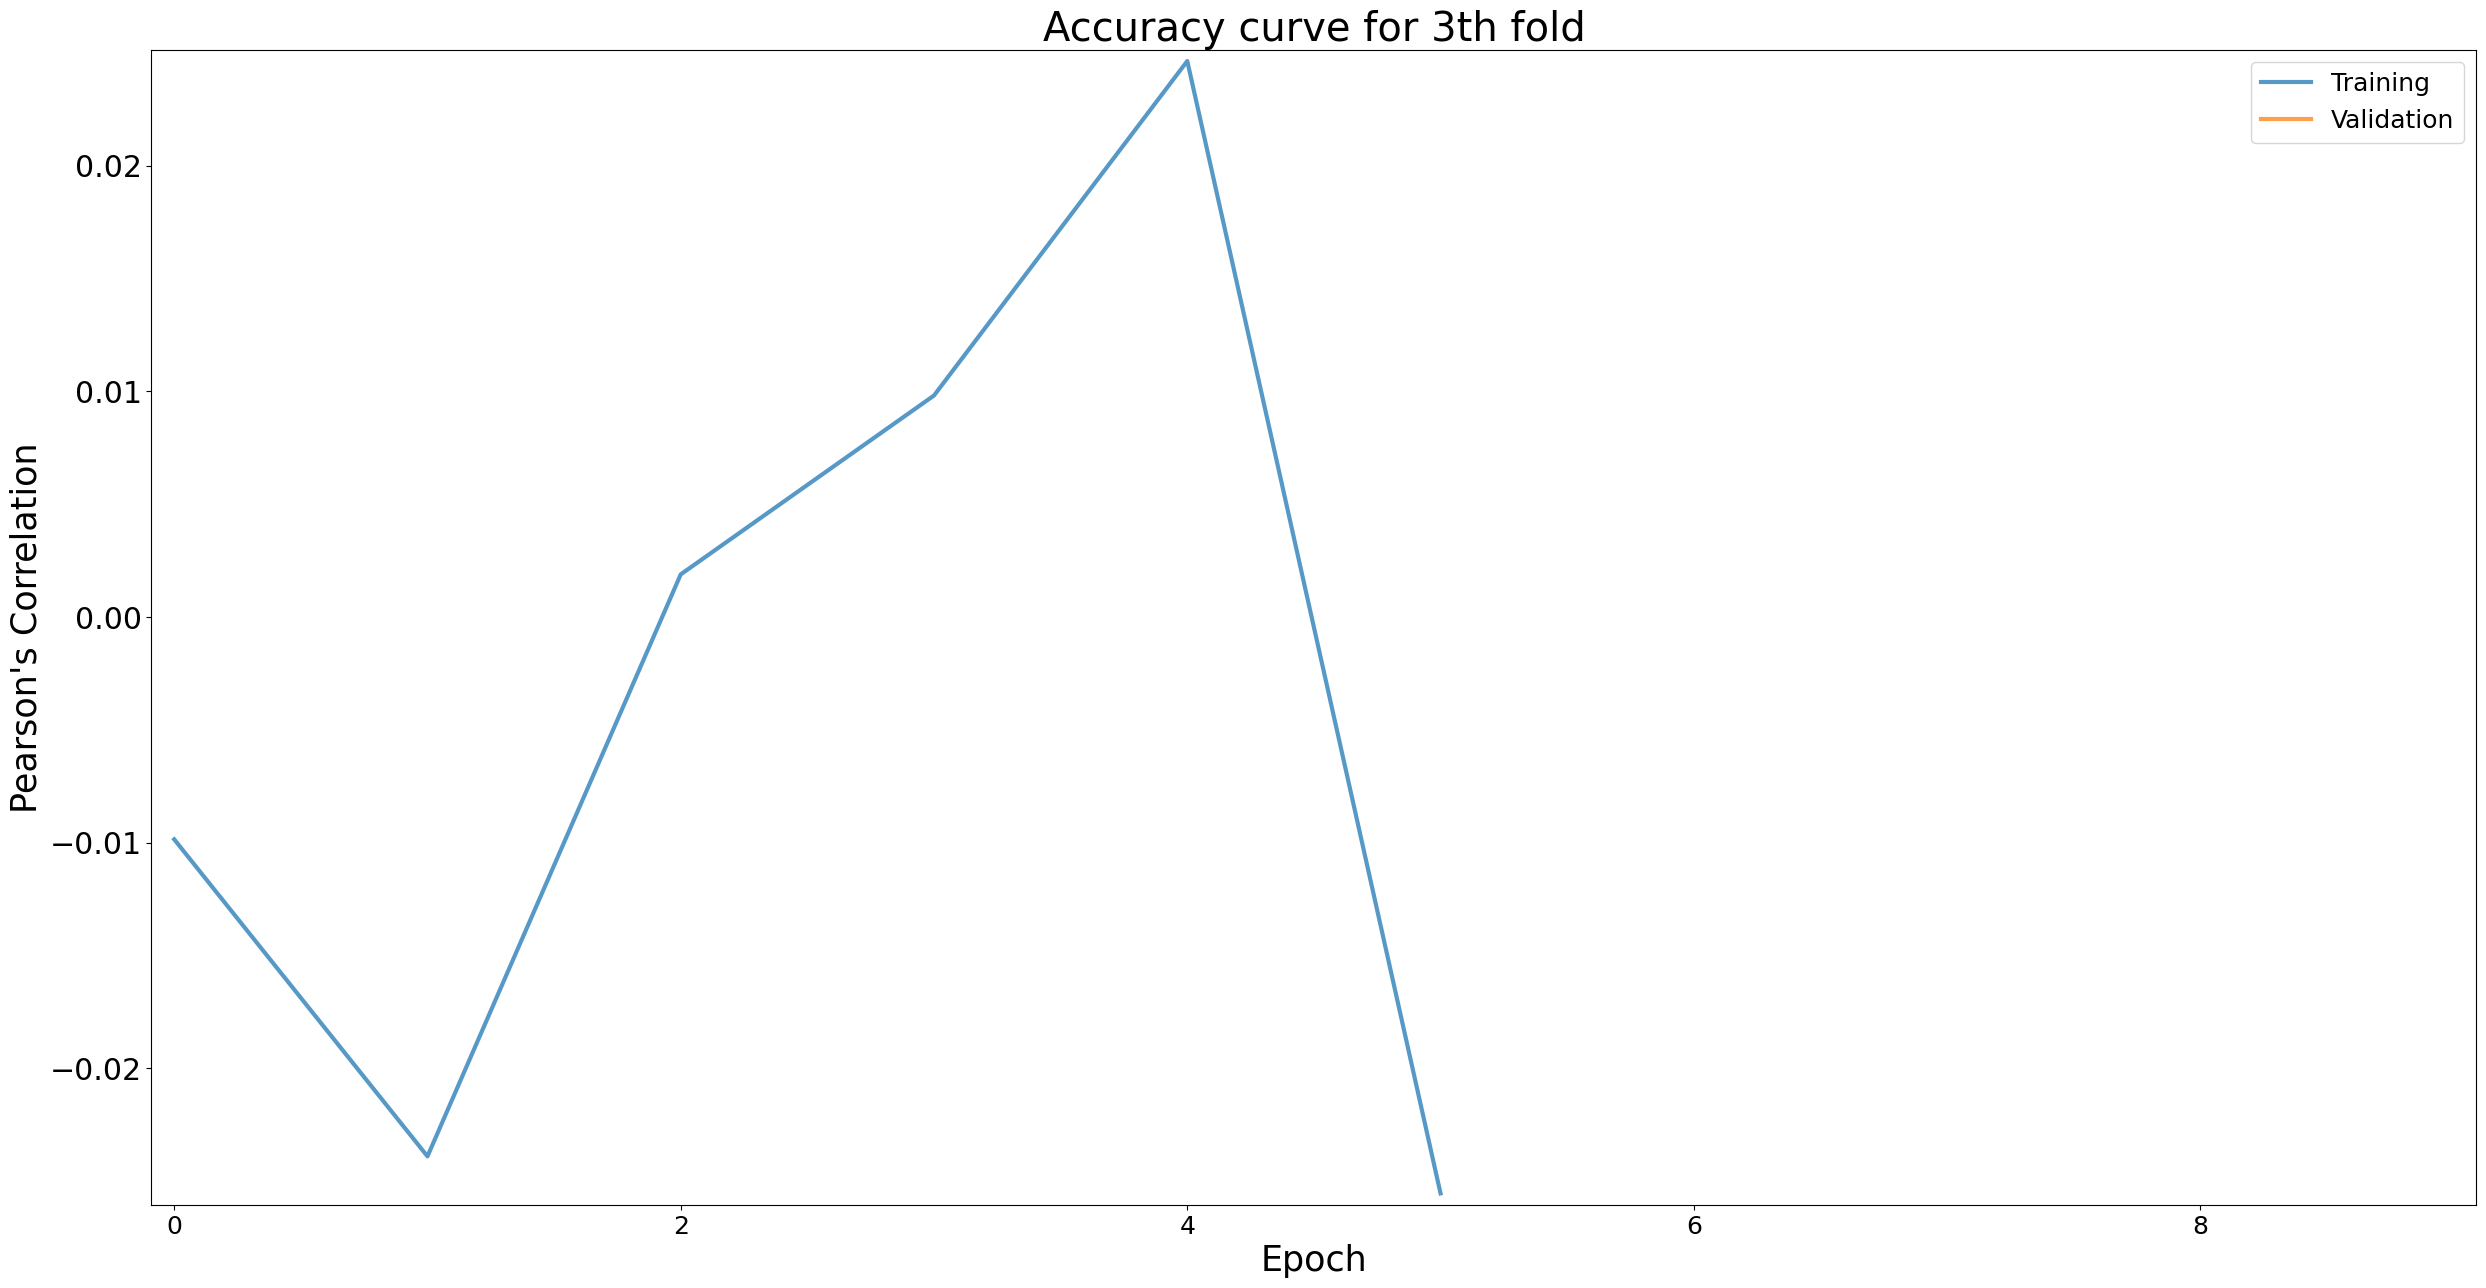

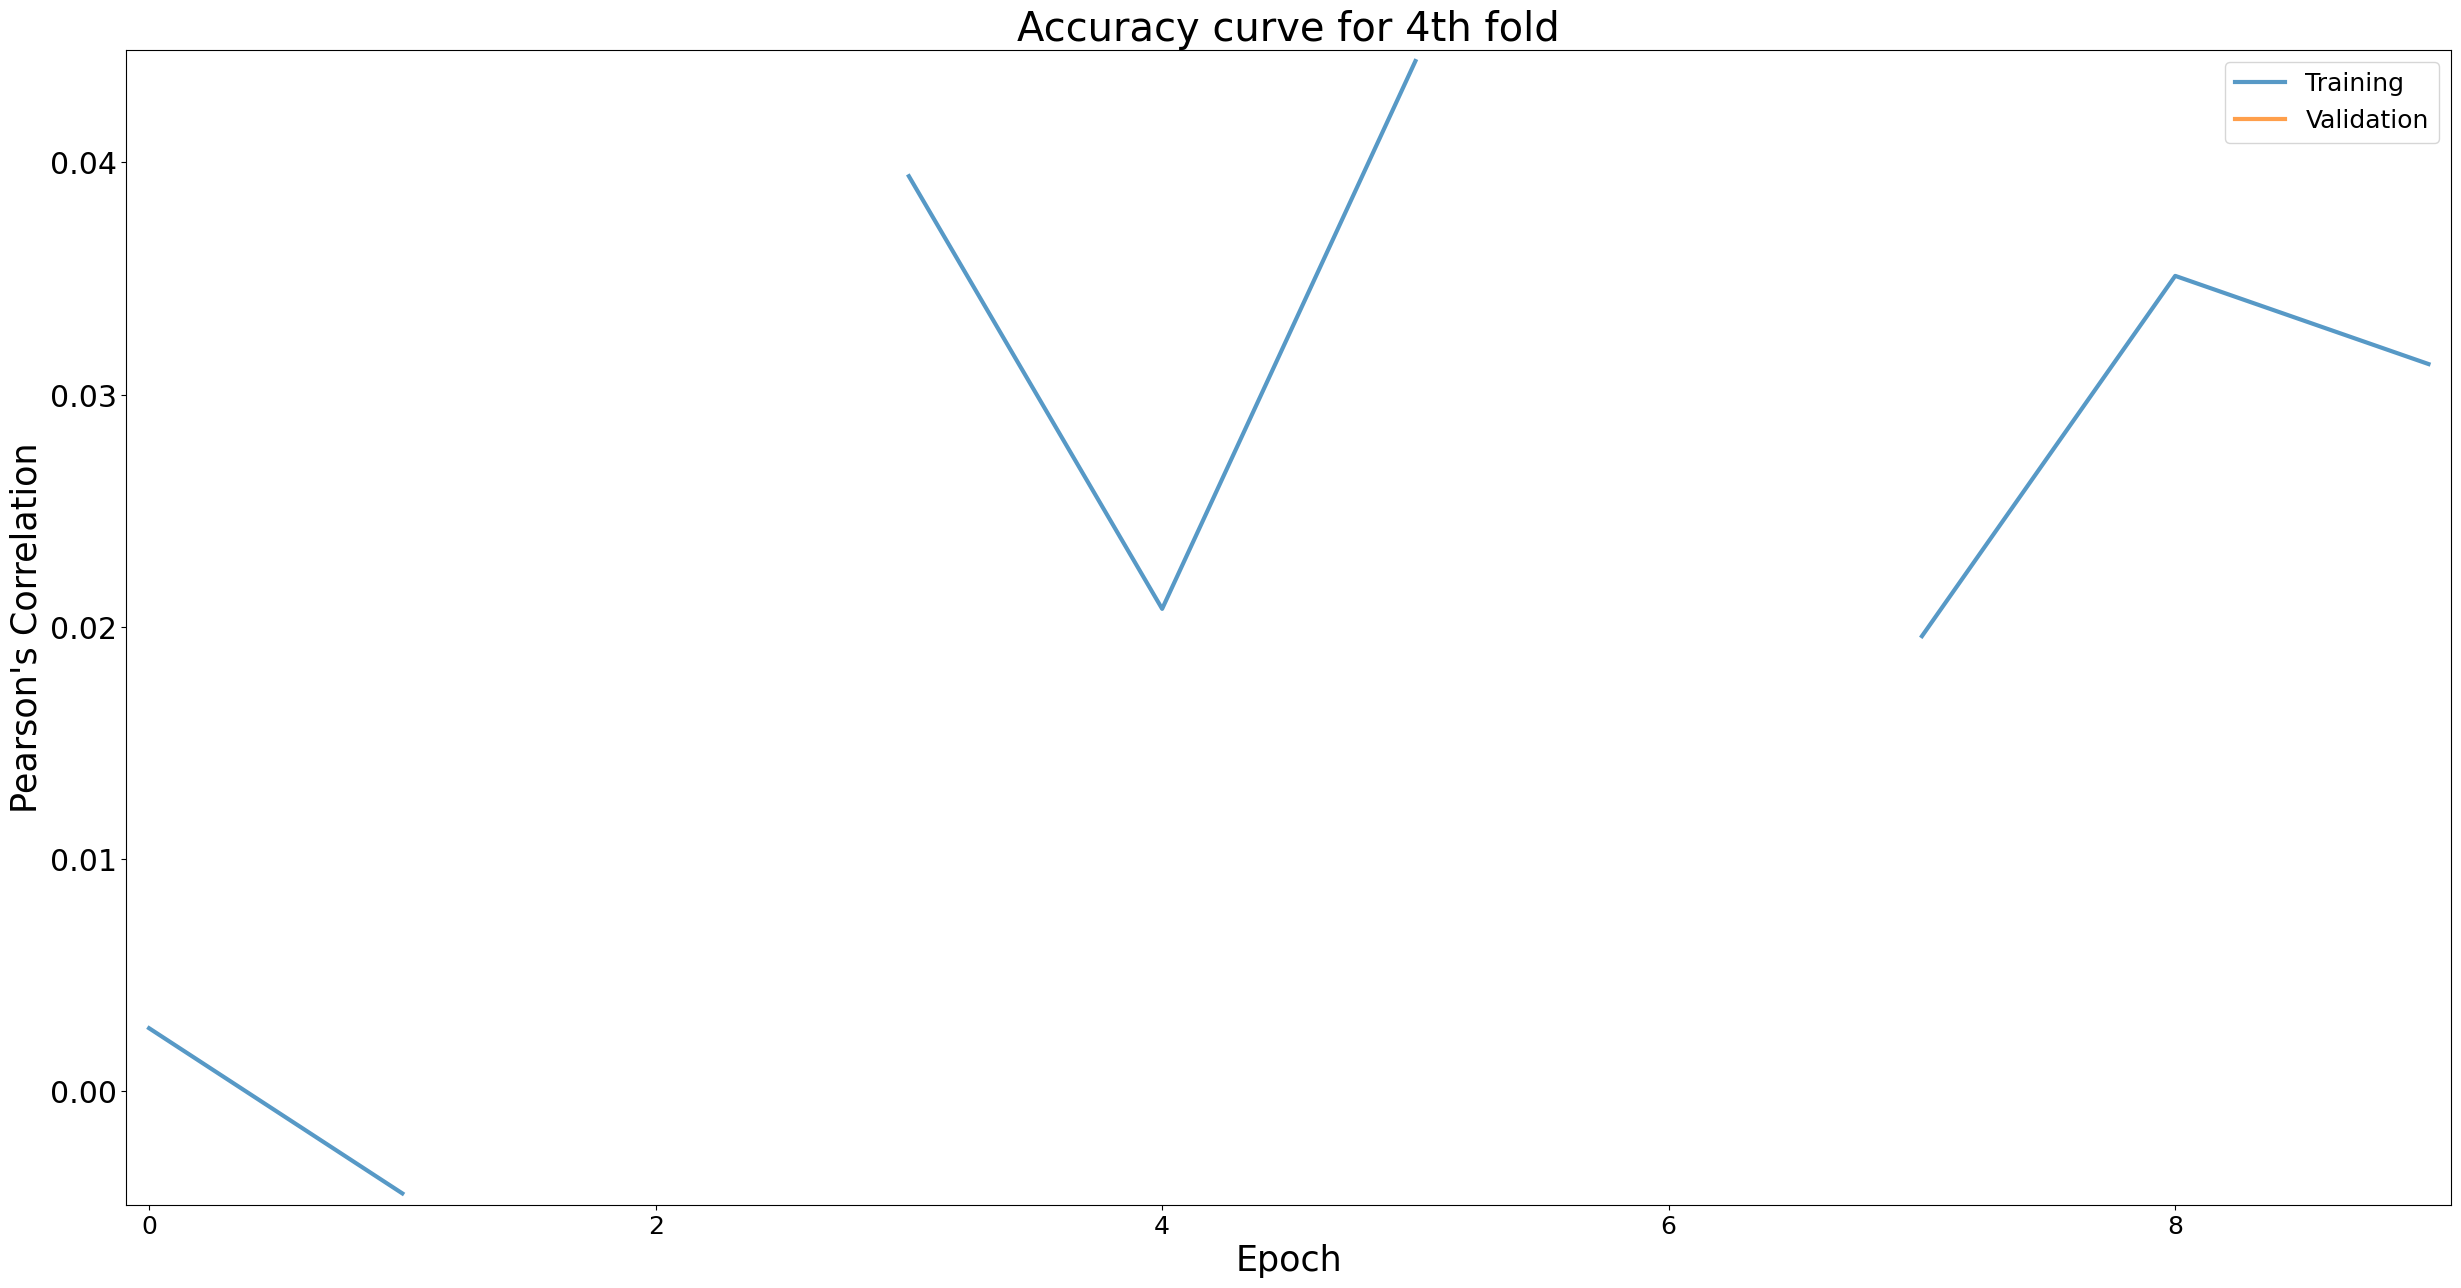

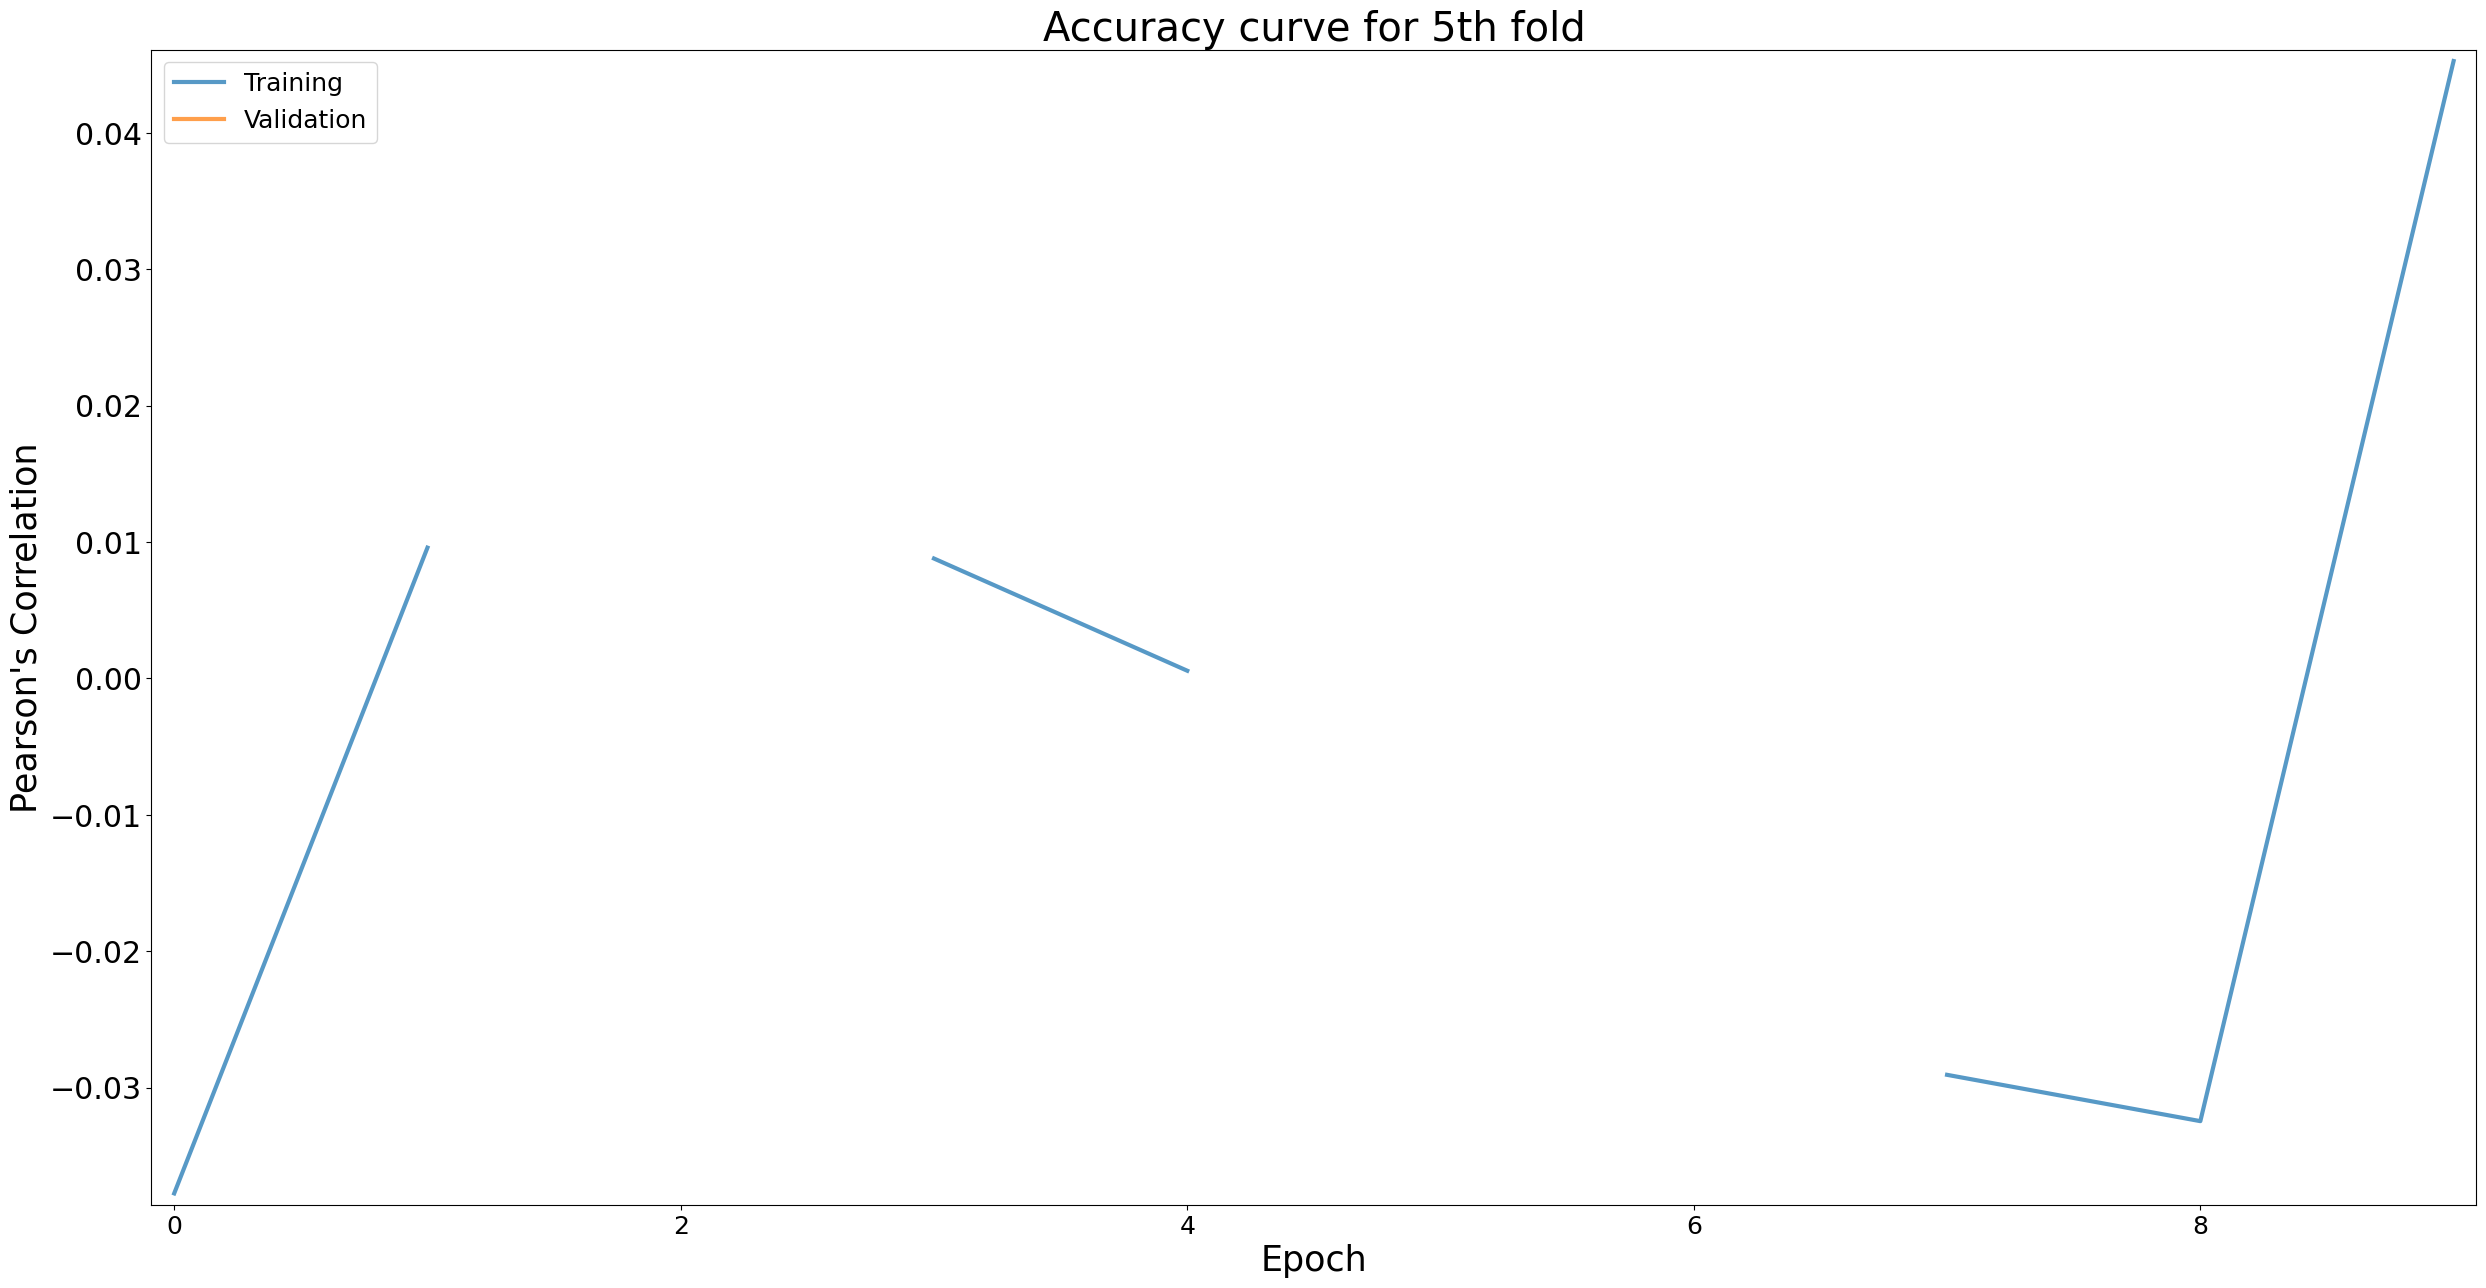

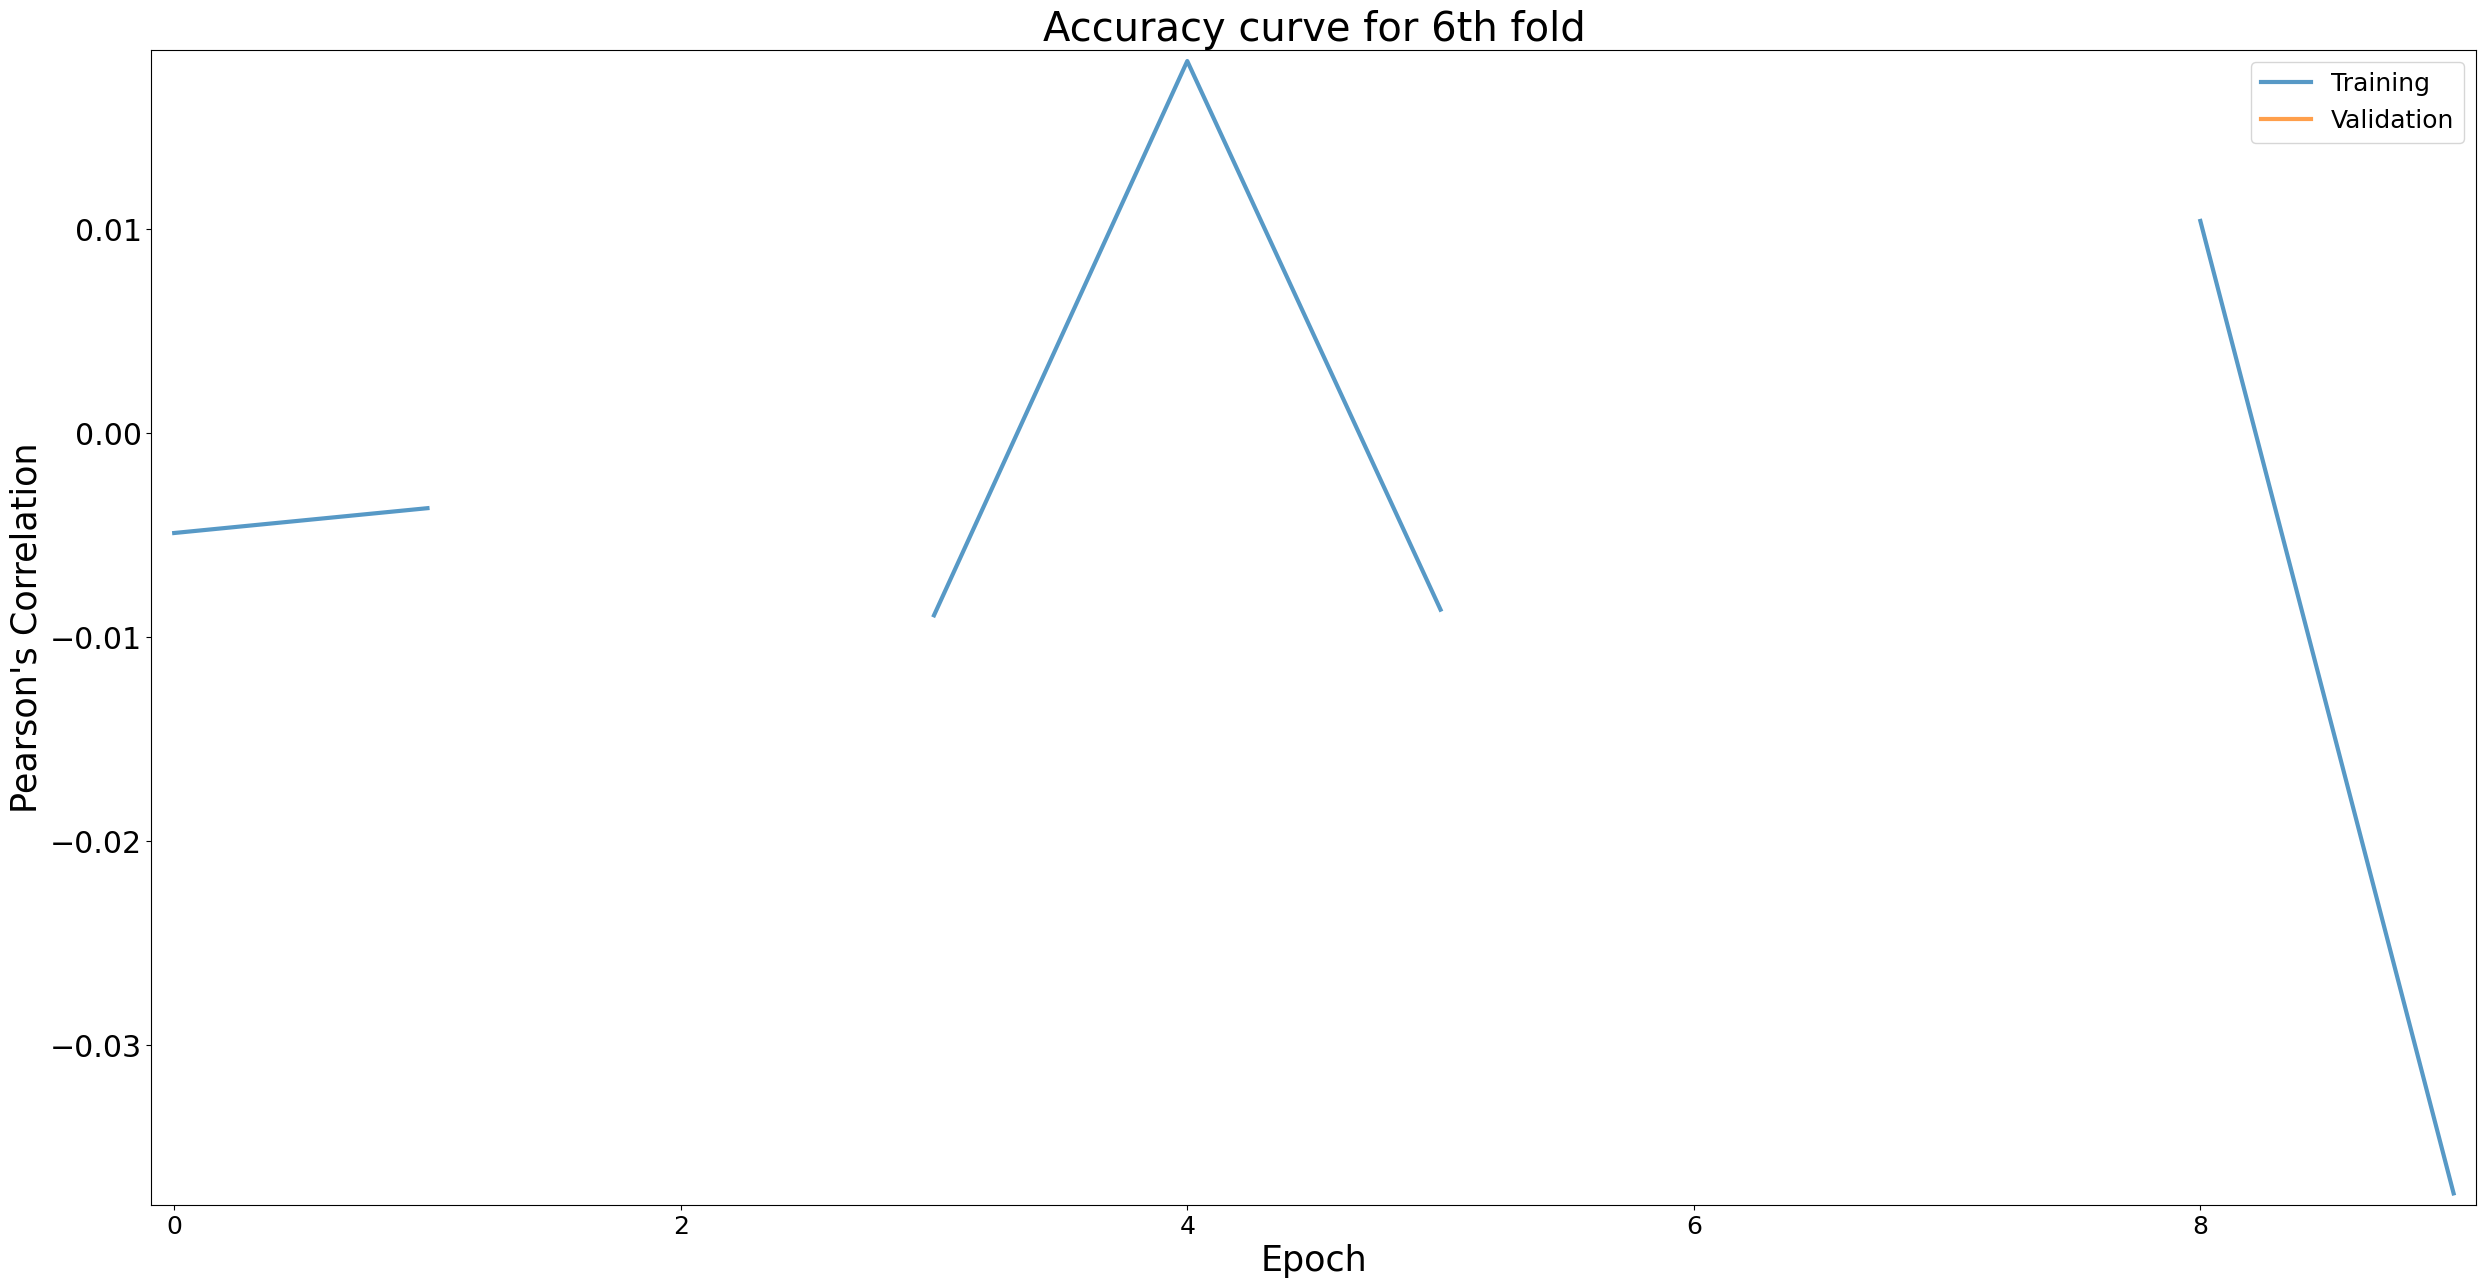

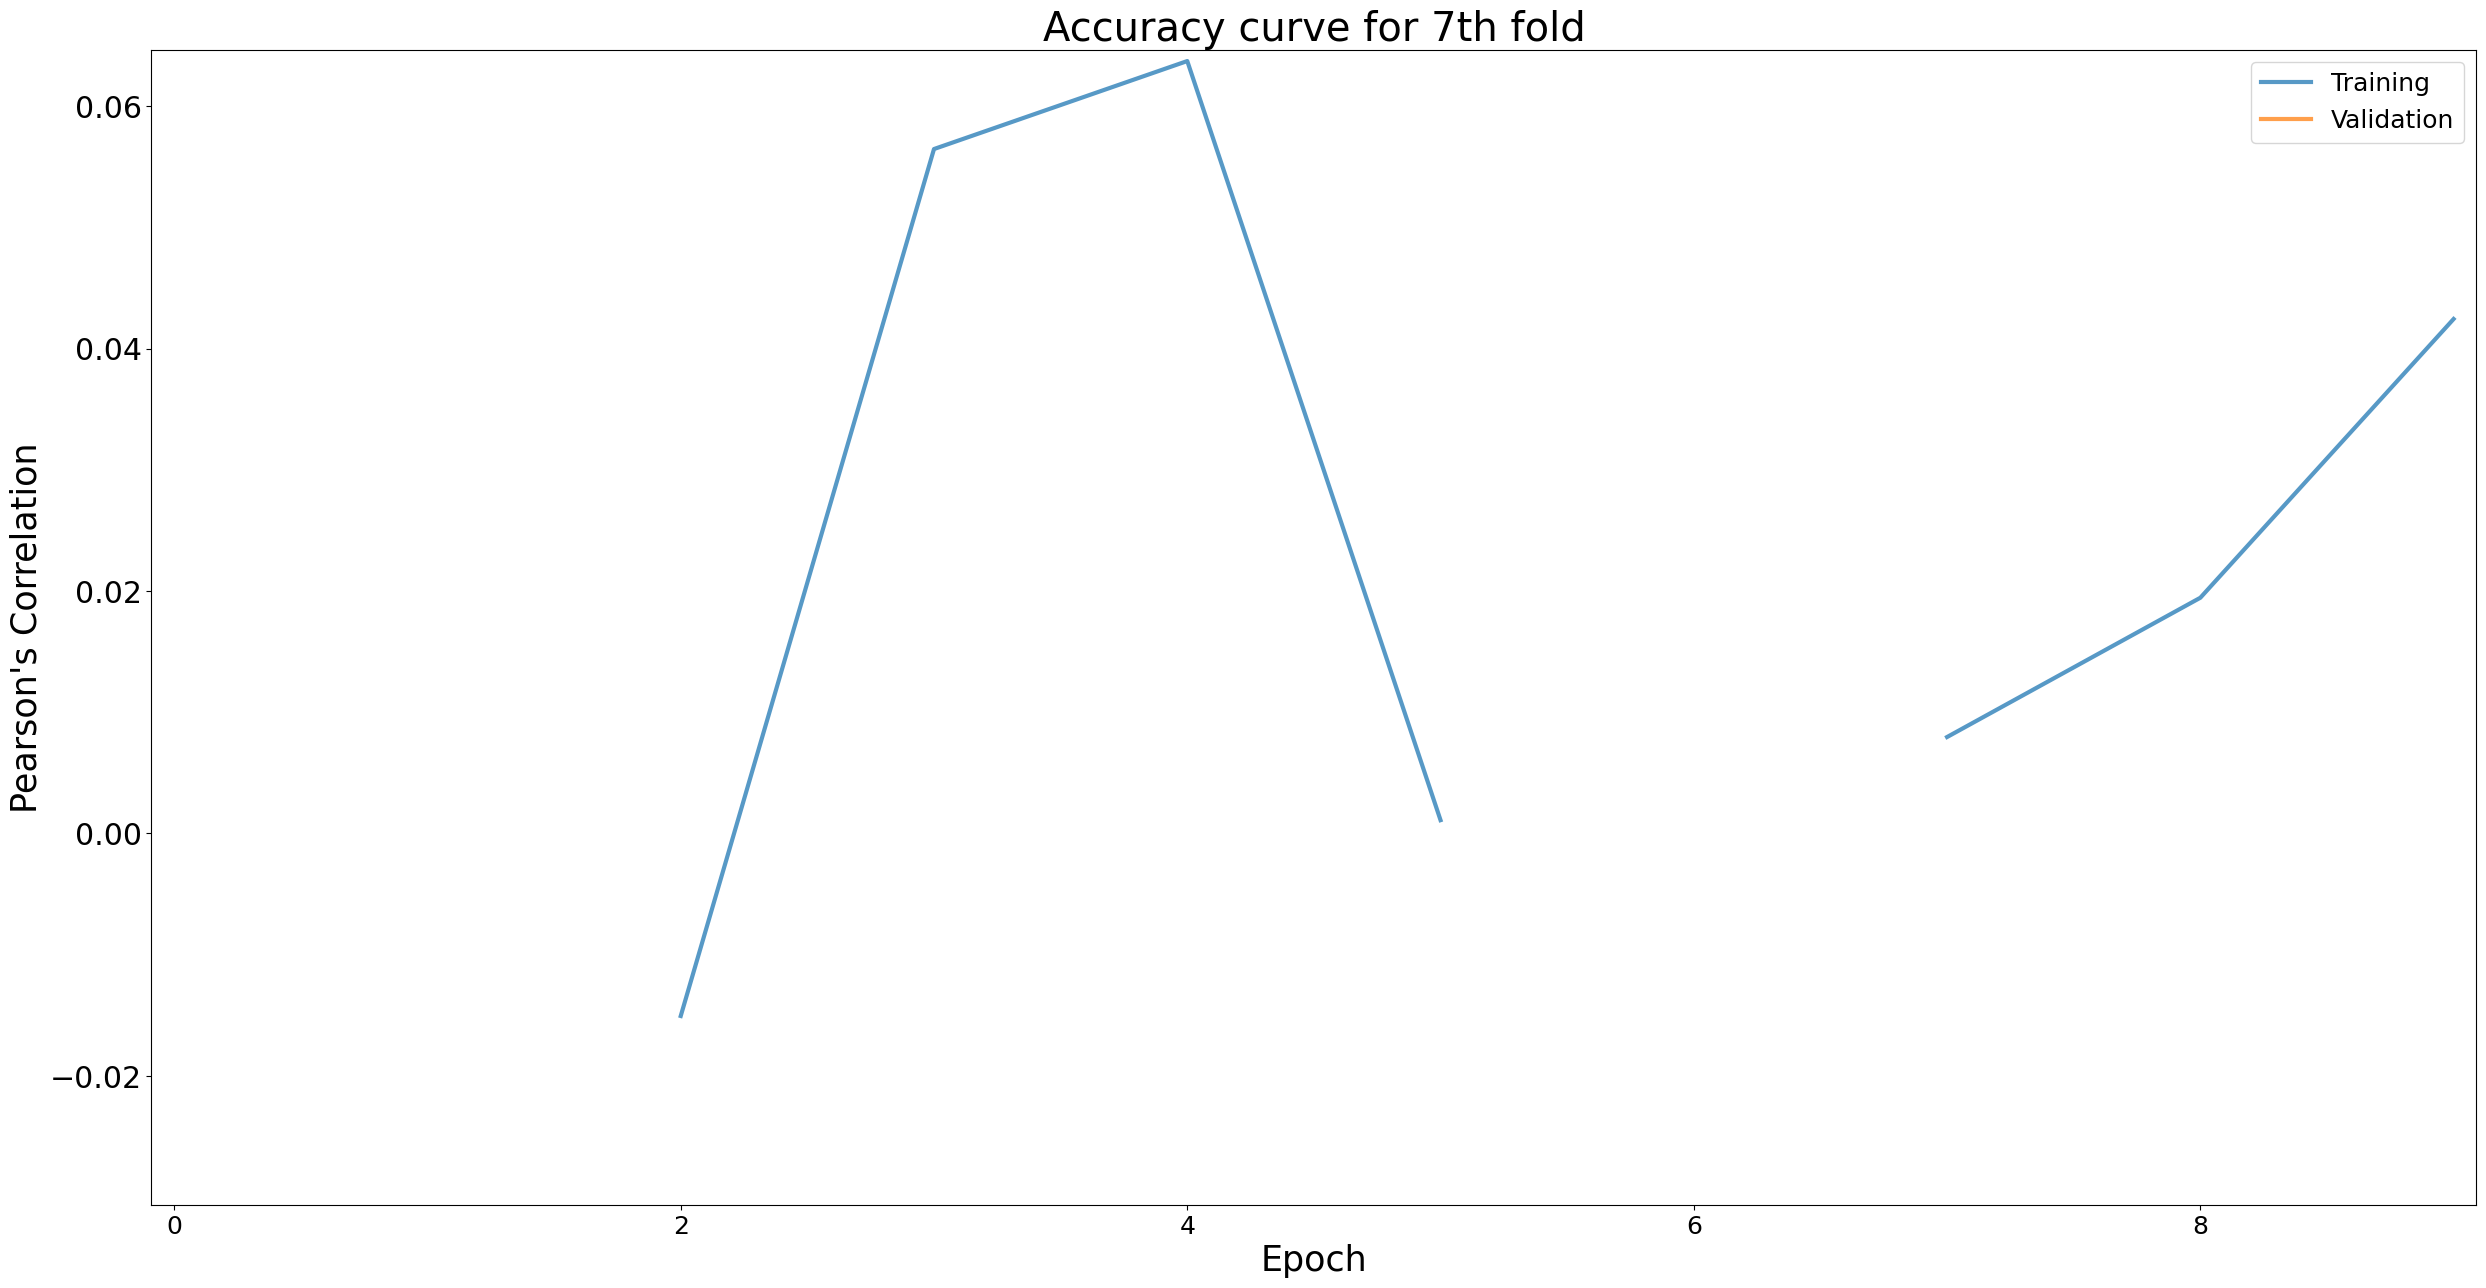

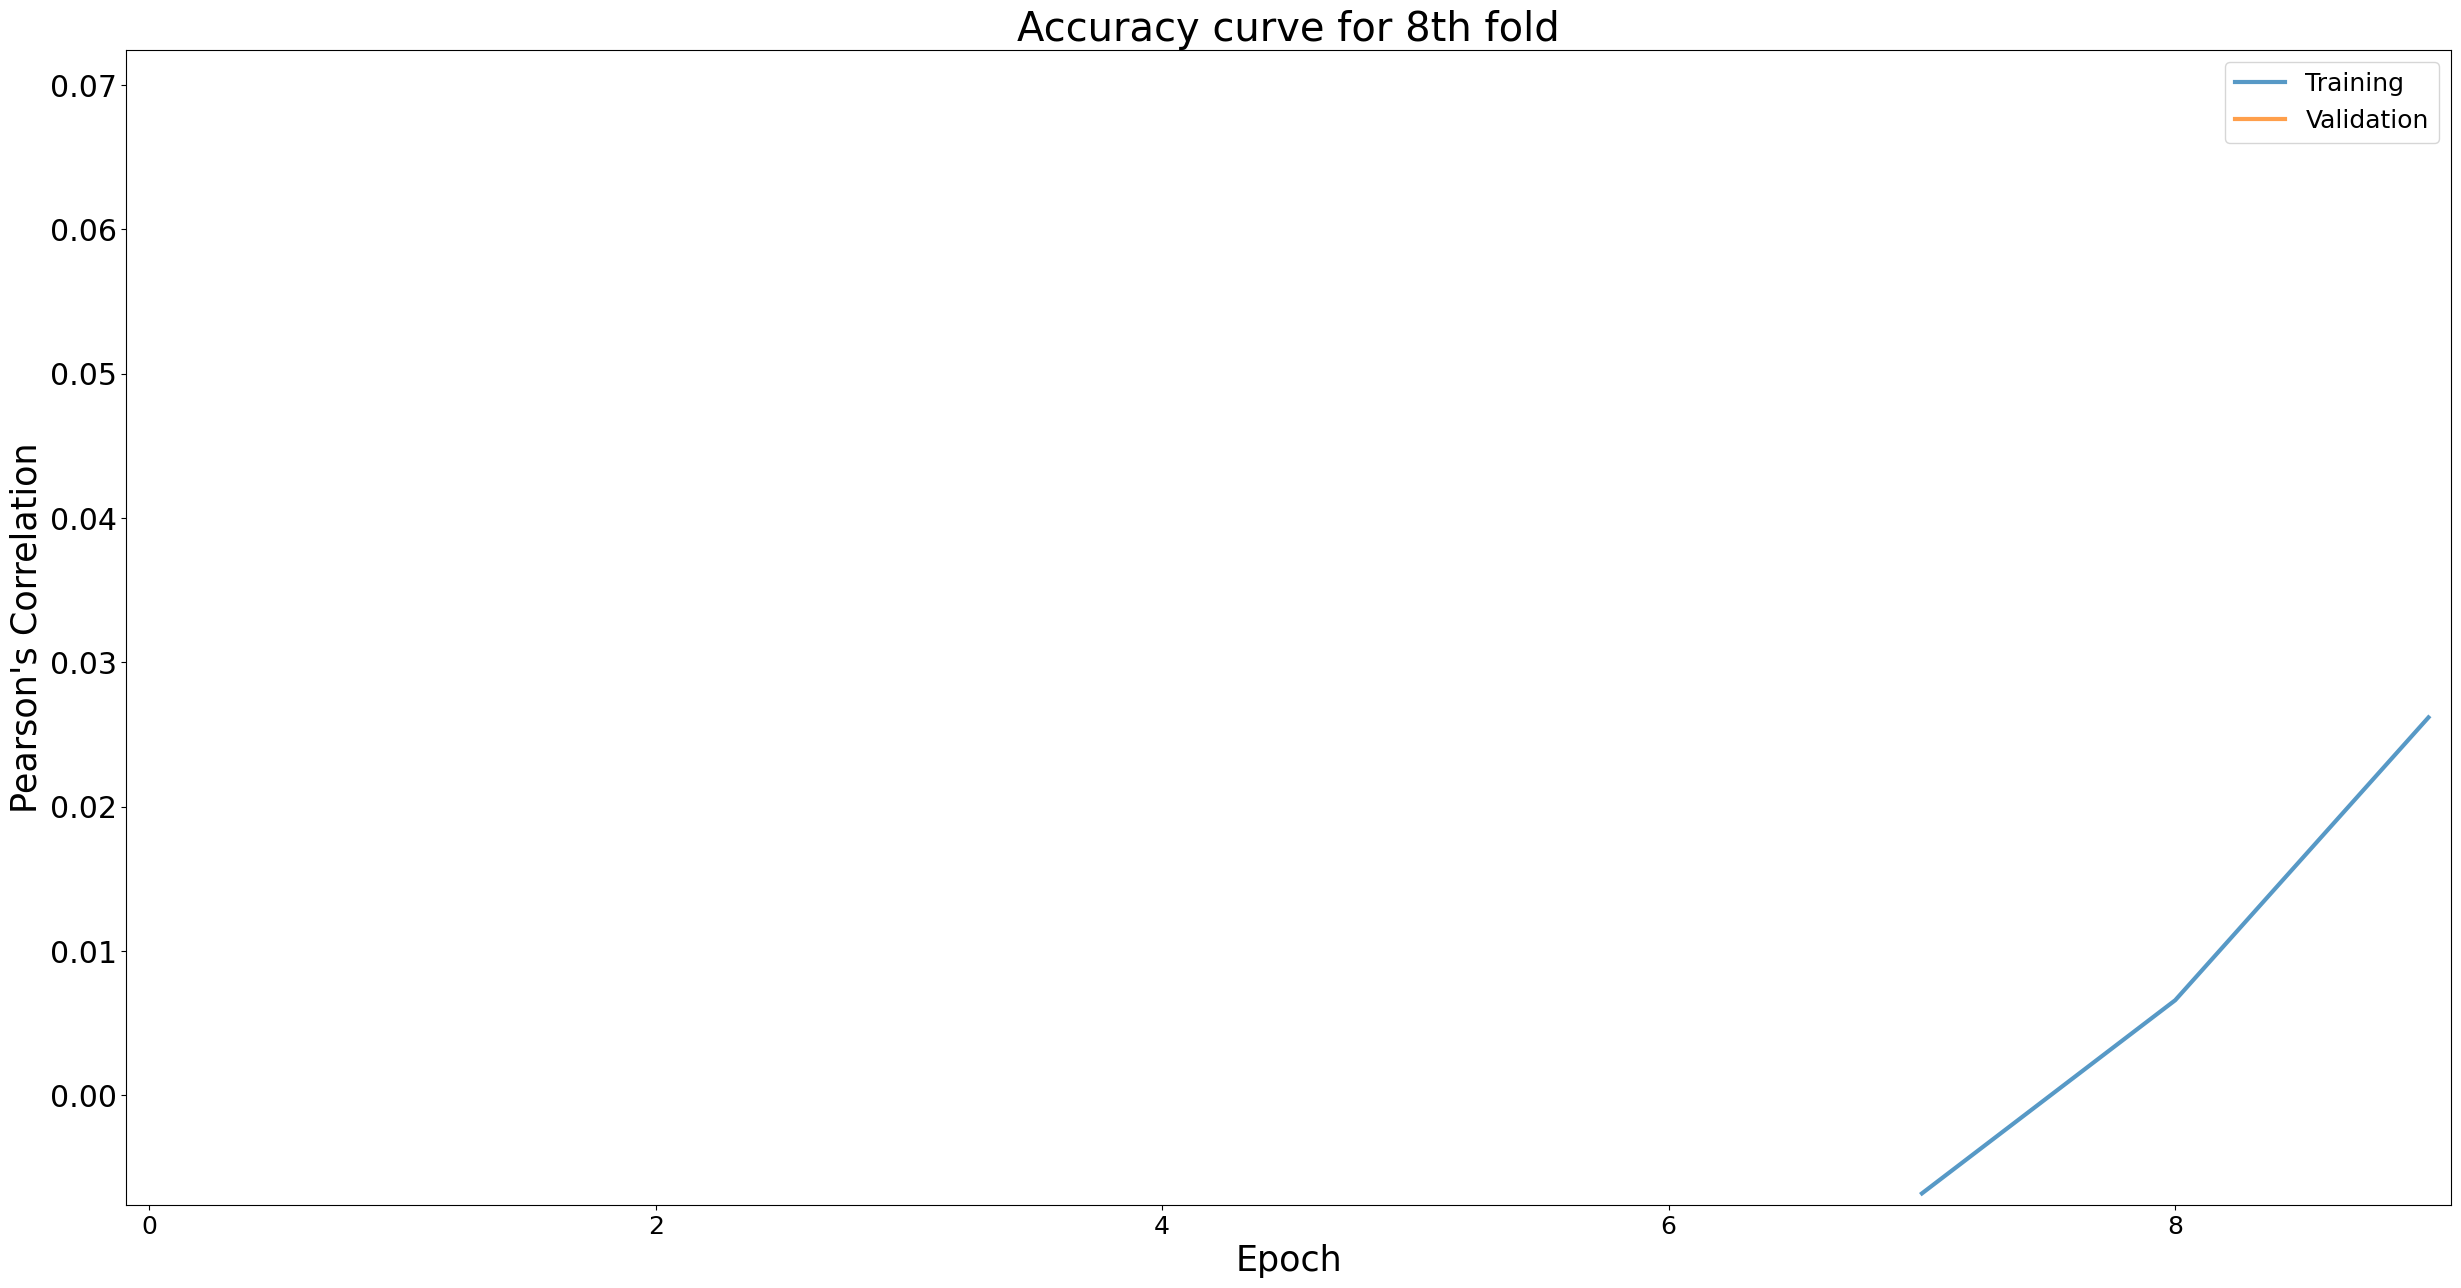

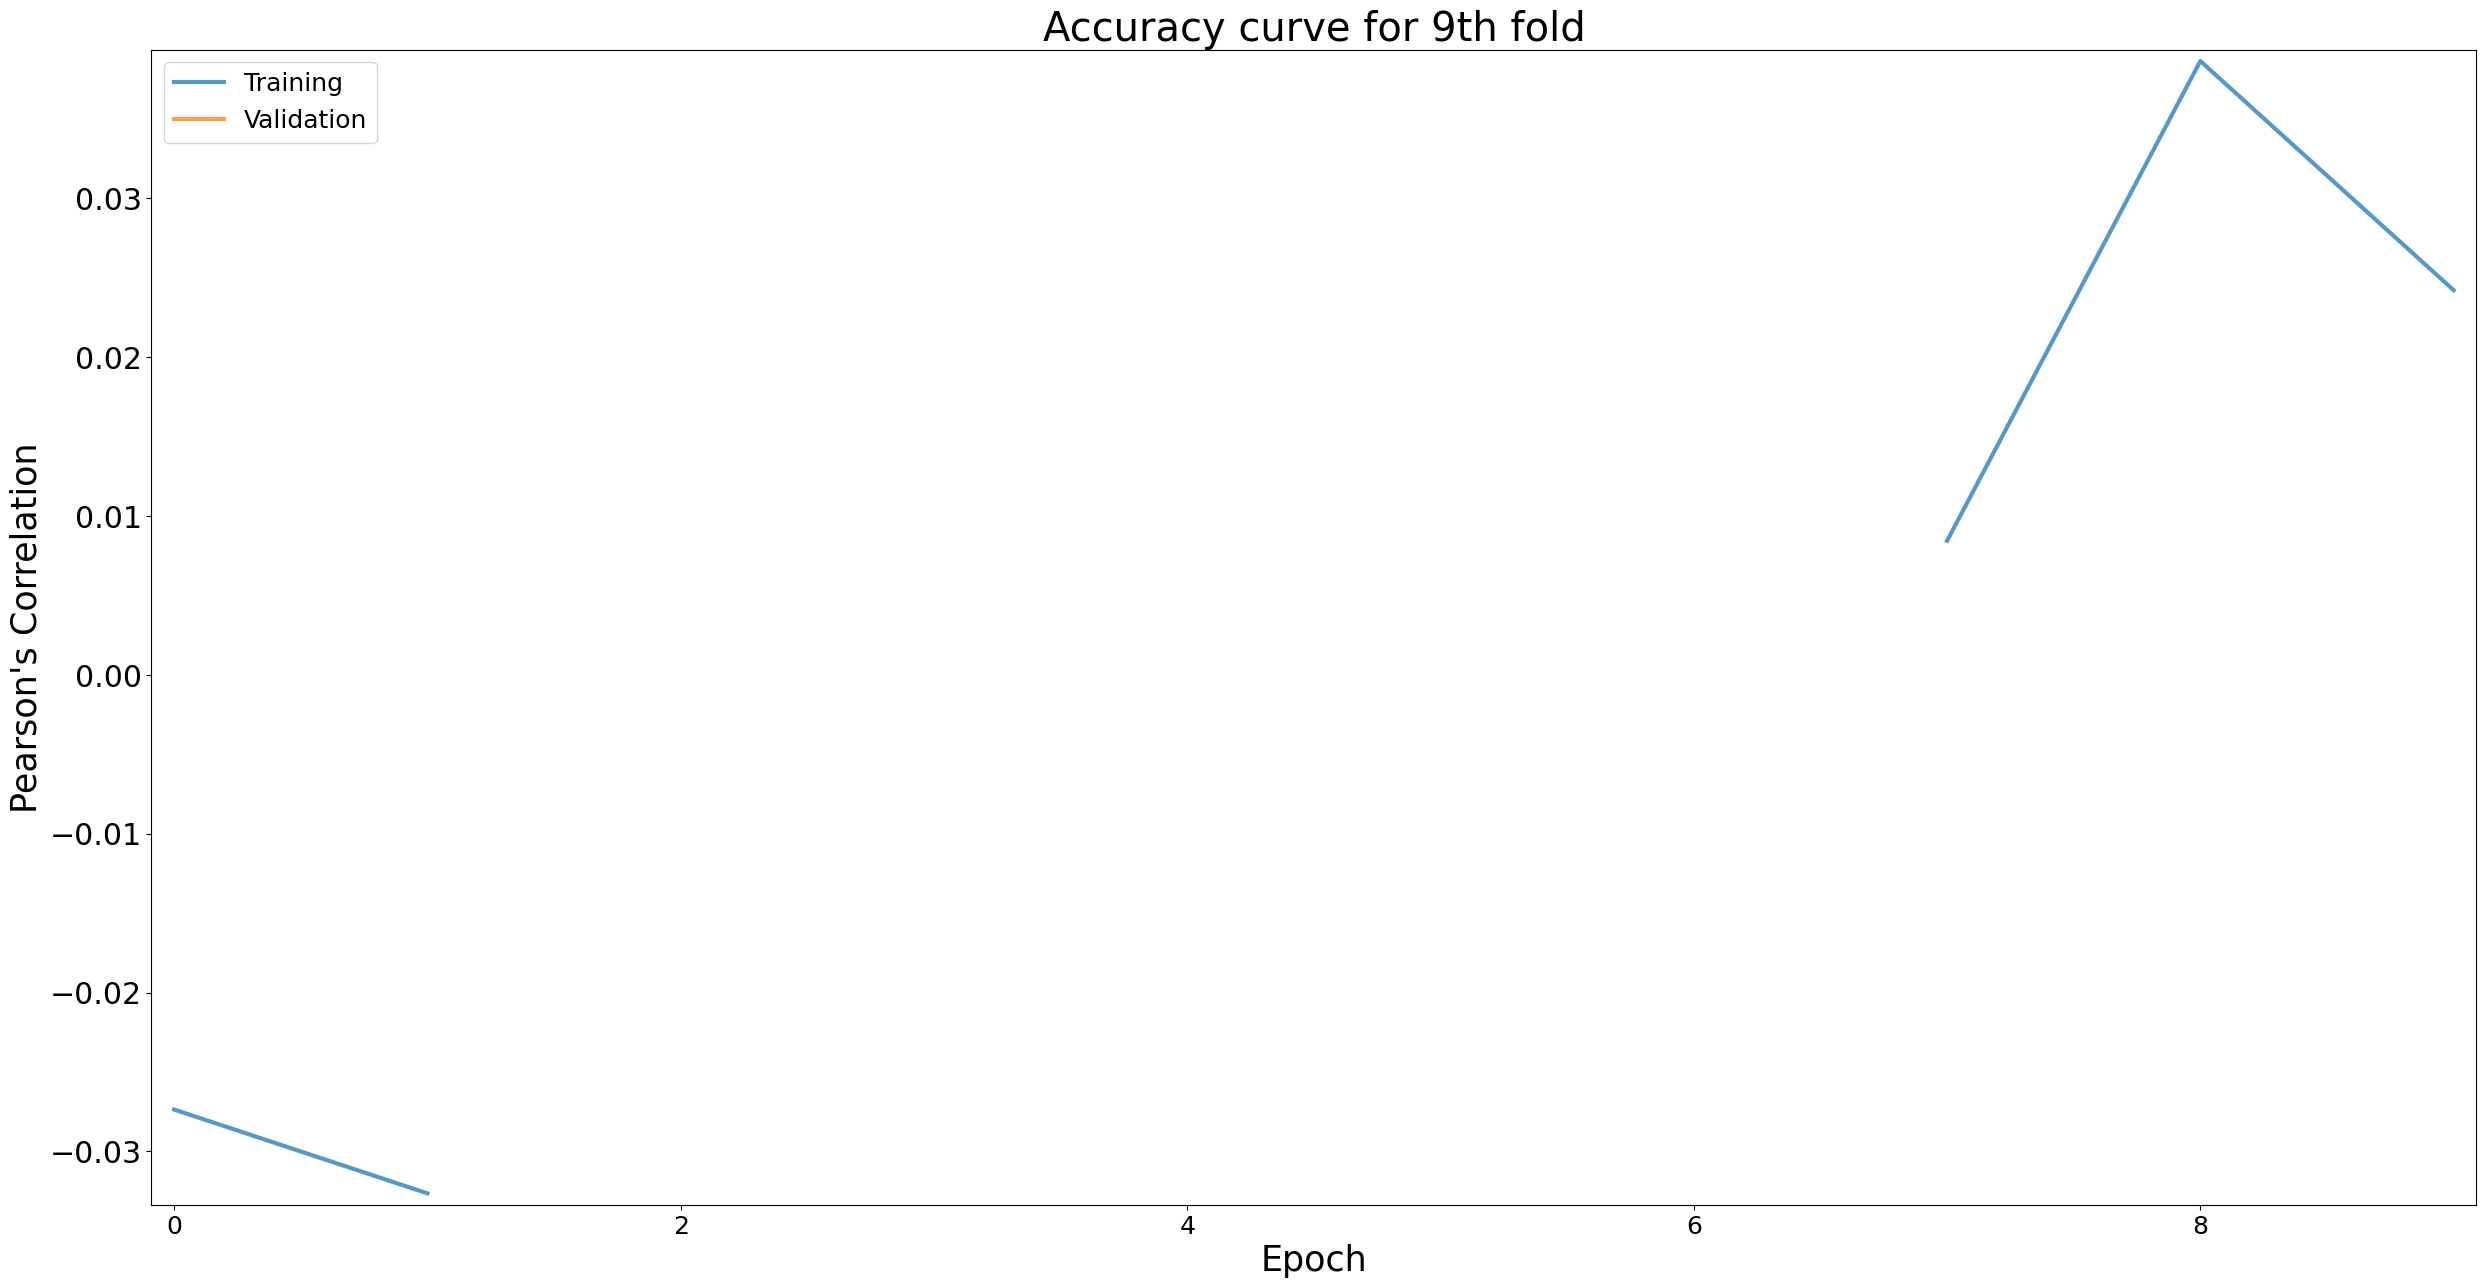

In [54]:
#iterate through all the folds and plot the acc (corr) curves
for i in range(noOfFolds):

    #create a figure
    plt.figure(figsize=(30,15),
               dpi=100)
    #plot the training loss for the current fold
    plt.plot(modelTrainingHistories[i].history['pearson_correlation'],
             label="Training",
             lw=3,
             alpha=0.75)
    ##plot the validation loss for the current fold
    plt.plot(modelTrainingHistories[i].history['val_pearson_correlation'],
             label="Validation",
             lw=3,
             alpha=0.75)
    #annotate the figure
    plt.title('Accuracy curve for '+str(i)+'th fold',
              fontsize=baseFontSize*1.6)
    plt.ylabel('Pearson\'s Correlation',
              fontsize=baseFontSize*1.4)
    plt.xlabel('Epoch',
              fontsize=baseFontSize*1.4)
    plt.xticks(fontsize=baseFontSize*1)
    plt.yticks(fontsize=baseFontSize*1.2)
    plt.margins(0.01)
    plt.legend(loc='best',fontsize=baseFontSize)